# Predicting heart disease using Machine Learning

***This notebook looks into using various Python-based machine learning data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.***

We're going to take the following appoach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

***In statement,
   Given clinical parameter about the patient, can we predict whether or not they have heart disease?***

## 2. Data

The original data came from the Cleaveland data from the UCI Machine Learning Repository:https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on :  https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

***If we can reach 95% accuracy at predciting whether or not a patient has a heart disease during the proof of concep, we'll persue the project.***

## 4. Features

***This is where you'll get different information about each of each of the feature in your data.***

***create a data dictionary***

1. age - age in years
2.  sex - (1 = male; 0 = female)
3.  cp - chest pain type

     *0: Typical angina: chest pain related decrease blood supply to the heart
     
     *1: Atypical angina: chest pain not related to heart
     
     *2: Non-anginal pain: typically esophageal spasms (non heart related)
     
     *3: Asymptomatic: chest pain not showing signs of disease
     
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl

     *serum = LDL + HDL + .2 * triglycerides
     
     *above 200 is cause for concern
     
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

     *'>126' mg/dL signals diabetes
     
7. restecg - resting electrocardiographic results

     *0: Nothing to note
     
     *1: ST-T Wave abnormality
     
          *can range from mild symptoms to severe problems
          
          *signals non-normal heart beat
          
     *2: Possible or definite left ventricular hypertrophy
     
           *Enlarged heart's main pumping chamber
           
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment

     *0: Upsloping: better heart rate with excercise (uncommon)
     
     *1: Flatsloping: minimal change (typical healthy heart)
     
     *2: Downslopins: signs of unhealthy heart
     
12. ca - number of major vessels (0-3) colored by flourosopy
 
     *colored vessel means the doctor can see the blood passing through
      
     *the more blood movement the better (no clots)
     
13. thal - thalium stress result

     *1,3: normal
     
     *6: fixed defect: used to be defect but ok now
     
     *7: reversable defect: no proper blood movement when excercising
     
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing tools

We're going to use Pandas,Matplotlib and Numpy for data analysis and Manipulation.

In [133]:
#Import all the tools we need

#Regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#we want out plots to apper inside notebook
%matplotlib inline    

#Models from scikit-learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [134]:
df = pd.read_csv("heart-disease.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

## Data Exploration(exploratory data analysis or EDA)

***The goal here is to find out more about data and becoomethe subject matter export on dataset you are working with***

1. What question(s) are you rying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how can you deal with it?
4. Wheere are the outliers and why should ypu cae about them?
5. How can you add change or rremove features to get more out of your data?


In [135]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [136]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [137]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

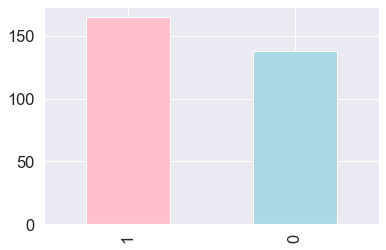

In [138]:
df['target'].value_counts().plot(kind='bar',color=['pink','lightblue']);

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [140]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [141]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Heart Disease Frequency according to sex

In [142]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [143]:
#compare target column with sex columns
pd.crosstab(df.target,df.sex)

sex      0    1
target         
0       24  114
1       72   93

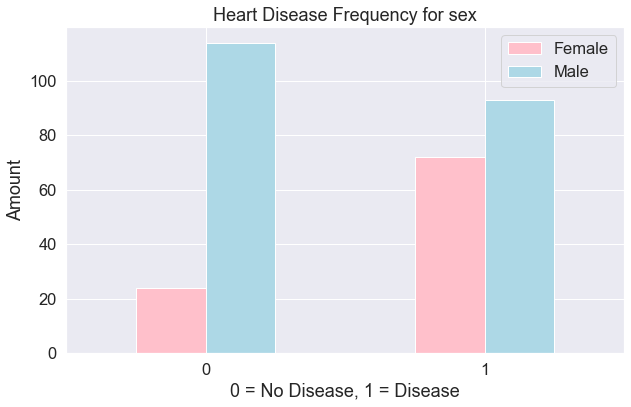

In [144]:
#Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['pink','lightblue'])
plt.title("Heart Disease Frequency for sex")
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

In [145]:
#compare target colum with age column
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [146]:
pd.crosstab(df.target,df.age)

age     29  34  35  37  38  39  40  41  42  43  ...  65  66  67  68  69  70  \
target                                          ...                           
0        0   0   2   0   1   1   2   1   1   3  ...   4   3   6   2   1   3   
1        1   2   2   2   2   3   1   9   7   5  ...   4   4   3   2   2   1   

age     71  74  76  77  
target                  
0        0   0   0   1  
1        3   1   1   0  

[2 rows x 41 columns]

### Age vs. Max Heart Rate for Heart Disease

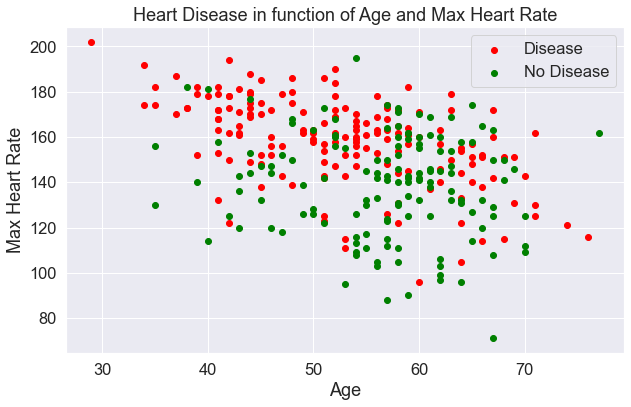

In [147]:
#create another figure
plt.figure(figsize=(10,6))

#Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='red')
#scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='green');

#Add some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(["Disease","No Disease"]);

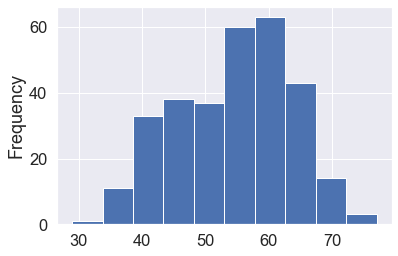

In [148]:
#check the distribution of age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest pain type

3.cp - chest pain type

     *0: Typical angina: chest pain related decrease blood supply to the heart
     
     *1: Atypical angina: chest pain not related to heart
     
     *2: Non-anginal pain: typically esophageal spasms (non heart related)
     
     *3: Asymptomatic: chest pain not showing signs of disease

In [149]:
pd.crosstab(df.cp,df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

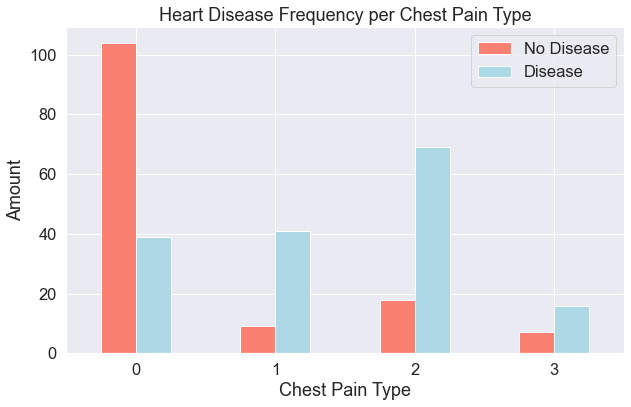

In [150]:
#make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6),
                                 color=['salmon','lightblue'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [151]:
#Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

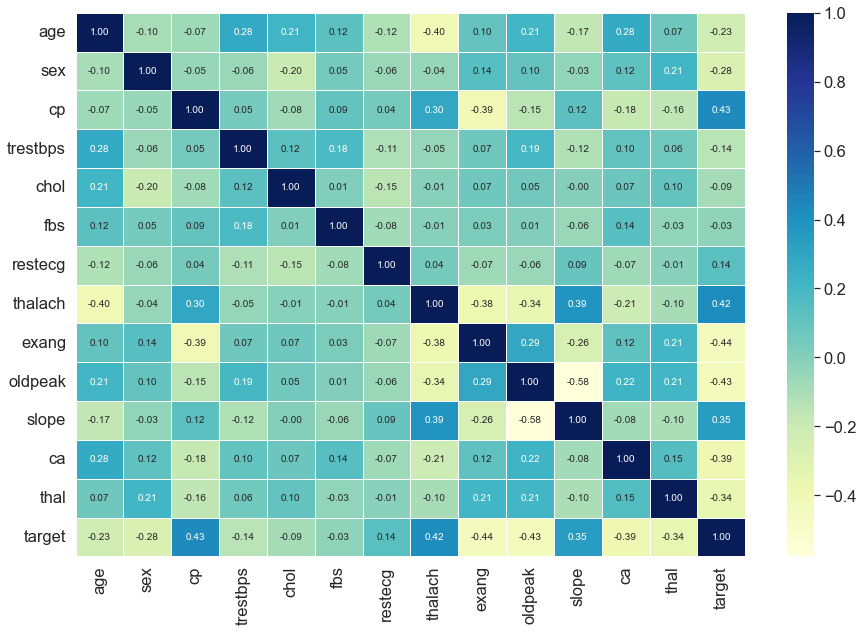

In [152]:
#Lets make our correlation matrix a little prettier
corr_matrix= df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')

## 5. Modelling

In [153]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [154]:
#Split our data into X and y
X = df.drop('target',axis=1)
y = df['target']

In [155]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [156]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [157]:
np.random.seed(42)

#splitting our data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [158]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

In [159]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

***Now we've got our data split into train and test set,its time to build a machine learning model***

    We'll train it(find the patterns) on the training set.

    And we'll test it (use the patterns) on the test set.

***We are going to use 3 different model***
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [161]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores   

In [162]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

D:\UDEMY\ML\classification-projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

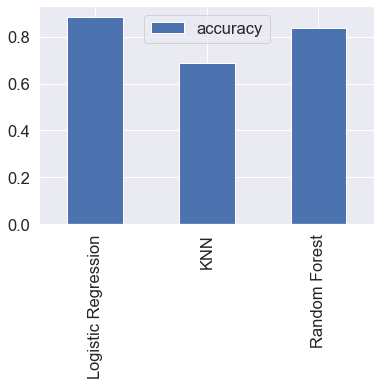

In [163]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

***Now we've got a baseline model.....and we know our models first predictions arent always what we should based our nextsteps off. What we should do?***

***Lets look at the following***
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [164]:
# lets tune KNN

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the traning score list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test score list
    test_scores.append(knn.score(X_test,y_test))

In [165]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [166]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


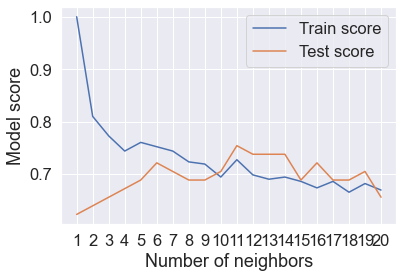

In [167]:
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

***We're going to tune:***
* LogisticRegression()
* RandomForestClassifier()
..........using RandomizedSearchCV


In [168]:
#create a hyperparameter grid for logistic regression
log_red_grid = {"C":np.logspace(-4,4,20),
                'solver':['liblinear']}
#create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [169]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

***Now we've got hyperparameter grid setup for each of our model,lets tune them using rnadomizedSearchCV....***

In [170]:
#Tune logisticregression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_red_grid,
                               cv=5,
                               n_iter=20,
                                verbose=True)

#Fit random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [171]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [172]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

   ***Now we've tuned LogisticRegression now lets do same for RandomForestClassifier***

In [173]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
#Fit random Hyperparameter search for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [174]:
#Find the best  hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [175]:
#Evaluate the randomized search RandomFprestClassifier
rs_rf.score(X_test,y_test)

0.8688524590163934

1. by hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter tuning with GridSearchCV

***Since our LogisticRegression model probvides the best scores so far,
we'll try and improve them again using GridSearchCV***


In [176]:
#Different hpyerparametr for our LogisticRegression model
log_red_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                            param_grid=log_red_grid,
                            cv=5,
                            verbose=True)

#Fit grid Hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [177]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [178]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier,beyond accuracy 

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

..........and it would be great if cross-validation was used where possible

***To make comparision and evaluate our trained model,first we need to make predictions***

In [179]:
#Make predictions with tuned model:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [180]:
y_preds = gs_log_reg.predict(X_test)

In [181]:
y_preds 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

D:\UDEMY\ML\classification-projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


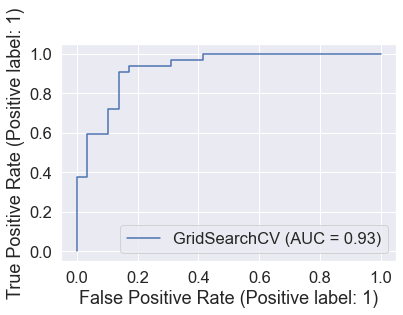

In [182]:
#Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test);

In [183]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


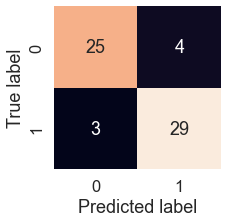

In [184]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

***Now we,ve got ROC curve ,an AUC metric and confusion matrix,lets get a classification report as well as cross-validated precision recall and F1 score***

In [185]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

***We're going to calculate precision ,recall,and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`***

In [186]:
#Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
#Create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [56]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [57]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [58]:
#Cross_validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision


0.8207936507936507

In [59]:
#cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [60]:
#cross-validated F1 score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross -validated classification metrics'}>

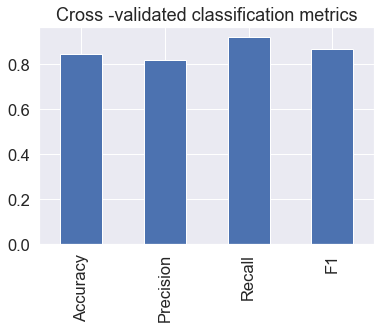

In [61]:
#Visualize our Cross validated matrix
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title='Cross -validated classification metrics',
                     legend=False)

### Feature Importance

***Feature importance is another way of asking, 'which features  contributed most to outcomes of the model and how did they contribute?***

Finding feature importance is different for each machine learning model

***One way to find fature importance is to search for (MODEL NAME) feature importance***

lets find feature importance for our LogisticRegression model

In [62]:
#Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train);

In [63]:
#Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [64]:
#Match coef's feature to columns
feature_dict = dict(zip(df.columns,(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

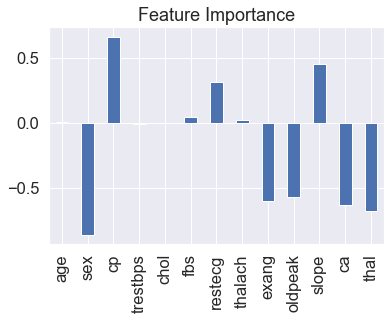

In [65]:
#Visualize the feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',
                     legend=False);

In [66]:
pd.crosstab(df['sex'],df['target'])

target    0   1
sex            
0        24  72
1       114  93

In [67]:
pd.crosstab(df['slope'],df['target'])

target   0    1
slope          
0       12    9
1       91   49
2       35  107

***slope - the slope of the peak exercise ST segment***

* 0: Upsloping: better heart rate with excercise (uncommon)

* 1: Flatsloping: minimal change (typical healthy heart)

* 2: Downslopins: signs of unhealthy heart

### 6. Experimentation 

***If you havent hit your evaluation metric yet....ask yourself....***

* Could you collect more data?
* Could you try a better model? Like Catboost or XGboost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is goodenough (you have hit your evaluation metric) how would   you export it and share it with others?


# XGBOOST MODEL TRAINING

1. Build a Preliminary XGBoost Model
2. Optimize Parameters with Cross Validation (GridSearchCV)
3. Build and Draw Final XGBoost Model

In [191]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#split data into X and Y
Predictors = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X=df.drop('target',axis=1)
y=df['target']

#Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


#Instanstiate the classifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree', use_label_encoder=False)

#fit the model
clf.fit(X_train,y_train,eval_metric='rmse')


D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [192]:
print(clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [193]:
clf.score(X_test,y_test)

0.8032786885245902

In [194]:
metrics.confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [105]:
XGB=clf.fit(X_train,y_train,eval_metric='rmse')
prediction=XGB.predict(X_test)

D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [72]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [101]:
metrics.confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

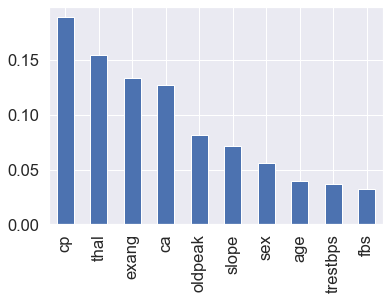

In [74]:
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='bar');

In [75]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   

     slope  ca  thal  TargetColumn  Prediction  
179      1   1     1             0           0  
228      1   0     3             0           0  
111      2   1     3             1           0  
246      1   2     3             0           0  
60       2   1     2             1           1

## Another approach for XGBOOST

In [195]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#Split data intp X and y
X = df.drop('target',axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate the classifier
xgb_clf=XGBClassifier(objective='binary:logistic',missing=None,seed=42)
xgb_clf.fit(X_train,y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmse',
            eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:0.43847
[1]	validation_0-rmse:0.41219
[2]	validation_0-rmse:0.39585
[3]	validation_0-rmse:0.38077
[4]	validation_0-rmse:0.37300
[5]	validation_0-rmse:0.37130
[6]	validation_0-rmse:0.37012
[7]	validation_0-rmse:0.36960
[8]	validation_0-rmse:0.36714
[9]	validation_0-rmse:0.37074
[10]	validation_0-rmse:0.37099
[11]	validation_0-rmse:0.37288
[12]	validation_0-rmse:0.37363
[13]	validation_0-rmse:0.37786
[14]	validation_0-rmse:0.37837
[15]	validation_0-rmse:0.38218
[16]	validation_0-rmse:0.38154
[17]	validation_0-rmse:0.38421


D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

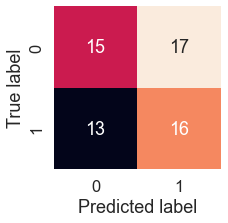

In [196]:
plot_conf_mat(y_test, y_preds)

In [203]:
pd.__version__

'1.4.1'

In [200]:
#Different hpyerparametr for our XGBoost model
xgb_grid = {"max_depth":[4],
            "learning_rate":[0.1,0.5,1],
            "gamma":[0.25],
            "reg_lambda":[10.0,20,100]}

#Setup grid hyperparameter search for XGBoost
gs_xgb = GridSearchCV(XGBClassifier(objective='binary:logistic',eval_metric='rmse',use_label_encoder=False),
                            param_grid=xgb_grid,
                            cv=5,
                            verbose=True)

#Fit grid Hyperparameter search model
gs_xgb.fit(X_train,y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Ind

D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Ind

In [204]:
gs_xgb.best_params_

{'gamma': 0.25, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 100}

In [205]:
gs_xgb.score(X_test,y_test)

0.819672131147541

In [206]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [208]:
y_preds=gs_xgb.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

D:\UDEMY\ML\classification-projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


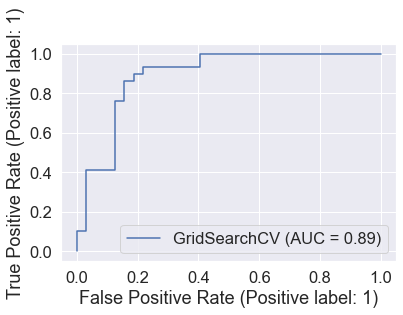

In [210]:
plot_roc_curve(gs_xgb,X_test,y_test);

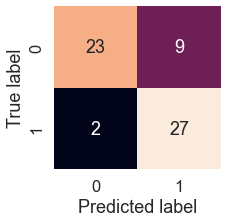

In [211]:
plot_conf_mat(y_test, y_preds)

In [212]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [213]:
gs_xgb.best_params_

{'gamma': 0.25, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 100}

In [230]:
new_xgb=XGBClassifier(gamma =0.25, 
                      learning_rate= 0.5, 
                      max_depth= 4, 
                      reg_lambda= 100,
                      use_label_encoder=False,
                      objective='binary:logistic',
                      eval_metric='rmse')

In [231]:
cv_acc_xgb=cross_val_score(new_xgb,X,y,cv=5,scoring='accuracy')
cv_acc_xgb=np.mean(cv_acc_xgb)
cv_acc_xgb

D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Ind

0.8414754098360657

In [239]:
cv_precision_xgb=cross_val_score(new_xgb,X,y,cv=5,scoring='precision')
cv_precision_xgb=np.mean(cv_precison_xgb)
cv_precision_xgb

D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Ind

0.8589929142167948

In [240]:
cv_recall_xgb=cross_val_score(new_xgb,X,y,cv=5,scoring='recall')
cv_recall_xgb=np.mean(cv_recall_xgb)
cv_recall_xgb

D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Ind

0.884848484848485

In [241]:
cv_F1_xgb=cross_val_score(new_xgb,X,y,cv=5,scoring='f1')
cv_F1_xgb=np.mean(cv_F1_xgb)
cv_F1_xgb

D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Ind

0.8589929142167948

<AxesSubplot:title={'center':'Cross -validated classification metrics'}>

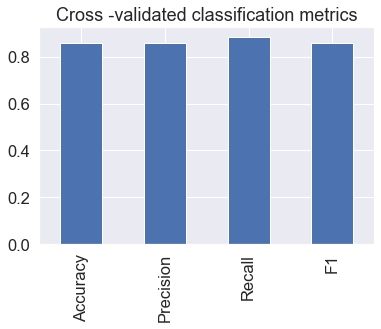

In [244]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc_xgb,
                           "Precision":cv_precision_xgb,
                           "Recall":cv_recall_xgb,
                           "F1":cv_F1_xgb},
                            index=[0])
cv_metrics.T.plot.bar(title='Cross -validated classification metrics',
                     legend=False)

# CATBOOST MODEL TRAINING 

In [253]:
from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=df.drop('target',axis=1)
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

cat_clf=CatBoostClassifier()

cat_clf.fit(X_train,
            y_train)


Learning rate set to 0.005621
0:	learn: 0.6884219	total: 950us	remaining: 949ms
1:	learn: 0.6846992	total: 1.86ms	remaining: 929ms
2:	learn: 0.6804482	total: 2.82ms	remaining: 938ms
3:	learn: 0.6762280	total: 3.78ms	remaining: 941ms
4:	learn: 0.6716854	total: 4.66ms	remaining: 926ms
5:	learn: 0.6672902	total: 5.46ms	remaining: 905ms
6:	learn: 0.6640072	total: 6.21ms	remaining: 881ms
7:	learn: 0.6602127	total: 6.96ms	remaining: 863ms
8:	learn: 0.6563948	total: 7.83ms	remaining: 862ms
9:	learn: 0.6525316	total: 8.6ms	remaining: 851ms
10:	learn: 0.6483925	total: 9.2ms	remaining: 827ms
11:	learn: 0.6449119	total: 9.94ms	remaining: 818ms
12:	learn: 0.6413090	total: 10.7ms	remaining: 811ms
13:	learn: 0.6374641	total: 11.5ms	remaining: 807ms
14:	learn: 0.6335822	total: 12.2ms	remaining: 803ms
15:	learn: 0.6288496	total: 13ms	remaining: 797ms
16:	learn: 0.6250951	total: 13.7ms	remaining: 792ms
17:	learn: 0.6209988	total: 14.4ms	remaining: 787ms
18:	learn: 0.6182407	total: 15.2ms	remaining: 784

229:	learn: 0.3029396	total: 168ms	remaining: 562ms
230:	learn: 0.3023481	total: 169ms	remaining: 561ms
231:	learn: 0.3019374	total: 169ms	remaining: 561ms
232:	learn: 0.3011900	total: 170ms	remaining: 560ms
233:	learn: 0.3005185	total: 171ms	remaining: 560ms
234:	learn: 0.2999282	total: 172ms	remaining: 559ms
235:	learn: 0.2989617	total: 173ms	remaining: 559ms
236:	learn: 0.2983288	total: 173ms	remaining: 558ms
237:	learn: 0.2974186	total: 174ms	remaining: 558ms
238:	learn: 0.2967187	total: 175ms	remaining: 557ms
239:	learn: 0.2959042	total: 176ms	remaining: 556ms
240:	learn: 0.2953726	total: 176ms	remaining: 556ms
241:	learn: 0.2947652	total: 177ms	remaining: 555ms
242:	learn: 0.2940728	total: 178ms	remaining: 554ms
243:	learn: 0.2932435	total: 179ms	remaining: 554ms
244:	learn: 0.2924460	total: 180ms	remaining: 554ms
245:	learn: 0.2919825	total: 181ms	remaining: 554ms
246:	learn: 0.2915173	total: 182ms	remaining: 554ms
247:	learn: 0.2909224	total: 183ms	remaining: 554ms
248:	learn: 

445:	learn: 0.2088577	total: 340ms	remaining: 422ms
446:	learn: 0.2087177	total: 341ms	remaining: 422ms
447:	learn: 0.2083429	total: 342ms	remaining: 421ms
448:	learn: 0.2081122	total: 343ms	remaining: 420ms
449:	learn: 0.2079164	total: 343ms	remaining: 420ms
450:	learn: 0.2077417	total: 344ms	remaining: 419ms
451:	learn: 0.2074225	total: 345ms	remaining: 418ms
452:	learn: 0.2071804	total: 346ms	remaining: 418ms
453:	learn: 0.2068888	total: 347ms	remaining: 417ms
454:	learn: 0.2064882	total: 347ms	remaining: 416ms
455:	learn: 0.2063003	total: 348ms	remaining: 415ms
456:	learn: 0.2061602	total: 349ms	remaining: 415ms
457:	learn: 0.2057411	total: 350ms	remaining: 414ms
458:	learn: 0.2053569	total: 351ms	remaining: 413ms
459:	learn: 0.2049943	total: 351ms	remaining: 413ms
460:	learn: 0.2046044	total: 352ms	remaining: 412ms
461:	learn: 0.2043495	total: 353ms	remaining: 411ms
462:	learn: 0.2038800	total: 354ms	remaining: 410ms
463:	learn: 0.2036153	total: 354ms	remaining: 409ms
464:	learn: 

689:	learn: 0.1510970	total: 522ms	remaining: 234ms
690:	learn: 0.1509995	total: 523ms	remaining: 234ms
691:	learn: 0.1507670	total: 523ms	remaining: 233ms
692:	learn: 0.1506808	total: 524ms	remaining: 232ms
693:	learn: 0.1504595	total: 525ms	remaining: 231ms
694:	learn: 0.1502941	total: 526ms	remaining: 231ms
695:	learn: 0.1501264	total: 526ms	remaining: 230ms
696:	learn: 0.1498762	total: 527ms	remaining: 229ms
697:	learn: 0.1496898	total: 528ms	remaining: 228ms
698:	learn: 0.1494803	total: 529ms	remaining: 228ms
699:	learn: 0.1494708	total: 529ms	remaining: 227ms
700:	learn: 0.1493960	total: 530ms	remaining: 226ms
701:	learn: 0.1492055	total: 531ms	remaining: 225ms
702:	learn: 0.1490233	total: 531ms	remaining: 225ms
703:	learn: 0.1487576	total: 532ms	remaining: 224ms
704:	learn: 0.1486226	total: 533ms	remaining: 223ms
705:	learn: 0.1484913	total: 534ms	remaining: 222ms
706:	learn: 0.1483920	total: 535ms	remaining: 222ms
707:	learn: 0.1481992	total: 535ms	remaining: 221ms
708:	learn: 

915:	learn: 0.1149028	total: 687ms	remaining: 63ms
916:	learn: 0.1147922	total: 688ms	remaining: 62.3ms
917:	learn: 0.1147332	total: 689ms	remaining: 61.5ms
918:	learn: 0.1145390	total: 690ms	remaining: 60.8ms
919:	learn: 0.1144419	total: 691ms	remaining: 60.1ms
920:	learn: 0.1143226	total: 691ms	remaining: 59.3ms
921:	learn: 0.1141744	total: 692ms	remaining: 58.6ms
922:	learn: 0.1140943	total: 693ms	remaining: 57.8ms
923:	learn: 0.1139256	total: 694ms	remaining: 57.1ms
924:	learn: 0.1138057	total: 694ms	remaining: 56.3ms
925:	learn: 0.1136555	total: 695ms	remaining: 55.5ms
926:	learn: 0.1135080	total: 696ms	remaining: 54.8ms
927:	learn: 0.1133170	total: 697ms	remaining: 54ms
928:	learn: 0.1131790	total: 697ms	remaining: 53.3ms
929:	learn: 0.1130606	total: 698ms	remaining: 52.5ms
930:	learn: 0.1129714	total: 699ms	remaining: 51.8ms
931:	learn: 0.1127850	total: 700ms	remaining: 51ms
932:	learn: 0.1125986	total: 701ms	remaining: 50.3ms
933:	learn: 0.1124275	total: 701ms	remaining: 49.6ms

In [249]:
cat_clf.score(X_test,y_test)

0.8360655737704918

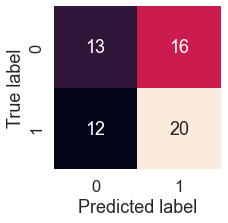

In [250]:
plot_conf_mat(y_test,y_preds)

In [255]:
cat_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.005621000193059444,
 'score_function': 'Cosine',
 'task_type': 'CPU',

In [276]:
#Different hpyerparametr for our CatBoost model
cat_grid = {"depth":[4,6,10],
            "learning_rate":[0.1,0.5,1],
            "l2_leaf_reg":[1,3,5],
            }

cat_clf=CatBoostClassifier(iterations=1000,loss_function= 'Logloss')
gs_cat_result=cat_clf.grid_search(cat_grid,
                              X,
                              y)
#Fit grid Hyperparameter search model
cat_clf.fit(X_train,y_train,
            eval_set=[(X_test,y_test)],
            early_stopping_rounds=50);

0:	learn: 0.6457740	test: 0.6547724	best: 0.6547724 (0)	total: 699us	remaining: 698ms
1:	learn: 0.5958804	test: 0.6236856	best: 0.6236856 (1)	total: 1.51ms	remaining: 754ms
2:	learn: 0.5361103	test: 0.5517025	best: 0.5517025 (2)	total: 2.18ms	remaining: 726ms
3:	learn: 0.5081049	test: 0.5164239	best: 0.5164239 (3)	total: 2.85ms	remaining: 709ms
4:	learn: 0.4876179	test: 0.4985777	best: 0.4985777 (4)	total: 3.53ms	remaining: 702ms
5:	learn: 0.4602367	test: 0.4863702	best: 0.4863702 (5)	total: 4.15ms	remaining: 687ms
6:	learn: 0.4314275	test: 0.4554138	best: 0.4554138 (6)	total: 4.77ms	remaining: 677ms
7:	learn: 0.4076899	test: 0.4295239	best: 0.4295239 (7)	total: 5.38ms	remaining: 667ms
8:	learn: 0.3902410	test: 0.4261422	best: 0.4261422 (8)	total: 5.96ms	remaining: 656ms
9:	learn: 0.3781500	test: 0.4217250	best: 0.4217250 (9)	total: 6.51ms	remaining: 645ms
10:	learn: 0.3652614	test: 0.4181607	best: 0.4181607 (10)	total: 7.12ms	remaining: 640ms
11:	learn: 0.3520558	test: 0.4032610	best:

283:	learn: 0.0113004	test: 0.5435343	best: 0.3739138 (25)	total: 176ms	remaining: 445ms
284:	learn: 0.0111930	test: 0.5434178	best: 0.3739138 (25)	total: 177ms	remaining: 444ms
285:	learn: 0.0111276	test: 0.5440432	best: 0.3739138 (25)	total: 178ms	remaining: 444ms
286:	learn: 0.0110121	test: 0.5412499	best: 0.3739138 (25)	total: 178ms	remaining: 443ms
287:	learn: 0.0109303	test: 0.5424393	best: 0.3739138 (25)	total: 179ms	remaining: 442ms
288:	learn: 0.0108464	test: 0.5432555	best: 0.3739138 (25)	total: 180ms	remaining: 442ms
289:	learn: 0.0107895	test: 0.5428153	best: 0.3739138 (25)	total: 180ms	remaining: 441ms
290:	learn: 0.0106256	test: 0.5442351	best: 0.3739138 (25)	total: 181ms	remaining: 441ms
291:	learn: 0.0105797	test: 0.5460993	best: 0.3739138 (25)	total: 181ms	remaining: 440ms
292:	learn: 0.0105504	test: 0.5452458	best: 0.3739138 (25)	total: 182ms	remaining: 439ms
293:	learn: 0.0104578	test: 0.5467634	best: 0.3739138 (25)	total: 183ms	remaining: 439ms
294:	learn: 0.0103766

551:	learn: 0.0041245	test: 0.6523151	best: 0.3739138 (25)	total: 335ms	remaining: 272ms
552:	learn: 0.0040971	test: 0.6524968	best: 0.3739138 (25)	total: 336ms	remaining: 272ms
553:	learn: 0.0040970	test: 0.6525041	best: 0.3739138 (25)	total: 337ms	remaining: 271ms
554:	learn: 0.0040970	test: 0.6525049	best: 0.3739138 (25)	total: 337ms	remaining: 270ms
555:	learn: 0.0040970	test: 0.6525070	best: 0.3739138 (25)	total: 338ms	remaining: 270ms
556:	learn: 0.0040969	test: 0.6525101	best: 0.3739138 (25)	total: 338ms	remaining: 269ms
557:	learn: 0.0040968	test: 0.6525122	best: 0.3739138 (25)	total: 339ms	remaining: 268ms
558:	learn: 0.0040968	test: 0.6525150	best: 0.3739138 (25)	total: 340ms	remaining: 268ms
559:	learn: 0.0040968	test: 0.6525171	best: 0.3739138 (25)	total: 340ms	remaining: 267ms
560:	learn: 0.0040793	test: 0.6525818	best: 0.3739138 (25)	total: 341ms	remaining: 267ms
561:	learn: 0.0040748	test: 0.6526588	best: 0.3739138 (25)	total: 341ms	remaining: 266ms
562:	learn: 0.0040649

860:	learn: 0.0038351	test: 0.6526951	best: 0.3739138 (25)	total: 509ms	remaining: 82.1ms
861:	learn: 0.0038351	test: 0.6526955	best: 0.3739138 (25)	total: 509ms	remaining: 81.6ms
862:	learn: 0.0038351	test: 0.6526921	best: 0.3739138 (25)	total: 510ms	remaining: 81ms
863:	learn: 0.0038351	test: 0.6526935	best: 0.3739138 (25)	total: 511ms	remaining: 80.4ms
864:	learn: 0.0038351	test: 0.6526938	best: 0.3739138 (25)	total: 511ms	remaining: 79.8ms
865:	learn: 0.0038351	test: 0.6526941	best: 0.3739138 (25)	total: 512ms	remaining: 79.2ms
866:	learn: 0.0038351	test: 0.6526941	best: 0.3739138 (25)	total: 512ms	remaining: 78.6ms
867:	learn: 0.0038350	test: 0.6526908	best: 0.3739138 (25)	total: 513ms	remaining: 78ms
868:	learn: 0.0038350	test: 0.6526910	best: 0.3739138 (25)	total: 513ms	remaining: 77.4ms
869:	learn: 0.0038350	test: 0.6526910	best: 0.3739138 (25)	total: 514ms	remaining: 76.8ms
870:	learn: 0.0038350	test: 0.6526903	best: 0.3739138 (25)	total: 515ms	remaining: 76.2ms
871:	learn: 0.

164:	learn: 0.0039799	test: 0.5600417	best: 0.3257058 (12)	total: 93.9ms	remaining: 475ms
165:	learn: 0.0039799	test: 0.5600417	best: 0.3257058 (12)	total: 94.5ms	remaining: 475ms
166:	learn: 0.0039429	test: 0.5613136	best: 0.3257058 (12)	total: 95.1ms	remaining: 474ms
167:	learn: 0.0038256	test: 0.5531968	best: 0.3257058 (12)	total: 95.7ms	remaining: 474ms
168:	learn: 0.0037522	test: 0.5586386	best: 0.3257058 (12)	total: 96.3ms	remaining: 474ms
169:	learn: 0.0037522	test: 0.5586386	best: 0.3257058 (12)	total: 96.8ms	remaining: 473ms
170:	learn: 0.0036542	test: 0.5547324	best: 0.3257058 (12)	total: 97.4ms	remaining: 472ms
171:	learn: 0.0036538	test: 0.5547551	best: 0.3257058 (12)	total: 98ms	remaining: 472ms
172:	learn: 0.0036538	test: 0.5547540	best: 0.3257058 (12)	total: 98.5ms	remaining: 471ms
173:	learn: 0.0036529	test: 0.5547999	best: 0.3257058 (12)	total: 99ms	remaining: 470ms
174:	learn: 0.0036529	test: 0.5547987	best: 0.3257058 (12)	total: 99.6ms	remaining: 469ms
175:	learn: 0.

478:	learn: 0.0024288	test: 0.5789416	best: 0.3257058 (12)	total: 269ms	remaining: 293ms
479:	learn: 0.0024286	test: 0.5789498	best: 0.3257058 (12)	total: 270ms	remaining: 292ms
480:	learn: 0.0024286	test: 0.5789498	best: 0.3257058 (12)	total: 270ms	remaining: 292ms
481:	learn: 0.0024286	test: 0.5789818	best: 0.3257058 (12)	total: 271ms	remaining: 291ms
482:	learn: 0.0024281	test: 0.5790016	best: 0.3257058 (12)	total: 271ms	remaining: 290ms
483:	learn: 0.0024280	test: 0.5790063	best: 0.3257058 (12)	total: 272ms	remaining: 290ms
484:	learn: 0.0024280	test: 0.5790039	best: 0.3257058 (12)	total: 272ms	remaining: 289ms
485:	learn: 0.0024279	test: 0.5790068	best: 0.3257058 (12)	total: 273ms	remaining: 289ms
486:	learn: 0.0024279	test: 0.5790095	best: 0.3257058 (12)	total: 273ms	remaining: 288ms
487:	learn: 0.0024279	test: 0.5790095	best: 0.3257058 (12)	total: 274ms	remaining: 288ms
488:	learn: 0.0024279	test: 0.5790254	best: 0.3257058 (12)	total: 275ms	remaining: 287ms
489:	learn: 0.0024278

754:	learn: 0.0021675	test: 0.5912075	best: 0.3257058 (12)	total: 440ms	remaining: 143ms
755:	learn: 0.0021674	test: 0.5912172	best: 0.3257058 (12)	total: 440ms	remaining: 142ms
756:	learn: 0.0021673	test: 0.5912110	best: 0.3257058 (12)	total: 441ms	remaining: 142ms
757:	learn: 0.0021672	test: 0.5912194	best: 0.3257058 (12)	total: 441ms	remaining: 141ms
758:	learn: 0.0021672	test: 0.5912191	best: 0.3257058 (12)	total: 442ms	remaining: 140ms
759:	learn: 0.0021672	test: 0.5912147	best: 0.3257058 (12)	total: 443ms	remaining: 140ms
760:	learn: 0.0021672	test: 0.5912189	best: 0.3257058 (12)	total: 443ms	remaining: 139ms
761:	learn: 0.0021671	test: 0.5912235	best: 0.3257058 (12)	total: 444ms	remaining: 139ms
762:	learn: 0.0021590	test: 0.5910687	best: 0.3257058 (12)	total: 444ms	remaining: 138ms
763:	learn: 0.0021590	test: 0.5910687	best: 0.3257058 (12)	total: 445ms	remaining: 137ms
764:	learn: 0.0021590	test: 0.5910672	best: 0.3257058 (12)	total: 446ms	remaining: 137ms
765:	learn: 0.0021589

53:	learn: 0.0036156	test: 0.7277888	best: 0.3897914 (2)	total: 32ms	remaining: 561ms
54:	learn: 0.0036155	test: 0.7277990	best: 0.3897914 (2)	total: 32.6ms	remaining: 561ms
55:	learn: 0.0036153	test: 0.7278027	best: 0.3897914 (2)	total: 33.3ms	remaining: 561ms
56:	learn: 0.0036152	test: 0.7278159	best: 0.3897914 (2)	total: 33.8ms	remaining: 560ms
57:	learn: 0.0036151	test: 0.7278221	best: 0.3897914 (2)	total: 34.4ms	remaining: 559ms
58:	learn: 0.0036150	test: 0.7278355	best: 0.3897914 (2)	total: 35ms	remaining: 558ms
59:	learn: 0.0036147	test: 0.7278763	best: 0.3897914 (2)	total: 35.6ms	remaining: 557ms
60:	learn: 0.0036145	test: 0.7279098	best: 0.3897914 (2)	total: 36.1ms	remaining: 556ms
61:	learn: 0.0034424	test: 0.7273273	best: 0.3897914 (2)	total: 36.7ms	remaining: 555ms
62:	learn: 0.0034417	test: 0.7274170	best: 0.3897914 (2)	total: 37.3ms	remaining: 555ms
63:	learn: 0.0034414	test: 0.7274282	best: 0.3897914 (2)	total: 37.9ms	remaining: 554ms
64:	learn: 0.0034407	test: 0.7274750

368:	learn: 0.0016365	test: 0.7678000	best: 0.3897914 (2)	total: 208ms	remaining: 356ms
369:	learn: 0.0016363	test: 0.7678915	best: 0.3897914 (2)	total: 209ms	remaining: 355ms
370:	learn: 0.0016362	test: 0.7679000	best: 0.3897914 (2)	total: 209ms	remaining: 355ms
371:	learn: 0.0016362	test: 0.7679041	best: 0.3897914 (2)	total: 210ms	remaining: 354ms
372:	learn: 0.0016360	test: 0.7679333	best: 0.3897914 (2)	total: 210ms	remaining: 354ms
373:	learn: 0.0016360	test: 0.7679344	best: 0.3897914 (2)	total: 211ms	remaining: 353ms
374:	learn: 0.0016358	test: 0.7679371	best: 0.3897914 (2)	total: 211ms	remaining: 352ms
375:	learn: 0.0016358	test: 0.7679373	best: 0.3897914 (2)	total: 212ms	remaining: 352ms
376:	learn: 0.0016357	test: 0.7679431	best: 0.3897914 (2)	total: 213ms	remaining: 351ms
377:	learn: 0.0016357	test: 0.7679438	best: 0.3897914 (2)	total: 213ms	remaining: 351ms
378:	learn: 0.0016357	test: 0.7679496	best: 0.3897914 (2)	total: 214ms	remaining: 350ms
379:	learn: 0.0016356	test: 0.76

661:	learn: 0.0015107	test: 0.7766718	best: 0.3897914 (2)	total: 369ms	remaining: 189ms
662:	learn: 0.0015107	test: 0.7766662	best: 0.3897914 (2)	total: 370ms	remaining: 188ms
663:	learn: 0.0015106	test: 0.7766573	best: 0.3897914 (2)	total: 371ms	remaining: 188ms
664:	learn: 0.0015100	test: 0.7768076	best: 0.3897914 (2)	total: 371ms	remaining: 187ms
665:	learn: 0.0015100	test: 0.7768299	best: 0.3897914 (2)	total: 372ms	remaining: 186ms
666:	learn: 0.0015100	test: 0.7768299	best: 0.3897914 (2)	total: 372ms	remaining: 186ms
667:	learn: 0.0015099	test: 0.7768403	best: 0.3897914 (2)	total: 373ms	remaining: 185ms
668:	learn: 0.0015097	test: 0.7767860	best: 0.3897914 (2)	total: 373ms	remaining: 185ms
669:	learn: 0.0015096	test: 0.7767984	best: 0.3897914 (2)	total: 374ms	remaining: 184ms
670:	learn: 0.0015096	test: 0.7768181	best: 0.3897914 (2)	total: 375ms	remaining: 184ms
671:	learn: 0.0015095	test: 0.7768237	best: 0.3897914 (2)	total: 375ms	remaining: 183ms
672:	learn: 0.0015095	test: 0.77

964:	learn: 0.0014294	test: 0.7814291	best: 0.3897914 (2)	total: 544ms	remaining: 19.7ms
965:	learn: 0.0014293	test: 0.7814547	best: 0.3897914 (2)	total: 544ms	remaining: 19.2ms
966:	learn: 0.0014292	test: 0.7814829	best: 0.3897914 (2)	total: 545ms	remaining: 18.6ms
967:	learn: 0.0014290	test: 0.7815551	best: 0.3897914 (2)	total: 546ms	remaining: 18ms
968:	learn: 0.0014290	test: 0.7815735	best: 0.3897914 (2)	total: 546ms	remaining: 17.5ms
969:	learn: 0.0014289	test: 0.7815813	best: 0.3897914 (2)	total: 547ms	remaining: 16.9ms
970:	learn: 0.0014289	test: 0.7815800	best: 0.3897914 (2)	total: 548ms	remaining: 16.4ms
971:	learn: 0.0014288	test: 0.7815981	best: 0.3897914 (2)	total: 548ms	remaining: 15.8ms
972:	learn: 0.0014288	test: 0.7815996	best: 0.3897914 (2)	total: 549ms	remaining: 15.2ms
973:	learn: 0.0014288	test: 0.7816073	best: 0.3897914 (2)	total: 549ms	remaining: 14.7ms
974:	learn: 0.0014287	test: 0.7816206	best: 0.3897914 (2)	total: 550ms	remaining: 14.1ms
975:	learn: 0.0014287	t

247:	learn: 0.0299141	test: 0.5043300	best: 0.3674543 (75)	total: 153ms	remaining: 465ms
248:	learn: 0.0296880	test: 0.5053039	best: 0.3674543 (75)	total: 154ms	remaining: 464ms
249:	learn: 0.0296723	test: 0.5052714	best: 0.3674543 (75)	total: 155ms	remaining: 464ms
250:	learn: 0.0294733	test: 0.5068923	best: 0.3674543 (75)	total: 155ms	remaining: 463ms
251:	learn: 0.0291801	test: 0.5055648	best: 0.3674543 (75)	total: 156ms	remaining: 463ms
252:	learn: 0.0290517	test: 0.5058055	best: 0.3674543 (75)	total: 157ms	remaining: 462ms
253:	learn: 0.0289545	test: 0.5055878	best: 0.3674543 (75)	total: 157ms	remaining: 461ms
254:	learn: 0.0288790	test: 0.5059441	best: 0.3674543 (75)	total: 158ms	remaining: 461ms
255:	learn: 0.0286779	test: 0.5063912	best: 0.3674543 (75)	total: 158ms	remaining: 460ms
256:	learn: 0.0283639	test: 0.5075699	best: 0.3674543 (75)	total: 159ms	remaining: 460ms
257:	learn: 0.0280214	test: 0.5097043	best: 0.3674543 (75)	total: 160ms	remaining: 459ms
258:	learn: 0.0278013

535:	learn: 0.0098320	test: 0.6042312	best: 0.3674543 (75)	total: 330ms	remaining: 285ms
536:	learn: 0.0098320	test: 0.6042383	best: 0.3674543 (75)	total: 330ms	remaining: 285ms
537:	learn: 0.0098089	test: 0.6043491	best: 0.3674543 (75)	total: 331ms	remaining: 284ms
538:	learn: 0.0098008	test: 0.6043940	best: 0.3674543 (75)	total: 331ms	remaining: 283ms
539:	learn: 0.0097921	test: 0.6039032	best: 0.3674543 (75)	total: 332ms	remaining: 283ms
540:	learn: 0.0097780	test: 0.6037879	best: 0.3674543 (75)	total: 333ms	remaining: 282ms
541:	learn: 0.0097780	test: 0.6037864	best: 0.3674543 (75)	total: 333ms	remaining: 282ms
542:	learn: 0.0097218	test: 0.6031964	best: 0.3674543 (75)	total: 334ms	remaining: 281ms
543:	learn: 0.0097107	test: 0.6031373	best: 0.3674543 (75)	total: 335ms	remaining: 280ms
544:	learn: 0.0096718	test: 0.6043469	best: 0.3674543 (75)	total: 335ms	remaining: 280ms
545:	learn: 0.0096411	test: 0.6040230	best: 0.3674543 (75)	total: 336ms	remaining: 279ms
546:	learn: 0.0096411

798:	learn: 0.0069757	test: 0.6289623	best: 0.3674543 (75)	total: 490ms	remaining: 123ms
799:	learn: 0.0069395	test: 0.6287413	best: 0.3674543 (75)	total: 491ms	remaining: 123ms
800:	learn: 0.0069392	test: 0.6287232	best: 0.3674543 (75)	total: 491ms	remaining: 122ms
801:	learn: 0.0069392	test: 0.6287234	best: 0.3674543 (75)	total: 492ms	remaining: 121ms
802:	learn: 0.0069230	test: 0.6288890	best: 0.3674543 (75)	total: 493ms	remaining: 121ms
803:	learn: 0.0069229	test: 0.6288972	best: 0.3674543 (75)	total: 493ms	remaining: 120ms
804:	learn: 0.0069176	test: 0.6290836	best: 0.3674543 (75)	total: 494ms	remaining: 120ms
805:	learn: 0.0069175	test: 0.6290941	best: 0.3674543 (75)	total: 495ms	remaining: 119ms
806:	learn: 0.0069175	test: 0.6290934	best: 0.3674543 (75)	total: 495ms	remaining: 118ms
807:	learn: 0.0069174	test: 0.6290927	best: 0.3674543 (75)	total: 496ms	remaining: 118ms
808:	learn: 0.0069174	test: 0.6290919	best: 0.3674543 (75)	total: 497ms	remaining: 117ms
809:	learn: 0.0069174

79:	learn: 0.0137797	test: 0.5174083	best: 0.3527113 (15)	total: 52.6ms	remaining: 605ms
80:	learn: 0.0133814	test: 0.5228800	best: 0.3527113 (15)	total: 53.3ms	remaining: 605ms
81:	learn: 0.0131368	test: 0.5221688	best: 0.3527113 (15)	total: 54ms	remaining: 605ms
82:	learn: 0.0129609	test: 0.5287389	best: 0.3527113 (15)	total: 54.8ms	remaining: 606ms
83:	learn: 0.0128911	test: 0.5295607	best: 0.3527113 (15)	total: 55.5ms	remaining: 605ms
84:	learn: 0.0123320	test: 0.5364514	best: 0.3527113 (15)	total: 56.3ms	remaining: 606ms
85:	learn: 0.0120084	test: 0.5405621	best: 0.3527113 (15)	total: 56.9ms	remaining: 605ms
86:	learn: 0.0114851	test: 0.5354733	best: 0.3527113 (15)	total: 57.6ms	remaining: 605ms
87:	learn: 0.0114075	test: 0.5362254	best: 0.3527113 (15)	total: 58.2ms	remaining: 604ms
88:	learn: 0.0110536	test: 0.5359834	best: 0.3527113 (15)	total: 58.9ms	remaining: 603ms
89:	learn: 0.0109243	test: 0.5403822	best: 0.3527113 (15)	total: 59.6ms	remaining: 602ms
90:	learn: 0.0107459	te

342:	learn: 0.0049785	test: 0.5948064	best: 0.3527113 (15)	total: 217ms	remaining: 416ms
343:	learn: 0.0049785	test: 0.5948044	best: 0.3527113 (15)	total: 218ms	remaining: 415ms
344:	learn: 0.0049785	test: 0.5948019	best: 0.3527113 (15)	total: 218ms	remaining: 415ms
345:	learn: 0.0049785	test: 0.5948008	best: 0.3527113 (15)	total: 219ms	remaining: 414ms
346:	learn: 0.0049783	test: 0.5948033	best: 0.3527113 (15)	total: 220ms	remaining: 413ms
347:	learn: 0.0049783	test: 0.5948017	best: 0.3527113 (15)	total: 220ms	remaining: 413ms
348:	learn: 0.0049781	test: 0.5947751	best: 0.3527113 (15)	total: 221ms	remaining: 412ms
349:	learn: 0.0049779	test: 0.5947818	best: 0.3527113 (15)	total: 221ms	remaining: 411ms
350:	learn: 0.0049778	test: 0.5947726	best: 0.3527113 (15)	total: 222ms	remaining: 411ms
351:	learn: 0.0049683	test: 0.5947220	best: 0.3527113 (15)	total: 223ms	remaining: 410ms
352:	learn: 0.0049683	test: 0.5947248	best: 0.3527113 (15)	total: 223ms	remaining: 409ms
353:	learn: 0.0049678

637:	learn: 0.0045494	test: 0.5877200	best: 0.3527113 (15)	total: 395ms	remaining: 224ms
638:	learn: 0.0045494	test: 0.5877182	best: 0.3527113 (15)	total: 396ms	remaining: 224ms
639:	learn: 0.0045463	test: 0.5874300	best: 0.3527113 (15)	total: 397ms	remaining: 223ms
640:	learn: 0.0044304	test: 0.5871217	best: 0.3527113 (15)	total: 397ms	remaining: 222ms
641:	learn: 0.0043728	test: 0.5855014	best: 0.3527113 (15)	total: 398ms	remaining: 222ms
642:	learn: 0.0043155	test: 0.5851784	best: 0.3527113 (15)	total: 399ms	remaining: 221ms
643:	learn: 0.0042712	test: 0.5820476	best: 0.3527113 (15)	total: 399ms	remaining: 221ms
644:	learn: 0.0042666	test: 0.5821491	best: 0.3527113 (15)	total: 400ms	remaining: 220ms
645:	learn: 0.0042333	test: 0.5834449	best: 0.3527113 (15)	total: 400ms	remaining: 219ms
646:	learn: 0.0041653	test: 0.5844963	best: 0.3527113 (15)	total: 401ms	remaining: 219ms
647:	learn: 0.0041291	test: 0.5834252	best: 0.3527113 (15)	total: 402ms	remaining: 218ms
648:	learn: 0.0041290

910:	learn: 0.0031190	test: 0.6007387	best: 0.3527113 (15)	total: 561ms	remaining: 54.8ms
911:	learn: 0.0031187	test: 0.6007519	best: 0.3527113 (15)	total: 562ms	remaining: 54.2ms
912:	learn: 0.0031187	test: 0.6007502	best: 0.3527113 (15)	total: 562ms	remaining: 53.6ms
913:	learn: 0.0031187	test: 0.6007446	best: 0.3527113 (15)	total: 563ms	remaining: 53ms
914:	learn: 0.0031186	test: 0.6007646	best: 0.3527113 (15)	total: 564ms	remaining: 52.4ms
915:	learn: 0.0031178	test: 0.6008451	best: 0.3527113 (15)	total: 564ms	remaining: 51.7ms
916:	learn: 0.0031178	test: 0.6008339	best: 0.3527113 (15)	total: 565ms	remaining: 51.1ms
917:	learn: 0.0031178	test: 0.6008331	best: 0.3527113 (15)	total: 565ms	remaining: 50.5ms
918:	learn: 0.0031178	test: 0.6008325	best: 0.3527113 (15)	total: 566ms	remaining: 49.9ms
919:	learn: 0.0031177	test: 0.6008348	best: 0.3527113 (15)	total: 567ms	remaining: 49.3ms
920:	learn: 0.0031177	test: 0.6008320	best: 0.3527113 (15)	total: 567ms	remaining: 48.7ms
921:	learn: 

199:	learn: 0.0044843	test: 0.6087318	best: 0.3433916 (2)	total: 123ms	remaining: 491ms
200:	learn: 0.0044837	test: 0.6087471	best: 0.3433916 (2)	total: 123ms	remaining: 491ms
201:	learn: 0.0044821	test: 0.6087955	best: 0.3433916 (2)	total: 124ms	remaining: 490ms
202:	learn: 0.0044821	test: 0.6087909	best: 0.3433916 (2)	total: 125ms	remaining: 490ms
203:	learn: 0.0044820	test: 0.6087927	best: 0.3433916 (2)	total: 125ms	remaining: 489ms
204:	learn: 0.0044810	test: 0.6087910	best: 0.3433916 (2)	total: 126ms	remaining: 488ms
205:	learn: 0.0044808	test: 0.6088086	best: 0.3433916 (2)	total: 126ms	remaining: 487ms
206:	learn: 0.0044807	test: 0.6088152	best: 0.3433916 (2)	total: 127ms	remaining: 487ms
207:	learn: 0.0044801	test: 0.6088293	best: 0.3433916 (2)	total: 128ms	remaining: 486ms
208:	learn: 0.0044798	test: 0.6088305	best: 0.3433916 (2)	total: 128ms	remaining: 486ms
209:	learn: 0.0044794	test: 0.6088384	best: 0.3433916 (2)	total: 129ms	remaining: 485ms
210:	learn: 0.0044781	test: 0.60

464:	learn: 0.0032431	test: 0.6224818	best: 0.3433916 (2)	total: 288ms	remaining: 331ms
465:	learn: 0.0032430	test: 0.6224947	best: 0.3433916 (2)	total: 288ms	remaining: 330ms
466:	learn: 0.0032430	test: 0.6224947	best: 0.3433916 (2)	total: 289ms	remaining: 330ms
467:	learn: 0.0032429	test: 0.6224996	best: 0.3433916 (2)	total: 289ms	remaining: 329ms
468:	learn: 0.0032428	test: 0.6225057	best: 0.3433916 (2)	total: 290ms	remaining: 328ms
469:	learn: 0.0032428	test: 0.6225040	best: 0.3433916 (2)	total: 291ms	remaining: 328ms
470:	learn: 0.0032427	test: 0.6224994	best: 0.3433916 (2)	total: 291ms	remaining: 327ms
471:	learn: 0.0032425	test: 0.6225139	best: 0.3433916 (2)	total: 292ms	remaining: 327ms
472:	learn: 0.0032423	test: 0.6224918	best: 0.3433916 (2)	total: 293ms	remaining: 326ms
473:	learn: 0.0032422	test: 0.6224889	best: 0.3433916 (2)	total: 293ms	remaining: 325ms
474:	learn: 0.0032422	test: 0.6224889	best: 0.3433916 (2)	total: 294ms	remaining: 325ms
475:	learn: 0.0032421	test: 0.62

751:	learn: 0.0029451	test: 0.6229074	best: 0.3433916 (2)	total: 466ms	remaining: 154ms
752:	learn: 0.0029451	test: 0.6229111	best: 0.3433916 (2)	total: 467ms	remaining: 153ms
753:	learn: 0.0029450	test: 0.6229187	best: 0.3433916 (2)	total: 468ms	remaining: 153ms
754:	learn: 0.0029449	test: 0.6229151	best: 0.3433916 (2)	total: 468ms	remaining: 152ms
755:	learn: 0.0029448	test: 0.6229080	best: 0.3433916 (2)	total: 469ms	remaining: 151ms
756:	learn: 0.0029448	test: 0.6229069	best: 0.3433916 (2)	total: 470ms	remaining: 151ms
757:	learn: 0.0029448	test: 0.6229106	best: 0.3433916 (2)	total: 470ms	remaining: 150ms
758:	learn: 0.0029447	test: 0.6229125	best: 0.3433916 (2)	total: 471ms	remaining: 149ms
759:	learn: 0.0029447	test: 0.6229130	best: 0.3433916 (2)	total: 471ms	remaining: 149ms
760:	learn: 0.0029447	test: 0.6229135	best: 0.3433916 (2)	total: 472ms	remaining: 148ms
761:	learn: 0.0029447	test: 0.6229139	best: 0.3433916 (2)	total: 473ms	remaining: 148ms
762:	learn: 0.0029443	test: 0.62

14:	learn: 0.3394107	test: 0.4016522	best: 0.4016522 (14)	total: 10.1ms	remaining: 661ms
15:	learn: 0.3322668	test: 0.3973756	best: 0.3973756 (15)	total: 10.8ms	remaining: 661ms
16:	learn: 0.3259822	test: 0.3953400	best: 0.3953400 (16)	total: 11.5ms	remaining: 664ms
17:	learn: 0.3188655	test: 0.3910208	best: 0.3910208 (17)	total: 12.3ms	remaining: 669ms
18:	learn: 0.3129802	test: 0.3881684	best: 0.3881684 (18)	total: 12.9ms	remaining: 668ms
19:	learn: 0.3055067	test: 0.3857985	best: 0.3857985 (19)	total: 13.7ms	remaining: 669ms
20:	learn: 0.2998010	test: 0.3856123	best: 0.3856123 (20)	total: 14.3ms	remaining: 668ms
21:	learn: 0.2905390	test: 0.3852282	best: 0.3852282 (21)	total: 15ms	remaining: 668ms
22:	learn: 0.2877237	test: 0.3856694	best: 0.3852282 (21)	total: 15.7ms	remaining: 665ms
23:	learn: 0.2829360	test: 0.3847260	best: 0.3847260 (23)	total: 16.3ms	remaining: 663ms
24:	learn: 0.2792837	test: 0.3851251	best: 0.3847260 (23)	total: 16.9ms	remaining: 660ms
25:	learn: 0.2763042	te

269:	learn: 0.0382044	test: 0.4637383	best: 0.3645161 (77)	total: 181ms	remaining: 489ms
270:	learn: 0.0381599	test: 0.4634111	best: 0.3645161 (77)	total: 182ms	remaining: 489ms
271:	learn: 0.0378043	test: 0.4640052	best: 0.3645161 (77)	total: 182ms	remaining: 488ms
272:	learn: 0.0373711	test: 0.4645587	best: 0.3645161 (77)	total: 183ms	remaining: 487ms
273:	learn: 0.0372580	test: 0.4647723	best: 0.3645161 (77)	total: 184ms	remaining: 487ms
274:	learn: 0.0370799	test: 0.4639631	best: 0.3645161 (77)	total: 184ms	remaining: 486ms
275:	learn: 0.0370336	test: 0.4640559	best: 0.3645161 (77)	total: 185ms	remaining: 485ms
276:	learn: 0.0369847	test: 0.4636511	best: 0.3645161 (77)	total: 186ms	remaining: 484ms
277:	learn: 0.0369450	test: 0.4637426	best: 0.3645161 (77)	total: 186ms	remaining: 484ms
278:	learn: 0.0366676	test: 0.4645209	best: 0.3645161 (77)	total: 187ms	remaining: 483ms
279:	learn: 0.0363184	test: 0.4665453	best: 0.3645161 (77)	total: 188ms	remaining: 483ms
280:	learn: 0.0360515

505:	learn: 0.0176352	test: 0.5294759	best: 0.3645161 (77)	total: 354ms	remaining: 346ms
506:	learn: 0.0175698	test: 0.5307374	best: 0.3645161 (77)	total: 355ms	remaining: 345ms
507:	learn: 0.0175398	test: 0.5312108	best: 0.3645161 (77)	total: 356ms	remaining: 345ms
508:	learn: 0.0175345	test: 0.5313551	best: 0.3645161 (77)	total: 357ms	remaining: 344ms
509:	learn: 0.0175345	test: 0.5313542	best: 0.3645161 (77)	total: 357ms	remaining: 343ms
510:	learn: 0.0175303	test: 0.5313409	best: 0.3645161 (77)	total: 358ms	remaining: 343ms
511:	learn: 0.0175140	test: 0.5312324	best: 0.3645161 (77)	total: 359ms	remaining: 342ms
512:	learn: 0.0175140	test: 0.5312315	best: 0.3645161 (77)	total: 359ms	remaining: 341ms
513:	learn: 0.0174615	test: 0.5314164	best: 0.3645161 (77)	total: 360ms	remaining: 340ms
514:	learn: 0.0174602	test: 0.5313944	best: 0.3645161 (77)	total: 361ms	remaining: 340ms
515:	learn: 0.0174340	test: 0.5315263	best: 0.3645161 (77)	total: 361ms	remaining: 339ms
516:	learn: 0.0174131

726:	learn: 0.0113967	test: 0.5643114	best: 0.3645161 (77)	total: 526ms	remaining: 197ms
727:	learn: 0.0113849	test: 0.5644251	best: 0.3645161 (77)	total: 527ms	remaining: 197ms
728:	learn: 0.0113273	test: 0.5642170	best: 0.3645161 (77)	total: 528ms	remaining: 196ms
729:	learn: 0.0113273	test: 0.5642161	best: 0.3645161 (77)	total: 528ms	remaining: 195ms
730:	learn: 0.0113273	test: 0.5642156	best: 0.3645161 (77)	total: 529ms	remaining: 195ms
731:	learn: 0.0113233	test: 0.5642814	best: 0.3645161 (77)	total: 530ms	remaining: 194ms
732:	learn: 0.0113232	test: 0.5642805	best: 0.3645161 (77)	total: 531ms	remaining: 193ms
733:	learn: 0.0113184	test: 0.5644920	best: 0.3645161 (77)	total: 531ms	remaining: 192ms
734:	learn: 0.0113173	test: 0.5644559	best: 0.3645161 (77)	total: 532ms	remaining: 192ms
735:	learn: 0.0112970	test: 0.5646734	best: 0.3645161 (77)	total: 533ms	remaining: 191ms
736:	learn: 0.0112496	test: 0.5653216	best: 0.3645161 (77)	total: 533ms	remaining: 190ms
737:	learn: 0.0112496

981:	learn: 0.0083261	test: 0.5918630	best: 0.3645161 (77)	total: 698ms	remaining: 12.8ms
982:	learn: 0.0083146	test: 0.5910320	best: 0.3645161 (77)	total: 699ms	remaining: 12.1ms
983:	learn: 0.0083146	test: 0.5910372	best: 0.3645161 (77)	total: 700ms	remaining: 11.4ms
984:	learn: 0.0083129	test: 0.5910900	best: 0.3645161 (77)	total: 701ms	remaining: 10.7ms
985:	learn: 0.0083085	test: 0.5909354	best: 0.3645161 (77)	total: 701ms	remaining: 9.96ms
986:	learn: 0.0082827	test: 0.5905333	best: 0.3645161 (77)	total: 702ms	remaining: 9.24ms
987:	learn: 0.0082352	test: 0.5888718	best: 0.3645161 (77)	total: 703ms	remaining: 8.53ms
988:	learn: 0.0082228	test: 0.5885598	best: 0.3645161 (77)	total: 703ms	remaining: 7.82ms
989:	learn: 0.0081705	test: 0.5900568	best: 0.3645161 (77)	total: 704ms	remaining: 7.11ms
990:	learn: 0.0081587	test: 0.5900130	best: 0.3645161 (77)	total: 704ms	remaining: 6.4ms
991:	learn: 0.0081570	test: 0.5899805	best: 0.3645161 (77)	total: 705ms	remaining: 5.68ms
992:	learn:

251:	learn: 0.0082281	test: 0.5769218	best: 0.3760829 (26)	total: 163ms	remaining: 484ms
252:	learn: 0.0082130	test: 0.5769737	best: 0.3760829 (26)	total: 164ms	remaining: 483ms
253:	learn: 0.0081833	test: 0.5757106	best: 0.3760829 (26)	total: 164ms	remaining: 483ms
254:	learn: 0.0080645	test: 0.5739776	best: 0.3760829 (26)	total: 165ms	remaining: 483ms
255:	learn: 0.0079922	test: 0.5749572	best: 0.3760829 (26)	total: 166ms	remaining: 482ms
256:	learn: 0.0079693	test: 0.5752814	best: 0.3760829 (26)	total: 167ms	remaining: 482ms
257:	learn: 0.0079646	test: 0.5753978	best: 0.3760829 (26)	total: 167ms	remaining: 481ms
258:	learn: 0.0078562	test: 0.5756790	best: 0.3760829 (26)	total: 168ms	remaining: 480ms
259:	learn: 0.0078107	test: 0.5760929	best: 0.3760829 (26)	total: 169ms	remaining: 480ms
260:	learn: 0.0077185	test: 0.5762174	best: 0.3760829 (26)	total: 169ms	remaining: 480ms
261:	learn: 0.0077184	test: 0.5762233	best: 0.3760829 (26)	total: 170ms	remaining: 479ms
262:	learn: 0.0077121

510:	learn: 0.0047047	test: 0.6110695	best: 0.3760829 (26)	total: 330ms	remaining: 315ms
511:	learn: 0.0046614	test: 0.6124680	best: 0.3760829 (26)	total: 330ms	remaining: 315ms
512:	learn: 0.0046551	test: 0.6123752	best: 0.3760829 (26)	total: 331ms	remaining: 314ms
513:	learn: 0.0046264	test: 0.6125034	best: 0.3760829 (26)	total: 332ms	remaining: 314ms
514:	learn: 0.0045942	test: 0.6143833	best: 0.3760829 (26)	total: 332ms	remaining: 313ms
515:	learn: 0.0045942	test: 0.6143765	best: 0.3760829 (26)	total: 333ms	remaining: 312ms
516:	learn: 0.0045933	test: 0.6142815	best: 0.3760829 (26)	total: 334ms	remaining: 312ms
517:	learn: 0.0045932	test: 0.6142802	best: 0.3760829 (26)	total: 334ms	remaining: 311ms
518:	learn: 0.0045932	test: 0.6142770	best: 0.3760829 (26)	total: 335ms	remaining: 310ms
519:	learn: 0.0045907	test: 0.6140483	best: 0.3760829 (26)	total: 335ms	remaining: 310ms
520:	learn: 0.0045875	test: 0.6140921	best: 0.3760829 (26)	total: 336ms	remaining: 309ms
521:	learn: 0.0045828

809:	learn: 0.0039904	test: 0.6234556	best: 0.3760829 (26)	total: 507ms	remaining: 119ms
810:	learn: 0.0039904	test: 0.6234512	best: 0.3760829 (26)	total: 508ms	remaining: 118ms
811:	learn: 0.0039903	test: 0.6234474	best: 0.3760829 (26)	total: 508ms	remaining: 118ms
812:	learn: 0.0039903	test: 0.6234488	best: 0.3760829 (26)	total: 509ms	remaining: 117ms
813:	learn: 0.0039870	test: 0.6231360	best: 0.3760829 (26)	total: 509ms	remaining: 116ms
814:	learn: 0.0039870	test: 0.6231360	best: 0.3760829 (26)	total: 510ms	remaining: 116ms
815:	learn: 0.0039869	test: 0.6231488	best: 0.3760829 (26)	total: 511ms	remaining: 115ms
816:	learn: 0.0039868	test: 0.6231427	best: 0.3760829 (26)	total: 511ms	remaining: 114ms
817:	learn: 0.0039868	test: 0.6231517	best: 0.3760829 (26)	total: 512ms	remaining: 114ms
818:	learn: 0.0039868	test: 0.6231547	best: 0.3760829 (26)	total: 512ms	remaining: 113ms
819:	learn: 0.0039867	test: 0.6231518	best: 0.3760829 (26)	total: 513ms	remaining: 113ms
820:	learn: 0.0039855

94:	learn: 0.0081265	test: 0.8393277	best: 0.4453122 (2)	total: 55.6ms	remaining: 529ms
95:	learn: 0.0081265	test: 0.8393213	best: 0.4453122 (2)	total: 56.2ms	remaining: 529ms
96:	learn: 0.0081265	test: 0.8393213	best: 0.4453122 (2)	total: 56.8ms	remaining: 529ms
97:	learn: 0.0078665	test: 0.8402940	best: 0.4453122 (2)	total: 57.6ms	remaining: 530ms
98:	learn: 0.0077975	test: 0.8427007	best: 0.4453122 (2)	total: 58.2ms	remaining: 529ms
99:	learn: 0.0075804	test: 0.8387684	best: 0.4453122 (2)	total: 58.8ms	remaining: 529ms
100:	learn: 0.0072962	test: 0.8372479	best: 0.4453122 (2)	total: 59.4ms	remaining: 529ms
101:	learn: 0.0070547	test: 0.8433211	best: 0.4453122 (2)	total: 60.1ms	remaining: 529ms
102:	learn: 0.0069636	test: 0.8440328	best: 0.4453122 (2)	total: 60.8ms	remaining: 530ms
103:	learn: 0.0067421	test: 0.8523538	best: 0.4453122 (2)	total: 61.6ms	remaining: 530ms
104:	learn: 0.0066767	test: 0.8531527	best: 0.4453122 (2)	total: 62.2ms	remaining: 530ms
105:	learn: 0.0065057	test:

348:	learn: 0.0036473	test: 0.8853895	best: 0.4453122 (2)	total: 226ms	remaining: 422ms
349:	learn: 0.0036472	test: 0.8853920	best: 0.4453122 (2)	total: 227ms	remaining: 421ms
350:	learn: 0.0036469	test: 0.8853727	best: 0.4453122 (2)	total: 227ms	remaining: 420ms
351:	learn: 0.0036469	test: 0.8853689	best: 0.4453122 (2)	total: 228ms	remaining: 420ms
352:	learn: 0.0036466	test: 0.8853806	best: 0.4453122 (2)	total: 229ms	remaining: 419ms
353:	learn: 0.0036465	test: 0.8853826	best: 0.4453122 (2)	total: 229ms	remaining: 418ms
354:	learn: 0.0036463	test: 0.8853780	best: 0.4453122 (2)	total: 230ms	remaining: 418ms
355:	learn: 0.0036442	test: 0.8854280	best: 0.4453122 (2)	total: 231ms	remaining: 417ms
356:	learn: 0.0036442	test: 0.8854284	best: 0.4453122 (2)	total: 231ms	remaining: 416ms
357:	learn: 0.0036423	test: 0.8855885	best: 0.4453122 (2)	total: 232ms	remaining: 416ms
358:	learn: 0.0036422	test: 0.8855917	best: 0.4453122 (2)	total: 232ms	remaining: 415ms
359:	learn: 0.0036422	test: 0.88

622:	learn: 0.0031401	test: 0.8936240	best: 0.4453122 (2)	total: 396ms	remaining: 240ms
623:	learn: 0.0031399	test: 0.8937125	best: 0.4453122 (2)	total: 397ms	remaining: 239ms
624:	learn: 0.0031368	test: 0.8937884	best: 0.4453122 (2)	total: 398ms	remaining: 239ms
625:	learn: 0.0031367	test: 0.8938308	best: 0.4453122 (2)	total: 398ms	remaining: 238ms
626:	learn: 0.0031367	test: 0.8938302	best: 0.4453122 (2)	total: 399ms	remaining: 237ms
627:	learn: 0.0031366	test: 0.8938306	best: 0.4453122 (2)	total: 400ms	remaining: 237ms
628:	learn: 0.0031366	test: 0.8938271	best: 0.4453122 (2)	total: 400ms	remaining: 236ms
629:	learn: 0.0031355	test: 0.8937238	best: 0.4453122 (2)	total: 401ms	remaining: 235ms
630:	learn: 0.0031352	test: 0.8937297	best: 0.4453122 (2)	total: 401ms	remaining: 235ms
631:	learn: 0.0031347	test: 0.8937135	best: 0.4453122 (2)	total: 402ms	remaining: 234ms
632:	learn: 0.0031343	test: 0.8937093	best: 0.4453122 (2)	total: 402ms	remaining: 233ms
633:	learn: 0.0031343	test: 0.89

900:	learn: 0.0026851	test: 0.8889562	best: 0.4453122 (2)	total: 568ms	remaining: 62.4ms
901:	learn: 0.0026851	test: 0.8889575	best: 0.4453122 (2)	total: 568ms	remaining: 61.8ms
902:	learn: 0.0026850	test: 0.8889402	best: 0.4453122 (2)	total: 569ms	remaining: 61.1ms
903:	learn: 0.0026848	test: 0.8889447	best: 0.4453122 (2)	total: 570ms	remaining: 60.5ms
904:	learn: 0.0026846	test: 0.8889427	best: 0.4453122 (2)	total: 571ms	remaining: 59.9ms
905:	learn: 0.0026838	test: 0.8889808	best: 0.4453122 (2)	total: 571ms	remaining: 59.3ms
906:	learn: 0.0026837	test: 0.8889799	best: 0.4453122 (2)	total: 572ms	remaining: 58.6ms
907:	learn: 0.0026836	test: 0.8889858	best: 0.4453122 (2)	total: 574ms	remaining: 58.2ms
908:	learn: 0.0026836	test: 0.8889832	best: 0.4453122 (2)	total: 575ms	remaining: 57.5ms
909:	learn: 0.0026821	test: 0.8886896	best: 0.4453122 (2)	total: 575ms	remaining: 56.9ms
910:	learn: 0.0026820	test: 0.8887067	best: 0.4453122 (2)	total: 576ms	remaining: 56.3ms
911:	learn: 0.0026818

117:	learn: 0.0161098	test: 0.4617572	best: 0.3678438 (20)	total: 104ms	remaining: 774ms
118:	learn: 0.0158557	test: 0.4624505	best: 0.3678438 (20)	total: 105ms	remaining: 774ms
119:	learn: 0.0154863	test: 0.4653471	best: 0.3678438 (20)	total: 105ms	remaining: 773ms
120:	learn: 0.0152726	test: 0.4652321	best: 0.3678438 (20)	total: 106ms	remaining: 772ms
121:	learn: 0.0151115	test: 0.4672580	best: 0.3678438 (20)	total: 107ms	remaining: 771ms
122:	learn: 0.0148582	test: 0.4682865	best: 0.3678438 (20)	total: 108ms	remaining: 770ms
123:	learn: 0.0146072	test: 0.4692203	best: 0.3678438 (20)	total: 109ms	remaining: 769ms
124:	learn: 0.0142907	test: 0.4686274	best: 0.3678438 (20)	total: 110ms	remaining: 768ms
125:	learn: 0.0139780	test: 0.4700149	best: 0.3678438 (20)	total: 111ms	remaining: 767ms
126:	learn: 0.0137802	test: 0.4695962	best: 0.3678438 (20)	total: 111ms	remaining: 766ms
127:	learn: 0.0134847	test: 0.4725429	best: 0.3678438 (20)	total: 112ms	remaining: 765ms
128:	learn: 0.0131866

277:	learn: 0.0034237	test: 0.5840261	best: 0.3678438 (20)	total: 275ms	remaining: 715ms
278:	learn: 0.0034086	test: 0.5837311	best: 0.3678438 (20)	total: 276ms	remaining: 714ms
279:	learn: 0.0033878	test: 0.5832546	best: 0.3678438 (20)	total: 278ms	remaining: 714ms
280:	learn: 0.0033756	test: 0.5837718	best: 0.3678438 (20)	total: 279ms	remaining: 714ms
281:	learn: 0.0033566	test: 0.5851146	best: 0.3678438 (20)	total: 280ms	remaining: 713ms
282:	learn: 0.0033432	test: 0.5858820	best: 0.3678438 (20)	total: 281ms	remaining: 712ms
283:	learn: 0.0033221	test: 0.5879308	best: 0.3678438 (20)	total: 282ms	remaining: 711ms
284:	learn: 0.0032987	test: 0.5879625	best: 0.3678438 (20)	total: 283ms	remaining: 710ms
285:	learn: 0.0032680	test: 0.5876559	best: 0.3678438 (20)	total: 284ms	remaining: 709ms
286:	learn: 0.0032368	test: 0.5899433	best: 0.3678438 (20)	total: 285ms	remaining: 707ms
287:	learn: 0.0032204	test: 0.5906814	best: 0.3678438 (20)	total: 286ms	remaining: 707ms
288:	learn: 0.0031950

457:	learn: 0.0024089	test: 0.6046391	best: 0.3678438 (20)	total: 449ms	remaining: 532ms
458:	learn: 0.0024089	test: 0.6046399	best: 0.3678438 (20)	total: 450ms	remaining: 531ms
459:	learn: 0.0024089	test: 0.6046399	best: 0.3678438 (20)	total: 451ms	remaining: 530ms
460:	learn: 0.0024086	test: 0.6046478	best: 0.3678438 (20)	total: 452ms	remaining: 529ms
461:	learn: 0.0024086	test: 0.6046519	best: 0.3678438 (20)	total: 453ms	remaining: 528ms
462:	learn: 0.0024085	test: 0.6046560	best: 0.3678438 (20)	total: 454ms	remaining: 527ms
463:	learn: 0.0024084	test: 0.6046784	best: 0.3678438 (20)	total: 455ms	remaining: 526ms
464:	learn: 0.0024084	test: 0.6046783	best: 0.3678438 (20)	total: 456ms	remaining: 525ms
465:	learn: 0.0024041	test: 0.6043747	best: 0.3678438 (20)	total: 457ms	remaining: 524ms
466:	learn: 0.0024041	test: 0.6043753	best: 0.3678438 (20)	total: 458ms	remaining: 523ms
467:	learn: 0.0024040	test: 0.6043790	best: 0.3678438 (20)	total: 459ms	remaining: 522ms
468:	learn: 0.0024040

638:	learn: 0.0021072	test: 0.6138502	best: 0.3678438 (20)	total: 623ms	remaining: 352ms
639:	learn: 0.0021044	test: 0.6140360	best: 0.3678438 (20)	total: 624ms	remaining: 351ms
640:	learn: 0.0021043	test: 0.6140391	best: 0.3678438 (20)	total: 625ms	remaining: 350ms
641:	learn: 0.0021043	test: 0.6140371	best: 0.3678438 (20)	total: 626ms	remaining: 349ms
642:	learn: 0.0021043	test: 0.6140371	best: 0.3678438 (20)	total: 627ms	remaining: 348ms
643:	learn: 0.0021043	test: 0.6140370	best: 0.3678438 (20)	total: 628ms	remaining: 347ms
644:	learn: 0.0021043	test: 0.6140372	best: 0.3678438 (20)	total: 629ms	remaining: 346ms
645:	learn: 0.0021043	test: 0.6140361	best: 0.3678438 (20)	total: 630ms	remaining: 345ms
646:	learn: 0.0021042	test: 0.6140282	best: 0.3678438 (20)	total: 630ms	remaining: 344ms
647:	learn: 0.0021041	test: 0.6140298	best: 0.3678438 (20)	total: 631ms	remaining: 343ms
648:	learn: 0.0021041	test: 0.6140309	best: 0.3678438 (20)	total: 632ms	remaining: 342ms
649:	learn: 0.0021041

812:	learn: 0.0019862	test: 0.6204864	best: 0.3678438 (20)	total: 799ms	remaining: 184ms
813:	learn: 0.0019862	test: 0.6204866	best: 0.3678438 (20)	total: 800ms	remaining: 183ms
814:	learn: 0.0019862	test: 0.6204863	best: 0.3678438 (20)	total: 801ms	remaining: 182ms
815:	learn: 0.0019861	test: 0.6204874	best: 0.3678438 (20)	total: 802ms	remaining: 181ms
816:	learn: 0.0019860	test: 0.6204914	best: 0.3678438 (20)	total: 803ms	remaining: 180ms
817:	learn: 0.0019860	test: 0.6204914	best: 0.3678438 (20)	total: 804ms	remaining: 179ms
818:	learn: 0.0019860	test: 0.6204921	best: 0.3678438 (20)	total: 806ms	remaining: 178ms
819:	learn: 0.0019860	test: 0.6204924	best: 0.3678438 (20)	total: 807ms	remaining: 177ms
820:	learn: 0.0019860	test: 0.6204955	best: 0.3678438 (20)	total: 808ms	remaining: 176ms
821:	learn: 0.0019860	test: 0.6204968	best: 0.3678438 (20)	total: 809ms	remaining: 175ms
822:	learn: 0.0019858	test: 0.6205022	best: 0.3678438 (20)	total: 810ms	remaining: 174ms
823:	learn: 0.0019857

982:	learn: 0.0018834	test: 0.6247674	best: 0.3678438 (20)	total: 971ms	remaining: 16.8ms
983:	learn: 0.0018834	test: 0.6247697	best: 0.3678438 (20)	total: 972ms	remaining: 15.8ms
984:	learn: 0.0018821	test: 0.6249663	best: 0.3678438 (20)	total: 973ms	remaining: 14.8ms
985:	learn: 0.0018794	test: 0.6255261	best: 0.3678438 (20)	total: 974ms	remaining: 13.8ms
986:	learn: 0.0018794	test: 0.6255280	best: 0.3678438 (20)	total: 975ms	remaining: 12.8ms
987:	learn: 0.0018794	test: 0.6255293	best: 0.3678438 (20)	total: 976ms	remaining: 11.8ms
988:	learn: 0.0018793	test: 0.6255327	best: 0.3678438 (20)	total: 977ms	remaining: 10.9ms
989:	learn: 0.0018793	test: 0.6255433	best: 0.3678438 (20)	total: 977ms	remaining: 9.87ms
990:	learn: 0.0018793	test: 0.6255433	best: 0.3678438 (20)	total: 978ms	remaining: 8.88ms
991:	learn: 0.0018793	test: 0.6255407	best: 0.3678438 (20)	total: 979ms	remaining: 7.9ms
992:	learn: 0.0018793	test: 0.6255407	best: 0.3678438 (20)	total: 980ms	remaining: 6.91ms
993:	learn:

158:	learn: 0.0022709	test: 0.7099848	best: 0.3743803 (5)	total: 154ms	remaining: 816ms
159:	learn: 0.0022709	test: 0.7099840	best: 0.3743803 (5)	total: 155ms	remaining: 815ms
160:	learn: 0.0022707	test: 0.7099969	best: 0.3743803 (5)	total: 156ms	remaining: 813ms
161:	learn: 0.0022706	test: 0.7099973	best: 0.3743803 (5)	total: 157ms	remaining: 813ms
162:	learn: 0.0022705	test: 0.7099977	best: 0.3743803 (5)	total: 158ms	remaining: 812ms
163:	learn: 0.0022024	test: 0.7151636	best: 0.3743803 (5)	total: 159ms	remaining: 810ms
164:	learn: 0.0022023	test: 0.7151753	best: 0.3743803 (5)	total: 160ms	remaining: 810ms
165:	learn: 0.0022022	test: 0.7151842	best: 0.3743803 (5)	total: 161ms	remaining: 808ms
166:	learn: 0.0022022	test: 0.7151843	best: 0.3743803 (5)	total: 162ms	remaining: 808ms
167:	learn: 0.0022016	test: 0.7150889	best: 0.3743803 (5)	total: 163ms	remaining: 806ms
168:	learn: 0.0022016	test: 0.7150889	best: 0.3743803 (5)	total: 164ms	remaining: 804ms
169:	learn: 0.0022015	test: 0.71

349:	learn: 0.0015786	test: 0.7113650	best: 0.3743803 (5)	total: 328ms	remaining: 609ms
350:	learn: 0.0015786	test: 0.7113719	best: 0.3743803 (5)	total: 329ms	remaining: 608ms
351:	learn: 0.0015786	test: 0.7113724	best: 0.3743803 (5)	total: 330ms	remaining: 608ms
352:	learn: 0.0015785	test: 0.7113661	best: 0.3743803 (5)	total: 331ms	remaining: 607ms
353:	learn: 0.0015785	test: 0.7113711	best: 0.3743803 (5)	total: 332ms	remaining: 606ms
354:	learn: 0.0015784	test: 0.7113802	best: 0.3743803 (5)	total: 333ms	remaining: 605ms
355:	learn: 0.0015784	test: 0.7113848	best: 0.3743803 (5)	total: 334ms	remaining: 604ms
356:	learn: 0.0015784	test: 0.7113872	best: 0.3743803 (5)	total: 335ms	remaining: 603ms
357:	learn: 0.0015784	test: 0.7113885	best: 0.3743803 (5)	total: 336ms	remaining: 602ms
358:	learn: 0.0015783	test: 0.7113822	best: 0.3743803 (5)	total: 337ms	remaining: 601ms
359:	learn: 0.0015781	test: 0.7113635	best: 0.3743803 (5)	total: 338ms	remaining: 601ms
360:	learn: 0.0015780	test: 0.71

533:	learn: 0.0015181	test: 0.7170288	best: 0.3743803 (5)	total: 502ms	remaining: 438ms
534:	learn: 0.0015181	test: 0.7170309	best: 0.3743803 (5)	total: 503ms	remaining: 437ms
535:	learn: 0.0015180	test: 0.7170348	best: 0.3743803 (5)	total: 504ms	remaining: 436ms
536:	learn: 0.0015180	test: 0.7170403	best: 0.3743803 (5)	total: 505ms	remaining: 435ms
537:	learn: 0.0015179	test: 0.7170564	best: 0.3743803 (5)	total: 506ms	remaining: 434ms
538:	learn: 0.0015179	test: 0.7170567	best: 0.3743803 (5)	total: 507ms	remaining: 433ms
539:	learn: 0.0015177	test: 0.7170677	best: 0.3743803 (5)	total: 507ms	remaining: 432ms
540:	learn: 0.0015177	test: 0.7170661	best: 0.3743803 (5)	total: 509ms	remaining: 431ms
541:	learn: 0.0015177	test: 0.7170675	best: 0.3743803 (5)	total: 509ms	remaining: 430ms
542:	learn: 0.0015177	test: 0.7170675	best: 0.3743803 (5)	total: 510ms	remaining: 429ms
543:	learn: 0.0015177	test: 0.7170696	best: 0.3743803 (5)	total: 511ms	remaining: 429ms
544:	learn: 0.0015175	test: 0.71

724:	learn: 0.0014642	test: 0.7169741	best: 0.3743803 (5)	total: 676ms	remaining: 256ms
725:	learn: 0.0014641	test: 0.7169790	best: 0.3743803 (5)	total: 677ms	remaining: 255ms
726:	learn: 0.0014641	test: 0.7169778	best: 0.3743803 (5)	total: 678ms	remaining: 254ms
727:	learn: 0.0014639	test: 0.7170000	best: 0.3743803 (5)	total: 679ms	remaining: 254ms
728:	learn: 0.0014639	test: 0.7170004	best: 0.3743803 (5)	total: 680ms	remaining: 253ms
729:	learn: 0.0014636	test: 0.7170282	best: 0.3743803 (5)	total: 681ms	remaining: 252ms
730:	learn: 0.0014634	test: 0.7170537	best: 0.3743803 (5)	total: 682ms	remaining: 251ms
731:	learn: 0.0014634	test: 0.7170545	best: 0.3743803 (5)	total: 683ms	remaining: 250ms
732:	learn: 0.0014634	test: 0.7170545	best: 0.3743803 (5)	total: 684ms	remaining: 249ms
733:	learn: 0.0014634	test: 0.7170549	best: 0.3743803 (5)	total: 684ms	remaining: 248ms
734:	learn: 0.0014634	test: 0.7170514	best: 0.3743803 (5)	total: 685ms	remaining: 247ms
735:	learn: 0.0014633	test: 0.71

906:	learn: 0.0014255	test: 0.7212803	best: 0.3743803 (5)	total: 850ms	remaining: 87.1ms
907:	learn: 0.0014255	test: 0.7213015	best: 0.3743803 (5)	total: 851ms	remaining: 86.2ms
908:	learn: 0.0014254	test: 0.7213071	best: 0.3743803 (5)	total: 852ms	remaining: 85.3ms
909:	learn: 0.0014253	test: 0.7212954	best: 0.3743803 (5)	total: 853ms	remaining: 84.4ms
910:	learn: 0.0014253	test: 0.7213004	best: 0.3743803 (5)	total: 854ms	remaining: 83.4ms
911:	learn: 0.0014253	test: 0.7212989	best: 0.3743803 (5)	total: 855ms	remaining: 82.5ms
912:	learn: 0.0014252	test: 0.7212947	best: 0.3743803 (5)	total: 857ms	remaining: 81.7ms
913:	learn: 0.0014251	test: 0.7212906	best: 0.3743803 (5)	total: 858ms	remaining: 80.7ms
914:	learn: 0.0014251	test: 0.7212927	best: 0.3743803 (5)	total: 859ms	remaining: 79.8ms
915:	learn: 0.0014250	test: 0.7213007	best: 0.3743803 (5)	total: 860ms	remaining: 78.9ms
916:	learn: 0.0014250	test: 0.7212997	best: 0.3743803 (5)	total: 862ms	remaining: 78ms
917:	learn: 0.0014249	t

48:	learn: 0.0024755	test: 0.8707104	best: 0.5350626 (3)	total: 63.7ms	remaining: 1.24s
49:	learn: 0.0024748	test: 0.8707634	best: 0.5350626 (3)	total: 64.6ms	remaining: 1.23s
50:	learn: 0.0024748	test: 0.8707584	best: 0.5350626 (3)	total: 65.6ms	remaining: 1.22s
51:	learn: 0.0024746	test: 0.8707713	best: 0.5350626 (3)	total: 66.7ms	remaining: 1.22s
52:	learn: 0.0024745	test: 0.8707688	best: 0.5350626 (3)	total: 67.6ms	remaining: 1.21s
53:	learn: 0.0024743	test: 0.8707924	best: 0.5350626 (3)	total: 68.4ms	remaining: 1.2s
54:	learn: 0.0024734	test: 0.8708094	best: 0.5350626 (3)	total: 69.4ms	remaining: 1.19s
55:	learn: 0.0024731	test: 0.8708254	best: 0.5350626 (3)	total: 70.6ms	remaining: 1.19s
56:	learn: 0.0024728	test: 0.8708514	best: 0.5350626 (3)	total: 71.5ms	remaining: 1.18s
57:	learn: 0.0024728	test: 0.8708514	best: 0.5350626 (3)	total: 72.3ms	remaining: 1.17s
58:	learn: 0.0024727	test: 0.8708488	best: 0.5350626 (3)	total: 73.2ms	remaining: 1.17s
59:	learn: 0.0024726	test: 0.8708

266:	learn: 0.0020053	test: 0.8770170	best: 0.5350626 (3)	total: 248ms	remaining: 680ms
267:	learn: 0.0020052	test: 0.8770244	best: 0.5350626 (3)	total: 248ms	remaining: 678ms
268:	learn: 0.0020052	test: 0.8770354	best: 0.5350626 (3)	total: 249ms	remaining: 677ms
269:	learn: 0.0020048	test: 0.8770880	best: 0.5350626 (3)	total: 250ms	remaining: 676ms
270:	learn: 0.0020047	test: 0.8770726	best: 0.5350626 (3)	total: 251ms	remaining: 675ms
271:	learn: 0.0020045	test: 0.8770538	best: 0.5350626 (3)	total: 252ms	remaining: 674ms
272:	learn: 0.0020045	test: 0.8770538	best: 0.5350626 (3)	total: 253ms	remaining: 672ms
273:	learn: 0.0020044	test: 0.8770610	best: 0.5350626 (3)	total: 253ms	remaining: 671ms
274:	learn: 0.0020044	test: 0.8770618	best: 0.5350626 (3)	total: 254ms	remaining: 670ms
275:	learn: 0.0020044	test: 0.8770627	best: 0.5350626 (3)	total: 255ms	remaining: 669ms
276:	learn: 0.0020044	test: 0.8770636	best: 0.5350626 (3)	total: 256ms	remaining: 668ms
277:	learn: 0.0020043	test: 0.87

468:	learn: 0.0019688	test: 0.8780202	best: 0.5350626 (3)	total: 414ms	remaining: 468ms
469:	learn: 0.0019688	test: 0.8780228	best: 0.5350626 (3)	total: 414ms	remaining: 467ms
470:	learn: 0.0019688	test: 0.8780228	best: 0.5350626 (3)	total: 415ms	remaining: 467ms
471:	learn: 0.0019688	test: 0.8780228	best: 0.5350626 (3)	total: 416ms	remaining: 466ms
472:	learn: 0.0019687	test: 0.8780237	best: 0.5350626 (3)	total: 417ms	remaining: 465ms
473:	learn: 0.0019686	test: 0.8780227	best: 0.5350626 (3)	total: 418ms	remaining: 464ms
474:	learn: 0.0019686	test: 0.8780227	best: 0.5350626 (3)	total: 419ms	remaining: 463ms
475:	learn: 0.0019686	test: 0.8780241	best: 0.5350626 (3)	total: 420ms	remaining: 462ms
476:	learn: 0.0019686	test: 0.8780241	best: 0.5350626 (3)	total: 421ms	remaining: 461ms
477:	learn: 0.0019686	test: 0.8780241	best: 0.5350626 (3)	total: 421ms	remaining: 460ms
478:	learn: 0.0019686	test: 0.8780248	best: 0.5350626 (3)	total: 422ms	remaining: 459ms
479:	learn: 0.0019685	test: 0.87

676:	learn: 0.0017358	test: 0.8790905	best: 0.5350626 (3)	total: 588ms	remaining: 281ms
677:	learn: 0.0017357	test: 0.8791325	best: 0.5350626 (3)	total: 589ms	remaining: 280ms
678:	learn: 0.0017357	test: 0.8791344	best: 0.5350626 (3)	total: 590ms	remaining: 279ms
679:	learn: 0.0017356	test: 0.8791465	best: 0.5350626 (3)	total: 591ms	remaining: 278ms
680:	learn: 0.0017354	test: 0.8791910	best: 0.5350626 (3)	total: 591ms	remaining: 277ms
681:	learn: 0.0017352	test: 0.8792162	best: 0.5350626 (3)	total: 592ms	remaining: 276ms
682:	learn: 0.0017351	test: 0.8792384	best: 0.5350626 (3)	total: 593ms	remaining: 275ms
683:	learn: 0.0017351	test: 0.8792493	best: 0.5350626 (3)	total: 594ms	remaining: 274ms
684:	learn: 0.0017351	test: 0.8792493	best: 0.5350626 (3)	total: 595ms	remaining: 273ms
685:	learn: 0.0017351	test: 0.8792508	best: 0.5350626 (3)	total: 595ms	remaining: 273ms
686:	learn: 0.0017351	test: 0.8792501	best: 0.5350626 (3)	total: 596ms	remaining: 272ms
687:	learn: 0.0017349	test: 0.87

863:	learn: 0.0016780	test: 0.8807270	best: 0.5350626 (3)	total: 761ms	remaining: 120ms
864:	learn: 0.0016780	test: 0.8807214	best: 0.5350626 (3)	total: 762ms	remaining: 119ms
865:	learn: 0.0016778	test: 0.8807562	best: 0.5350626 (3)	total: 762ms	remaining: 118ms
866:	learn: 0.0016778	test: 0.8807560	best: 0.5350626 (3)	total: 763ms	remaining: 117ms
867:	learn: 0.0016777	test: 0.8807595	best: 0.5350626 (3)	total: 764ms	remaining: 116ms
868:	learn: 0.0016777	test: 0.8807613	best: 0.5350626 (3)	total: 765ms	remaining: 115ms
869:	learn: 0.0016777	test: 0.8807572	best: 0.5350626 (3)	total: 766ms	remaining: 114ms
870:	learn: 0.0016776	test: 0.8807519	best: 0.5350626 (3)	total: 767ms	remaining: 114ms
871:	learn: 0.0016775	test: 0.8807717	best: 0.5350626 (3)	total: 768ms	remaining: 113ms
872:	learn: 0.0016774	test: 0.8807781	best: 0.5350626 (3)	total: 769ms	remaining: 112ms
873:	learn: 0.0016768	test: 0.8808680	best: 0.5350626 (3)	total: 769ms	remaining: 111ms
874:	learn: 0.0016768	test: 0.88

67:	learn: 0.0817772	test: 0.4072202	best: 0.3899465 (30)	total: 59.1ms	remaining: 810ms
68:	learn: 0.0801553	test: 0.4066534	best: 0.3899465 (30)	total: 60.1ms	remaining: 811ms
69:	learn: 0.0794501	test: 0.4075808	best: 0.3899465 (30)	total: 61.1ms	remaining: 812ms
70:	learn: 0.0776222	test: 0.4045686	best: 0.3899465 (30)	total: 62ms	remaining: 812ms
71:	learn: 0.0773553	test: 0.4051168	best: 0.3899465 (30)	total: 63ms	remaining: 812ms
72:	learn: 0.0756066	test: 0.4004754	best: 0.3899465 (30)	total: 64ms	remaining: 813ms
73:	learn: 0.0753485	test: 0.4003944	best: 0.3899465 (30)	total: 65ms	remaining: 813ms
74:	learn: 0.0749014	test: 0.4008709	best: 0.3899465 (30)	total: 65.9ms	remaining: 813ms
75:	learn: 0.0744912	test: 0.3999472	best: 0.3899465 (30)	total: 66.8ms	remaining: 812ms
76:	learn: 0.0743129	test: 0.3998147	best: 0.3899465 (30)	total: 67.7ms	remaining: 812ms
77:	learn: 0.0741503	test: 0.3998592	best: 0.3899465 (30)	total: 68.6ms	remaining: 811ms
78:	learn: 0.0740638	test: 0.

264:	learn: 0.0102858	test: 0.5034522	best: 0.3899465 (30)	total: 234ms	remaining: 649ms
265:	learn: 0.0101889	test: 0.5037132	best: 0.3899465 (30)	total: 235ms	remaining: 649ms
266:	learn: 0.0101091	test: 0.5051487	best: 0.3899465 (30)	total: 236ms	remaining: 648ms
267:	learn: 0.0100428	test: 0.5069695	best: 0.3899465 (30)	total: 237ms	remaining: 647ms
268:	learn: 0.0100041	test: 0.5072807	best: 0.3899465 (30)	total: 238ms	remaining: 646ms
269:	learn: 0.0099570	test: 0.5080243	best: 0.3899465 (30)	total: 239ms	remaining: 645ms
270:	learn: 0.0099456	test: 0.5080309	best: 0.3899465 (30)	total: 239ms	remaining: 644ms
271:	learn: 0.0098830	test: 0.5090221	best: 0.3899465 (30)	total: 240ms	remaining: 643ms
272:	learn: 0.0097792	test: 0.5102027	best: 0.3899465 (30)	total: 241ms	remaining: 642ms
273:	learn: 0.0096934	test: 0.5102134	best: 0.3899465 (30)	total: 242ms	remaining: 642ms
274:	learn: 0.0096423	test: 0.5108241	best: 0.3899465 (30)	total: 243ms	remaining: 641ms
275:	learn: 0.0095845

437:	learn: 0.0054124	test: 0.5609847	best: 0.3899465 (30)	total: 409ms	remaining: 524ms
438:	learn: 0.0054124	test: 0.5609845	best: 0.3899465 (30)	total: 409ms	remaining: 523ms
439:	learn: 0.0054124	test: 0.5609851	best: 0.3899465 (30)	total: 410ms	remaining: 522ms
440:	learn: 0.0053951	test: 0.5611615	best: 0.3899465 (30)	total: 411ms	remaining: 521ms
441:	learn: 0.0053931	test: 0.5611744	best: 0.3899465 (30)	total: 412ms	remaining: 521ms
442:	learn: 0.0053922	test: 0.5612233	best: 0.3899465 (30)	total: 413ms	remaining: 520ms
443:	learn: 0.0053766	test: 0.5612811	best: 0.3899465 (30)	total: 414ms	remaining: 519ms
444:	learn: 0.0053528	test: 0.5620864	best: 0.3899465 (30)	total: 415ms	remaining: 518ms
445:	learn: 0.0053450	test: 0.5623036	best: 0.3899465 (30)	total: 416ms	remaining: 517ms
446:	learn: 0.0053450	test: 0.5623024	best: 0.3899465 (30)	total: 417ms	remaining: 516ms
447:	learn: 0.0053308	test: 0.5619592	best: 0.3899465 (30)	total: 418ms	remaining: 515ms
448:	learn: 0.0053308

635:	learn: 0.0036944	test: 0.5818715	best: 0.3899465 (30)	total: 583ms	remaining: 334ms
636:	learn: 0.0036832	test: 0.5821550	best: 0.3899465 (30)	total: 584ms	remaining: 333ms
637:	learn: 0.0036738	test: 0.5822946	best: 0.3899465 (30)	total: 585ms	remaining: 332ms
638:	learn: 0.0036736	test: 0.5822783	best: 0.3899465 (30)	total: 586ms	remaining: 331ms
639:	learn: 0.0036672	test: 0.5820295	best: 0.3899465 (30)	total: 587ms	remaining: 330ms
640:	learn: 0.0036634	test: 0.5822818	best: 0.3899465 (30)	total: 588ms	remaining: 329ms
641:	learn: 0.0036542	test: 0.5824224	best: 0.3899465 (30)	total: 588ms	remaining: 328ms
642:	learn: 0.0036540	test: 0.5824274	best: 0.3899465 (30)	total: 589ms	remaining: 327ms
643:	learn: 0.0036424	test: 0.5836413	best: 0.3899465 (30)	total: 590ms	remaining: 326ms
644:	learn: 0.0036424	test: 0.5836428	best: 0.3899465 (30)	total: 591ms	remaining: 325ms
645:	learn: 0.0036343	test: 0.5837517	best: 0.3899465 (30)	total: 592ms	remaining: 324ms
646:	learn: 0.0036208

843:	learn: 0.0028580	test: 0.6049052	best: 0.3899465 (30)	total: 759ms	remaining: 140ms
844:	learn: 0.0028579	test: 0.6049045	best: 0.3899465 (30)	total: 760ms	remaining: 139ms
845:	learn: 0.0028516	test: 0.6051397	best: 0.3899465 (30)	total: 761ms	remaining: 138ms
846:	learn: 0.0028464	test: 0.6057689	best: 0.3899465 (30)	total: 762ms	remaining: 138ms
847:	learn: 0.0028464	test: 0.6057635	best: 0.3899465 (30)	total: 763ms	remaining: 137ms
848:	learn: 0.0028464	test: 0.6057629	best: 0.3899465 (30)	total: 764ms	remaining: 136ms
849:	learn: 0.0028433	test: 0.6059097	best: 0.3899465 (30)	total: 765ms	remaining: 135ms
850:	learn: 0.0028411	test: 0.6058945	best: 0.3899465 (30)	total: 766ms	remaining: 134ms
851:	learn: 0.0028382	test: 0.6057261	best: 0.3899465 (30)	total: 767ms	remaining: 133ms
852:	learn: 0.0028347	test: 0.6058116	best: 0.3899465 (30)	total: 769ms	remaining: 132ms
853:	learn: 0.0028289	test: 0.6058982	best: 0.3899465 (30)	total: 769ms	remaining: 132ms
854:	learn: 0.0028249

25:	learn: 0.0385500	test: 0.4634135	best: 0.3679089 (6)	total: 22.3ms	remaining: 836ms
26:	learn: 0.0343198	test: 0.4682499	best: 0.3679089 (6)	total: 23.3ms	remaining: 840ms
27:	learn: 0.0318092	test: 0.4658153	best: 0.3679089 (6)	total: 24.2ms	remaining: 839ms
28:	learn: 0.0295466	test: 0.4750609	best: 0.3679089 (6)	total: 25ms	remaining: 837ms
29:	learn: 0.0276039	test: 0.4816824	best: 0.3679089 (6)	total: 25.8ms	remaining: 835ms
30:	learn: 0.0257963	test: 0.4835940	best: 0.3679089 (6)	total: 26.7ms	remaining: 834ms
31:	learn: 0.0246864	test: 0.4729202	best: 0.3679089 (6)	total: 27.6ms	remaining: 833ms
32:	learn: 0.0231120	test: 0.4728647	best: 0.3679089 (6)	total: 28.4ms	remaining: 832ms
33:	learn: 0.0228706	test: 0.4723620	best: 0.3679089 (6)	total: 29.3ms	remaining: 832ms
34:	learn: 0.0218395	test: 0.4731978	best: 0.3679089 (6)	total: 30.2ms	remaining: 832ms
35:	learn: 0.0210931	test: 0.4730015	best: 0.3679089 (6)	total: 31ms	remaining: 831ms
36:	learn: 0.0202665	test: 0.4790589

247:	learn: 0.0023953	test: 0.6020859	best: 0.3679089 (6)	total: 209ms	remaining: 635ms
248:	learn: 0.0023950	test: 0.6020824	best: 0.3679089 (6)	total: 210ms	remaining: 634ms
249:	learn: 0.0023950	test: 0.6020824	best: 0.3679089 (6)	total: 211ms	remaining: 634ms
250:	learn: 0.0023947	test: 0.6020616	best: 0.3679089 (6)	total: 212ms	remaining: 633ms
251:	learn: 0.0023947	test: 0.6020615	best: 0.3679089 (6)	total: 213ms	remaining: 632ms
252:	learn: 0.0023946	test: 0.6020573	best: 0.3679089 (6)	total: 214ms	remaining: 631ms
253:	learn: 0.0023748	test: 0.6020185	best: 0.3679089 (6)	total: 215ms	remaining: 630ms
254:	learn: 0.0023744	test: 0.6020113	best: 0.3679089 (6)	total: 215ms	remaining: 630ms
255:	learn: 0.0023456	test: 0.6027851	best: 0.3679089 (6)	total: 216ms	remaining: 629ms
256:	learn: 0.0023456	test: 0.6027791	best: 0.3679089 (6)	total: 217ms	remaining: 628ms
257:	learn: 0.0023349	test: 0.6031932	best: 0.3679089 (6)	total: 218ms	remaining: 627ms
258:	learn: 0.0023349	test: 0.60

445:	learn: 0.0018529	test: 0.6201816	best: 0.3679089 (6)	total: 375ms	remaining: 466ms
446:	learn: 0.0018520	test: 0.6202317	best: 0.3679089 (6)	total: 376ms	remaining: 465ms
447:	learn: 0.0018520	test: 0.6202317	best: 0.3679089 (6)	total: 377ms	remaining: 464ms
448:	learn: 0.0018520	test: 0.6202305	best: 0.3679089 (6)	total: 378ms	remaining: 463ms
449:	learn: 0.0018520	test: 0.6202271	best: 0.3679089 (6)	total: 378ms	remaining: 462ms
450:	learn: 0.0018406	test: 0.6211970	best: 0.3679089 (6)	total: 379ms	remaining: 462ms
451:	learn: 0.0018406	test: 0.6211970	best: 0.3679089 (6)	total: 380ms	remaining: 461ms
452:	learn: 0.0018404	test: 0.6211997	best: 0.3679089 (6)	total: 381ms	remaining: 460ms
453:	learn: 0.0018320	test: 0.6224602	best: 0.3679089 (6)	total: 382ms	remaining: 459ms
454:	learn: 0.0018320	test: 0.6224606	best: 0.3679089 (6)	total: 382ms	remaining: 458ms
455:	learn: 0.0018319	test: 0.6224657	best: 0.3679089 (6)	total: 383ms	remaining: 457ms
456:	learn: 0.0018319	test: 0.62

638:	learn: 0.0017049	test: 0.6263131	best: 0.3679089 (6)	total: 548ms	remaining: 309ms
639:	learn: 0.0017047	test: 0.6263088	best: 0.3679089 (6)	total: 549ms	remaining: 309ms
640:	learn: 0.0017045	test: 0.6263186	best: 0.3679089 (6)	total: 549ms	remaining: 308ms
641:	learn: 0.0017044	test: 0.6263244	best: 0.3679089 (6)	total: 550ms	remaining: 307ms
642:	learn: 0.0017044	test: 0.6263267	best: 0.3679089 (6)	total: 551ms	remaining: 306ms
643:	learn: 0.0017044	test: 0.6263243	best: 0.3679089 (6)	total: 552ms	remaining: 305ms
644:	learn: 0.0017043	test: 0.6263310	best: 0.3679089 (6)	total: 553ms	remaining: 304ms
645:	learn: 0.0017043	test: 0.6263315	best: 0.3679089 (6)	total: 554ms	remaining: 303ms
646:	learn: 0.0017043	test: 0.6263273	best: 0.3679089 (6)	total: 555ms	remaining: 303ms
647:	learn: 0.0017040	test: 0.6263343	best: 0.3679089 (6)	total: 555ms	remaining: 302ms
648:	learn: 0.0017040	test: 0.6263356	best: 0.3679089 (6)	total: 556ms	remaining: 301ms
649:	learn: 0.0017039	test: 0.62

844:	learn: 0.0015731	test: 0.6364679	best: 0.3679089 (6)	total: 722ms	remaining: 132ms
845:	learn: 0.0015731	test: 0.6364716	best: 0.3679089 (6)	total: 723ms	remaining: 132ms
846:	learn: 0.0015728	test: 0.6365089	best: 0.3679089 (6)	total: 724ms	remaining: 131ms
847:	learn: 0.0015728	test: 0.6365084	best: 0.3679089 (6)	total: 725ms	remaining: 130ms
848:	learn: 0.0015660	test: 0.6371121	best: 0.3679089 (6)	total: 726ms	remaining: 129ms
849:	learn: 0.0015658	test: 0.6371636	best: 0.3679089 (6)	total: 726ms	remaining: 128ms
850:	learn: 0.0015657	test: 0.6371957	best: 0.3679089 (6)	total: 727ms	remaining: 127ms
851:	learn: 0.0015656	test: 0.6372006	best: 0.3679089 (6)	total: 728ms	remaining: 126ms
852:	learn: 0.0015656	test: 0.6372033	best: 0.3679089 (6)	total: 729ms	remaining: 126ms
853:	learn: 0.0015649	test: 0.6370938	best: 0.3679089 (6)	total: 730ms	remaining: 125ms
854:	learn: 0.0015601	test: 0.6379154	best: 0.3679089 (6)	total: 731ms	remaining: 124ms
855:	learn: 0.0015600	test: 0.63

37:	learn: 0.0070203	test: 0.6564652	best: 0.5354681 (2)	total: 33.5ms	remaining: 849ms
38:	learn: 0.0069895	test: 0.6567037	best: 0.5354681 (2)	total: 34.4ms	remaining: 849ms
39:	learn: 0.0069895	test: 0.6567028	best: 0.5354681 (2)	total: 35.3ms	remaining: 847ms
40:	learn: 0.0069701	test: 0.6568884	best: 0.5354681 (2)	total: 36.1ms	remaining: 846ms
41:	learn: 0.0069700	test: 0.6568884	best: 0.5354681 (2)	total: 37ms	remaining: 844ms
42:	learn: 0.0067804	test: 0.6630330	best: 0.5354681 (2)	total: 37.9ms	remaining: 844ms
43:	learn: 0.0067429	test: 0.6621302	best: 0.5354681 (2)	total: 38.8ms	remaining: 843ms
44:	learn: 0.0067421	test: 0.6620985	best: 0.5354681 (2)	total: 39.7ms	remaining: 843ms
45:	learn: 0.0067403	test: 0.6620625	best: 0.5354681 (2)	total: 40.6ms	remaining: 841ms
46:	learn: 0.0067393	test: 0.6620644	best: 0.5354681 (2)	total: 41.4ms	remaining: 839ms
47:	learn: 0.0067392	test: 0.6620634	best: 0.5354681 (2)	total: 42.2ms	remaining: 837ms
48:	learn: 0.0066924	test: 0.66125

238:	learn: 0.0017395	test: 0.7579448	best: 0.5354681 (2)	total: 208ms	remaining: 663ms
239:	learn: 0.0017226	test: 0.7580078	best: 0.5354681 (2)	total: 209ms	remaining: 662ms
240:	learn: 0.0017143	test: 0.7583427	best: 0.5354681 (2)	total: 210ms	remaining: 661ms
241:	learn: 0.0017139	test: 0.7583679	best: 0.5354681 (2)	total: 211ms	remaining: 661ms
242:	learn: 0.0017134	test: 0.7583372	best: 0.5354681 (2)	total: 212ms	remaining: 660ms
243:	learn: 0.0017131	test: 0.7583307	best: 0.5354681 (2)	total: 213ms	remaining: 659ms
244:	learn: 0.0017130	test: 0.7583449	best: 0.5354681 (2)	total: 213ms	remaining: 658ms
245:	learn: 0.0017130	test: 0.7583456	best: 0.5354681 (2)	total: 214ms	remaining: 657ms
246:	learn: 0.0017129	test: 0.7583514	best: 0.5354681 (2)	total: 215ms	remaining: 656ms
247:	learn: 0.0017129	test: 0.7583539	best: 0.5354681 (2)	total: 216ms	remaining: 655ms
248:	learn: 0.0017129	test: 0.7583513	best: 0.5354681 (2)	total: 217ms	remaining: 654ms
249:	learn: 0.0017128	test: 0.75

459:	learn: 0.0014377	test: 0.7581317	best: 0.5354681 (2)	total: 388ms	remaining: 456ms
460:	learn: 0.0014377	test: 0.7581317	best: 0.5354681 (2)	total: 389ms	remaining: 455ms
461:	learn: 0.0014374	test: 0.7581594	best: 0.5354681 (2)	total: 390ms	remaining: 454ms
462:	learn: 0.0014373	test: 0.7581645	best: 0.5354681 (2)	total: 391ms	remaining: 453ms
463:	learn: 0.0014373	test: 0.7581615	best: 0.5354681 (2)	total: 391ms	remaining: 452ms
464:	learn: 0.0014363	test: 0.7581507	best: 0.5354681 (2)	total: 392ms	remaining: 452ms
465:	learn: 0.0014363	test: 0.7581490	best: 0.5354681 (2)	total: 393ms	remaining: 451ms
466:	learn: 0.0014361	test: 0.7580971	best: 0.5354681 (2)	total: 394ms	remaining: 450ms
467:	learn: 0.0014360	test: 0.7580828	best: 0.5354681 (2)	total: 395ms	remaining: 449ms
468:	learn: 0.0014360	test: 0.7580796	best: 0.5354681 (2)	total: 396ms	remaining: 448ms
469:	learn: 0.0014358	test: 0.7580653	best: 0.5354681 (2)	total: 397ms	remaining: 447ms
470:	learn: 0.0014357	test: 0.75

680:	learn: 0.0013129	test: 0.7592938	best: 0.5354681 (2)	total: 570ms	remaining: 267ms
681:	learn: 0.0013128	test: 0.7592799	best: 0.5354681 (2)	total: 571ms	remaining: 266ms
682:	learn: 0.0013122	test: 0.7592745	best: 0.5354681 (2)	total: 572ms	remaining: 265ms
683:	learn: 0.0013122	test: 0.7592957	best: 0.5354681 (2)	total: 573ms	remaining: 265ms
684:	learn: 0.0013116	test: 0.7593063	best: 0.5354681 (2)	total: 573ms	remaining: 264ms
685:	learn: 0.0013113	test: 0.7592958	best: 0.5354681 (2)	total: 574ms	remaining: 263ms
686:	learn: 0.0013112	test: 0.7593185	best: 0.5354681 (2)	total: 575ms	remaining: 262ms
687:	learn: 0.0013112	test: 0.7593167	best: 0.5354681 (2)	total: 576ms	remaining: 261ms
688:	learn: 0.0013111	test: 0.7593074	best: 0.5354681 (2)	total: 577ms	remaining: 260ms
689:	learn: 0.0013111	test: 0.7593028	best: 0.5354681 (2)	total: 577ms	remaining: 259ms
690:	learn: 0.0013111	test: 0.7593022	best: 0.5354681 (2)	total: 578ms	remaining: 259ms
691:	learn: 0.0013111	test: 0.75

878:	learn: 0.0012414	test: 0.7629260	best: 0.5354681 (2)	total: 734ms	remaining: 101ms
879:	learn: 0.0012414	test: 0.7629265	best: 0.5354681 (2)	total: 735ms	remaining: 100ms
880:	learn: 0.0012414	test: 0.7629328	best: 0.5354681 (2)	total: 736ms	remaining: 99.4ms
881:	learn: 0.0012411	test: 0.7629321	best: 0.5354681 (2)	total: 737ms	remaining: 98.6ms
882:	learn: 0.0012411	test: 0.7629384	best: 0.5354681 (2)	total: 737ms	remaining: 97.7ms
883:	learn: 0.0012405	test: 0.7629370	best: 0.5354681 (2)	total: 738ms	remaining: 96.9ms
884:	learn: 0.0012403	test: 0.7629089	best: 0.5354681 (2)	total: 739ms	remaining: 96.1ms
885:	learn: 0.0012400	test: 0.7628972	best: 0.5354681 (2)	total: 740ms	remaining: 95.2ms
886:	learn: 0.0012399	test: 0.7629151	best: 0.5354681 (2)	total: 741ms	remaining: 94.4ms
887:	learn: 0.0012398	test: 0.7629124	best: 0.5354681 (2)	total: 742ms	remaining: 93.6ms
888:	learn: 0.0012398	test: 0.7629218	best: 0.5354681 (2)	total: 743ms	remaining: 92.7ms
889:	learn: 0.0012397	t

63:	learn: 0.1090059	test: 0.3826457	best: 0.3788376 (56)	total: 61.4ms	remaining: 897ms
64:	learn: 0.1080134	test: 0.3809635	best: 0.3788376 (56)	total: 62.5ms	remaining: 899ms
65:	learn: 0.1059536	test: 0.3821595	best: 0.3788376 (56)	total: 63.5ms	remaining: 899ms
66:	learn: 0.1032796	test: 0.3800560	best: 0.3788376 (56)	total: 64.4ms	remaining: 897ms
67:	learn: 0.1029510	test: 0.3810133	best: 0.3788376 (56)	total: 65.4ms	remaining: 896ms
68:	learn: 0.1022195	test: 0.3817689	best: 0.3788376 (56)	total: 66.3ms	remaining: 895ms
69:	learn: 0.1005912	test: 0.3815506	best: 0.3788376 (56)	total: 67.3ms	remaining: 894ms
70:	learn: 0.0981706	test: 0.3832535	best: 0.3788376 (56)	total: 68.2ms	remaining: 893ms
71:	learn: 0.0953838	test: 0.3853339	best: 0.3788376 (56)	total: 69.2ms	remaining: 892ms
72:	learn: 0.0939244	test: 0.3837812	best: 0.3788376 (56)	total: 70.1ms	remaining: 890ms
73:	learn: 0.0935659	test: 0.3833997	best: 0.3788376 (56)	total: 71ms	remaining: 888ms
74:	learn: 0.0915213	te

218:	learn: 0.0224587	test: 0.4524728	best: 0.3788376 (56)	total: 237ms	remaining: 845ms
219:	learn: 0.0222611	test: 0.4532731	best: 0.3788376 (56)	total: 238ms	remaining: 844ms
220:	learn: 0.0220959	test: 0.4540590	best: 0.3788376 (56)	total: 239ms	remaining: 842ms
221:	learn: 0.0220688	test: 0.4540548	best: 0.3788376 (56)	total: 240ms	remaining: 841ms
222:	learn: 0.0217537	test: 0.4544437	best: 0.3788376 (56)	total: 241ms	remaining: 840ms
223:	learn: 0.0216212	test: 0.4543309	best: 0.3788376 (56)	total: 242ms	remaining: 838ms
224:	learn: 0.0214817	test: 0.4545282	best: 0.3788376 (56)	total: 243ms	remaining: 837ms
225:	learn: 0.0214419	test: 0.4545994	best: 0.3788376 (56)	total: 244ms	remaining: 835ms
226:	learn: 0.0212526	test: 0.4558146	best: 0.3788376 (56)	total: 245ms	remaining: 833ms
227:	learn: 0.0211008	test: 0.4557148	best: 0.3788376 (56)	total: 246ms	remaining: 832ms
228:	learn: 0.0209468	test: 0.4553012	best: 0.3788376 (56)	total: 246ms	remaining: 830ms
229:	learn: 0.0209405

390:	learn: 0.0100938	test: 0.5062015	best: 0.3788376 (56)	total: 410ms	remaining: 639ms
391:	learn: 0.0100662	test: 0.5062814	best: 0.3788376 (56)	total: 412ms	remaining: 638ms
392:	learn: 0.0100222	test: 0.5066580	best: 0.3788376 (56)	total: 413ms	remaining: 637ms
393:	learn: 0.0099853	test: 0.5064282	best: 0.3788376 (56)	total: 414ms	remaining: 636ms
394:	learn: 0.0099442	test: 0.5064726	best: 0.3788376 (56)	total: 414ms	remaining: 635ms
395:	learn: 0.0098761	test: 0.5076045	best: 0.3788376 (56)	total: 416ms	remaining: 634ms
396:	learn: 0.0098297	test: 0.5074392	best: 0.3788376 (56)	total: 417ms	remaining: 633ms
397:	learn: 0.0097862	test: 0.5075034	best: 0.3788376 (56)	total: 417ms	remaining: 631ms
398:	learn: 0.0097541	test: 0.5073716	best: 0.3788376 (56)	total: 419ms	remaining: 630ms
399:	learn: 0.0097295	test: 0.5070685	best: 0.3788376 (56)	total: 420ms	remaining: 629ms
400:	learn: 0.0096803	test: 0.5073401	best: 0.3788376 (56)	total: 420ms	remaining: 628ms
401:	learn: 0.0096347

557:	learn: 0.0064358	test: 0.5306918	best: 0.3788376 (56)	total: 581ms	remaining: 461ms
558:	learn: 0.0064199	test: 0.5312637	best: 0.3788376 (56)	total: 582ms	remaining: 460ms
559:	learn: 0.0064125	test: 0.5314373	best: 0.3788376 (56)	total: 584ms	remaining: 459ms
560:	learn: 0.0063985	test: 0.5317318	best: 0.3788376 (56)	total: 585ms	remaining: 458ms
561:	learn: 0.0063826	test: 0.5314900	best: 0.3788376 (56)	total: 586ms	remaining: 457ms
562:	learn: 0.0063755	test: 0.5316599	best: 0.3788376 (56)	total: 587ms	remaining: 456ms
563:	learn: 0.0063619	test: 0.5317971	best: 0.3788376 (56)	total: 588ms	remaining: 454ms
564:	learn: 0.0063468	test: 0.5318873	best: 0.3788376 (56)	total: 589ms	remaining: 453ms
565:	learn: 0.0063332	test: 0.5326317	best: 0.3788376 (56)	total: 590ms	remaining: 452ms
566:	learn: 0.0063332	test: 0.5326315	best: 0.3788376 (56)	total: 591ms	remaining: 451ms
567:	learn: 0.0063203	test: 0.5327771	best: 0.3788376 (56)	total: 592ms	remaining: 450ms
568:	learn: 0.0063049

745:	learn: 0.0046188	test: 0.5532529	best: 0.3788376 (56)	total: 756ms	remaining: 257ms
746:	learn: 0.0046072	test: 0.5535220	best: 0.3788376 (56)	total: 757ms	remaining: 256ms
747:	learn: 0.0046006	test: 0.5540035	best: 0.3788376 (56)	total: 758ms	remaining: 255ms
748:	learn: 0.0045922	test: 0.5542898	best: 0.3788376 (56)	total: 759ms	remaining: 254ms
749:	learn: 0.0045835	test: 0.5544358	best: 0.3788376 (56)	total: 760ms	remaining: 253ms
750:	learn: 0.0045774	test: 0.5544578	best: 0.3788376 (56)	total: 761ms	remaining: 252ms
751:	learn: 0.0045698	test: 0.5543625	best: 0.3788376 (56)	total: 762ms	remaining: 251ms
752:	learn: 0.0045638	test: 0.5545518	best: 0.3788376 (56)	total: 763ms	remaining: 250ms
753:	learn: 0.0045546	test: 0.5546882	best: 0.3788376 (56)	total: 763ms	remaining: 249ms
754:	learn: 0.0045425	test: 0.5553738	best: 0.3788376 (56)	total: 764ms	remaining: 248ms
755:	learn: 0.0045316	test: 0.5559585	best: 0.3788376 (56)	total: 765ms	remaining: 247ms
756:	learn: 0.0045243

951:	learn: 0.0035718	test: 0.5794559	best: 0.3788376 (56)	total: 931ms	remaining: 46.9ms
952:	learn: 0.0035665	test: 0.5793739	best: 0.3788376 (56)	total: 932ms	remaining: 46ms
953:	learn: 0.0035603	test: 0.5795160	best: 0.3788376 (56)	total: 933ms	remaining: 45ms
954:	learn: 0.0035561	test: 0.5794247	best: 0.3788376 (56)	total: 934ms	remaining: 44ms
955:	learn: 0.0035561	test: 0.5794238	best: 0.3788376 (56)	total: 934ms	remaining: 43ms
956:	learn: 0.0035525	test: 0.5797162	best: 0.3788376 (56)	total: 935ms	remaining: 42ms
957:	learn: 0.0035472	test: 0.5797412	best: 0.3788376 (56)	total: 936ms	remaining: 41ms
958:	learn: 0.0035407	test: 0.5802864	best: 0.3788376 (56)	total: 937ms	remaining: 40.1ms
959:	learn: 0.0035407	test: 0.5802872	best: 0.3788376 (56)	total: 938ms	remaining: 39.1ms
960:	learn: 0.0035407	test: 0.5802882	best: 0.3788376 (56)	total: 939ms	remaining: 38.1ms
961:	learn: 0.0035406	test: 0.5802887	best: 0.3788376 (56)	total: 939ms	remaining: 37.1ms
962:	learn: 0.0035401	

168:	learn: 0.0042034	test: 0.5661132	best: 0.3790338 (12)	total: 144ms	remaining: 706ms
169:	learn: 0.0041770	test: 0.5665495	best: 0.3790338 (12)	total: 145ms	remaining: 706ms
170:	learn: 0.0041313	test: 0.5708965	best: 0.3790338 (12)	total: 146ms	remaining: 705ms
171:	learn: 0.0041094	test: 0.5720690	best: 0.3790338 (12)	total: 146ms	remaining: 705ms
172:	learn: 0.0040647	test: 0.5724698	best: 0.3790338 (12)	total: 147ms	remaining: 704ms
173:	learn: 0.0040608	test: 0.5724816	best: 0.3790338 (12)	total: 148ms	remaining: 703ms
174:	learn: 0.0040607	test: 0.5724727	best: 0.3790338 (12)	total: 149ms	remaining: 702ms
175:	learn: 0.0040456	test: 0.5721018	best: 0.3790338 (12)	total: 150ms	remaining: 701ms
176:	learn: 0.0040455	test: 0.5721028	best: 0.3790338 (12)	total: 151ms	remaining: 700ms
177:	learn: 0.0040453	test: 0.5720982	best: 0.3790338 (12)	total: 151ms	remaining: 699ms
178:	learn: 0.0040452	test: 0.5720859	best: 0.3790338 (12)	total: 152ms	remaining: 698ms
179:	learn: 0.0040451

369:	learn: 0.0024536	test: 0.6046401	best: 0.3790338 (12)	total: 311ms	remaining: 529ms
370:	learn: 0.0024488	test: 0.6046598	best: 0.3790338 (12)	total: 312ms	remaining: 528ms
371:	learn: 0.0024479	test: 0.6046442	best: 0.3790338 (12)	total: 312ms	remaining: 527ms
372:	learn: 0.0024479	test: 0.6046350	best: 0.3790338 (12)	total: 313ms	remaining: 526ms
373:	learn: 0.0024441	test: 0.6044727	best: 0.3790338 (12)	total: 314ms	remaining: 526ms
374:	learn: 0.0024440	test: 0.6044575	best: 0.3790338 (12)	total: 315ms	remaining: 525ms
375:	learn: 0.0024397	test: 0.6044919	best: 0.3790338 (12)	total: 316ms	remaining: 524ms
376:	learn: 0.0024397	test: 0.6044808	best: 0.3790338 (12)	total: 317ms	remaining: 523ms
377:	learn: 0.0024300	test: 0.6043181	best: 0.3790338 (12)	total: 317ms	remaining: 522ms
378:	learn: 0.0024153	test: 0.6044272	best: 0.3790338 (12)	total: 318ms	remaining: 521ms
379:	learn: 0.0024151	test: 0.6044404	best: 0.3790338 (12)	total: 319ms	remaining: 521ms
380:	learn: 0.0024151

591:	learn: 0.0019048	test: 0.6253209	best: 0.3790338 (12)	total: 492ms	remaining: 339ms
592:	learn: 0.0019043	test: 0.6253050	best: 0.3790338 (12)	total: 493ms	remaining: 338ms
593:	learn: 0.0019042	test: 0.6252924	best: 0.3790338 (12)	total: 494ms	remaining: 337ms
594:	learn: 0.0019042	test: 0.6252925	best: 0.3790338 (12)	total: 494ms	remaining: 336ms
595:	learn: 0.0019042	test: 0.6252869	best: 0.3790338 (12)	total: 495ms	remaining: 336ms
596:	learn: 0.0019022	test: 0.6254055	best: 0.3790338 (12)	total: 496ms	remaining: 335ms
597:	learn: 0.0019017	test: 0.6254859	best: 0.3790338 (12)	total: 497ms	remaining: 334ms
598:	learn: 0.0019017	test: 0.6254636	best: 0.3790338 (12)	total: 498ms	remaining: 333ms
599:	learn: 0.0018978	test: 0.6253708	best: 0.3790338 (12)	total: 499ms	remaining: 332ms
600:	learn: 0.0018967	test: 0.6253709	best: 0.3790338 (12)	total: 499ms	remaining: 332ms
601:	learn: 0.0018967	test: 0.6253624	best: 0.3790338 (12)	total: 500ms	remaining: 331ms
602:	learn: 0.0018967

796:	learn: 0.0016747	test: 0.6354782	best: 0.3790338 (12)	total: 660ms	remaining: 168ms
797:	learn: 0.0016746	test: 0.6354817	best: 0.3790338 (12)	total: 661ms	remaining: 167ms
798:	learn: 0.0016746	test: 0.6354816	best: 0.3790338 (12)	total: 662ms	remaining: 166ms
799:	learn: 0.0016743	test: 0.6355276	best: 0.3790338 (12)	total: 662ms	remaining: 166ms
800:	learn: 0.0016743	test: 0.6355329	best: 0.3790338 (12)	total: 663ms	remaining: 165ms
801:	learn: 0.0016743	test: 0.6355298	best: 0.3790338 (12)	total: 664ms	remaining: 164ms
802:	learn: 0.0016742	test: 0.6355293	best: 0.3790338 (12)	total: 665ms	remaining: 163ms
803:	learn: 0.0016742	test: 0.6355295	best: 0.3790338 (12)	total: 666ms	remaining: 162ms
804:	learn: 0.0016737	test: 0.6356463	best: 0.3790338 (12)	total: 667ms	remaining: 161ms
805:	learn: 0.0016736	test: 0.6356534	best: 0.3790338 (12)	total: 667ms	remaining: 161ms
806:	learn: 0.0016736	test: 0.6356456	best: 0.3790338 (12)	total: 668ms	remaining: 160ms
807:	learn: 0.0016736

17:	learn: 0.0266565	test: 0.6207418	best: 0.5570399 (1)	total: 15.3ms	remaining: 833ms
18:	learn: 0.0263502	test: 0.6239406	best: 0.5570399 (1)	total: 16.2ms	remaining: 837ms
19:	learn: 0.0237773	test: 0.6191432	best: 0.5570399 (1)	total: 17.1ms	remaining: 840ms
20:	learn: 0.0220834	test: 0.6119602	best: 0.5570399 (1)	total: 18ms	remaining: 838ms
21:	learn: 0.0202964	test: 0.6249361	best: 0.5570399 (1)	total: 18.8ms	remaining: 837ms
22:	learn: 0.0184394	test: 0.6470471	best: 0.5570399 (1)	total: 19.7ms	remaining: 835ms
23:	learn: 0.0171698	test: 0.6546354	best: 0.5570399 (1)	total: 20.5ms	remaining: 834ms
24:	learn: 0.0170506	test: 0.6562611	best: 0.5570399 (1)	total: 21.4ms	remaining: 833ms
25:	learn: 0.0168174	test: 0.6549158	best: 0.5570399 (1)	total: 22.2ms	remaining: 831ms
26:	learn: 0.0166289	test: 0.6583062	best: 0.5570399 (1)	total: 23ms	remaining: 830ms
27:	learn: 0.0165004	test: 0.6571694	best: 0.5570399 (1)	total: 23.9ms	remaining: 828ms
28:	learn: 0.0158955	test: 0.6505407

221:	learn: 0.0026677	test: 0.7321301	best: 0.5570399 (1)	total: 184ms	remaining: 644ms
222:	learn: 0.0026676	test: 0.7321280	best: 0.5570399 (1)	total: 185ms	remaining: 643ms
223:	learn: 0.0026676	test: 0.7321229	best: 0.5570399 (1)	total: 185ms	remaining: 643ms
224:	learn: 0.0026675	test: 0.7321226	best: 0.5570399 (1)	total: 186ms	remaining: 642ms
225:	learn: 0.0026664	test: 0.7321909	best: 0.5570399 (1)	total: 187ms	remaining: 641ms
226:	learn: 0.0026209	test: 0.7378353	best: 0.5570399 (1)	total: 188ms	remaining: 641ms
227:	learn: 0.0025847	test: 0.7405565	best: 0.5570399 (1)	total: 189ms	remaining: 640ms
228:	learn: 0.0025845	test: 0.7405792	best: 0.5570399 (1)	total: 190ms	remaining: 639ms
229:	learn: 0.0025840	test: 0.7405264	best: 0.5570399 (1)	total: 191ms	remaining: 638ms
230:	learn: 0.0025839	test: 0.7404920	best: 0.5570399 (1)	total: 191ms	remaining: 637ms
231:	learn: 0.0025838	test: 0.7404857	best: 0.5570399 (1)	total: 192ms	remaining: 636ms
232:	learn: 0.0025818	test: 0.74

439:	learn: 0.0019388	test: 0.7667468	best: 0.5570399 (1)	total: 365ms	remaining: 465ms
440:	learn: 0.0019388	test: 0.7667463	best: 0.5570399 (1)	total: 366ms	remaining: 464ms
441:	learn: 0.0019386	test: 0.7667574	best: 0.5570399 (1)	total: 367ms	remaining: 463ms
442:	learn: 0.0019385	test: 0.7667747	best: 0.5570399 (1)	total: 368ms	remaining: 462ms
443:	learn: 0.0019385	test: 0.7667733	best: 0.5570399 (1)	total: 369ms	remaining: 462ms
444:	learn: 0.0019261	test: 0.7675716	best: 0.5570399 (1)	total: 369ms	remaining: 461ms
445:	learn: 0.0019261	test: 0.7675716	best: 0.5570399 (1)	total: 370ms	remaining: 460ms
446:	learn: 0.0019259	test: 0.7675925	best: 0.5570399 (1)	total: 371ms	remaining: 459ms
447:	learn: 0.0019256	test: 0.7675987	best: 0.5570399 (1)	total: 372ms	remaining: 458ms
448:	learn: 0.0019256	test: 0.7675987	best: 0.5570399 (1)	total: 373ms	remaining: 457ms
449:	learn: 0.0019255	test: 0.7676139	best: 0.5570399 (1)	total: 373ms	remaining: 456ms
450:	learn: 0.0019254	test: 0.76

643:	learn: 0.0015866	test: 0.7803223	best: 0.5570399 (1)	total: 533ms	remaining: 294ms
644:	learn: 0.0015855	test: 0.7803926	best: 0.5570399 (1)	total: 534ms	remaining: 294ms
645:	learn: 0.0015855	test: 0.7803926	best: 0.5570399 (1)	total: 534ms	remaining: 293ms
646:	learn: 0.0015855	test: 0.7803828	best: 0.5570399 (1)	total: 535ms	remaining: 292ms
647:	learn: 0.0015853	test: 0.7803739	best: 0.5570399 (1)	total: 536ms	remaining: 291ms
648:	learn: 0.0015853	test: 0.7803762	best: 0.5570399 (1)	total: 537ms	remaining: 290ms
649:	learn: 0.0015853	test: 0.7803389	best: 0.5570399 (1)	total: 538ms	remaining: 290ms
650:	learn: 0.0015853	test: 0.7803298	best: 0.5570399 (1)	total: 538ms	remaining: 289ms
651:	learn: 0.0015777	test: 0.7801131	best: 0.5570399 (1)	total: 539ms	remaining: 288ms
652:	learn: 0.0015776	test: 0.7801140	best: 0.5570399 (1)	total: 540ms	remaining: 287ms
653:	learn: 0.0015774	test: 0.7801525	best: 0.5570399 (1)	total: 541ms	remaining: 286ms
654:	learn: 0.0015770	test: 0.78

865:	learn: 0.0013992	test: 0.7858171	best: 0.5570399 (1)	total: 715ms	remaining: 111ms
866:	learn: 0.0013991	test: 0.7858184	best: 0.5570399 (1)	total: 715ms	remaining: 110ms
867:	learn: 0.0013989	test: 0.7857871	best: 0.5570399 (1)	total: 716ms	remaining: 109ms
868:	learn: 0.0013987	test: 0.7857828	best: 0.5570399 (1)	total: 717ms	remaining: 108ms
869:	learn: 0.0013987	test: 0.7857836	best: 0.5570399 (1)	total: 718ms	remaining: 107ms
870:	learn: 0.0013985	test: 0.7858390	best: 0.5570399 (1)	total: 719ms	remaining: 106ms
871:	learn: 0.0013984	test: 0.7859241	best: 0.5570399 (1)	total: 720ms	remaining: 106ms
872:	learn: 0.0013981	test: 0.7859008	best: 0.5570399 (1)	total: 721ms	remaining: 105ms
873:	learn: 0.0013898	test: 0.7869619	best: 0.5570399 (1)	total: 721ms	remaining: 104ms
874:	learn: 0.0013898	test: 0.7869729	best: 0.5570399 (1)	total: 722ms	remaining: 103ms
875:	learn: 0.0013898	test: 0.7869715	best: 0.5570399 (1)	total: 723ms	remaining: 102ms
876:	learn: 0.0013896	test: 0.78

15:	learn: 0.1332491	test: 0.3951610	best: 0.3951610 (15)	total: 66.4ms	remaining: 4.09s
16:	learn: 0.1314969	test: 0.3885336	best: 0.3885336 (16)	total: 67.1ms	remaining: 3.88s
17:	learn: 0.1216895	test: 0.3882269	best: 0.3882269 (17)	total: 72.4ms	remaining: 3.95s
18:	learn: 0.1114507	test: 0.3920944	best: 0.3882269 (17)	total: 78.1ms	remaining: 4.03s
19:	learn: 0.1028653	test: 0.3846915	best: 0.3846915 (19)	total: 83.7ms	remaining: 4.1s
20:	learn: 0.0969765	test: 0.3903552	best: 0.3846915 (19)	total: 89.7ms	remaining: 4.18s
21:	learn: 0.0906259	test: 0.3861128	best: 0.3846915 (19)	total: 95.3ms	remaining: 4.24s
22:	learn: 0.0842076	test: 0.3828090	best: 0.3828090 (22)	total: 101ms	remaining: 4.28s
23:	learn: 0.0786567	test: 0.3872860	best: 0.3828090 (22)	total: 106ms	remaining: 4.3s
24:	learn: 0.0754202	test: 0.3828986	best: 0.3828090 (22)	total: 111ms	remaining: 4.34s
25:	learn: 0.0747766	test: 0.3814986	best: 0.3814986 (25)	total: 112ms	remaining: 4.19s
26:	learn: 0.0706234	test: 

123:	learn: 0.0066741	test: 0.4508676	best: 0.3814986 (25)	total: 642ms	remaining: 4.54s
124:	learn: 0.0066172	test: 0.4511391	best: 0.3814986 (25)	total: 648ms	remaining: 4.54s
125:	learn: 0.0065489	test: 0.4513142	best: 0.3814986 (25)	total: 654ms	remaining: 4.53s
126:	learn: 0.0064768	test: 0.4521770	best: 0.3814986 (25)	total: 660ms	remaining: 4.54s
127:	learn: 0.0063859	test: 0.4537814	best: 0.3814986 (25)	total: 667ms	remaining: 4.54s
128:	learn: 0.0063220	test: 0.4540928	best: 0.3814986 (25)	total: 673ms	remaining: 4.54s
129:	learn: 0.0062586	test: 0.4541320	best: 0.3814986 (25)	total: 678ms	remaining: 4.54s
130:	learn: 0.0061871	test: 0.4545528	best: 0.3814986 (25)	total: 684ms	remaining: 4.54s
131:	learn: 0.0061265	test: 0.4544553	best: 0.3814986 (25)	total: 689ms	remaining: 4.53s
132:	learn: 0.0060618	test: 0.4551199	best: 0.3814986 (25)	total: 695ms	remaining: 4.53s
133:	learn: 0.0060020	test: 0.4555950	best: 0.3814986 (25)	total: 700ms	remaining: 4.53s
134:	learn: 0.0059409

223:	learn: 0.0031372	test: 0.4860504	best: 0.3814986 (25)	total: 1.2s	remaining: 4.16s
224:	learn: 0.0031200	test: 0.4864797	best: 0.3814986 (25)	total: 1.21s	remaining: 4.16s
225:	learn: 0.0031043	test: 0.4865400	best: 0.3814986 (25)	total: 1.21s	remaining: 4.15s
226:	learn: 0.0030856	test: 0.4864483	best: 0.3814986 (25)	total: 1.22s	remaining: 4.15s
227:	learn: 0.0030720	test: 0.4864381	best: 0.3814986 (25)	total: 1.23s	remaining: 4.15s
228:	learn: 0.0030568	test: 0.4865009	best: 0.3814986 (25)	total: 1.23s	remaining: 4.14s
229:	learn: 0.0030423	test: 0.4868847	best: 0.3814986 (25)	total: 1.24s	remaining: 4.14s
230:	learn: 0.0030259	test: 0.4865195	best: 0.3814986 (25)	total: 1.24s	remaining: 4.13s
231:	learn: 0.0030117	test: 0.4867361	best: 0.3814986 (25)	total: 1.25s	remaining: 4.13s
232:	learn: 0.0029972	test: 0.4868357	best: 0.3814986 (25)	total: 1.25s	remaining: 4.12s
233:	learn: 0.0029851	test: 0.4873916	best: 0.3814986 (25)	total: 1.26s	remaining: 4.12s
234:	learn: 0.0029657	

327:	learn: 0.0020027	test: 0.5065378	best: 0.3814986 (25)	total: 1.78s	remaining: 3.65s
328:	learn: 0.0019959	test: 0.5069965	best: 0.3814986 (25)	total: 1.79s	remaining: 3.65s
329:	learn: 0.0019890	test: 0.5074144	best: 0.3814986 (25)	total: 1.79s	remaining: 3.65s
330:	learn: 0.0019824	test: 0.5078301	best: 0.3814986 (25)	total: 1.8s	remaining: 3.64s
331:	learn: 0.0019755	test: 0.5080474	best: 0.3814986 (25)	total: 1.81s	remaining: 3.64s
332:	learn: 0.0019684	test: 0.5078231	best: 0.3814986 (25)	total: 1.81s	remaining: 3.63s
333:	learn: 0.0019621	test: 0.5080633	best: 0.3814986 (25)	total: 1.82s	remaining: 3.63s
334:	learn: 0.0019544	test: 0.5081242	best: 0.3814986 (25)	total: 1.82s	remaining: 3.62s
335:	learn: 0.0019484	test: 0.5083981	best: 0.3814986 (25)	total: 1.83s	remaining: 3.62s
336:	learn: 0.0019423	test: 0.5085853	best: 0.3814986 (25)	total: 1.84s	remaining: 3.61s
337:	learn: 0.0019361	test: 0.5088296	best: 0.3814986 (25)	total: 1.84s	remaining: 3.61s
338:	learn: 0.0019288	

437:	learn: 0.0015183	test: 0.5210243	best: 0.3814986 (25)	total: 2.39s	remaining: 3.06s
438:	learn: 0.0015148	test: 0.5210751	best: 0.3814986 (25)	total: 2.39s	remaining: 3.06s
439:	learn: 0.0015147	test: 0.5210762	best: 0.3814986 (25)	total: 2.4s	remaining: 3.05s
440:	learn: 0.0015115	test: 0.5211747	best: 0.3814986 (25)	total: 2.4s	remaining: 3.05s
441:	learn: 0.0015075	test: 0.5214964	best: 0.3814986 (25)	total: 2.41s	remaining: 3.04s
442:	learn: 0.0015050	test: 0.5217355	best: 0.3814986 (25)	total: 2.42s	remaining: 3.04s
443:	learn: 0.0015007	test: 0.5218877	best: 0.3814986 (25)	total: 2.42s	remaining: 3.03s
444:	learn: 0.0014966	test: 0.5220862	best: 0.3814986 (25)	total: 2.43s	remaining: 3.03s
445:	learn: 0.0014931	test: 0.5222178	best: 0.3814986 (25)	total: 2.43s	remaining: 3.02s
446:	learn: 0.0014898	test: 0.5223343	best: 0.3814986 (25)	total: 2.44s	remaining: 3.02s
447:	learn: 0.0014896	test: 0.5223459	best: 0.3814986 (25)	total: 2.44s	remaining: 3.01s
448:	learn: 0.0014896	t

539:	learn: 0.0013084	test: 0.5288763	best: 0.3814986 (25)	total: 2.94s	remaining: 2.51s
540:	learn: 0.0013083	test: 0.5288808	best: 0.3814986 (25)	total: 2.95s	remaining: 2.5s
541:	learn: 0.0013057	test: 0.5290300	best: 0.3814986 (25)	total: 2.95s	remaining: 2.5s
542:	learn: 0.0013033	test: 0.5291140	best: 0.3814986 (25)	total: 2.96s	remaining: 2.49s
543:	learn: 0.0013033	test: 0.5291189	best: 0.3814986 (25)	total: 2.97s	remaining: 2.49s
544:	learn: 0.0013005	test: 0.5291758	best: 0.3814986 (25)	total: 2.98s	remaining: 2.49s
545:	learn: 0.0012999	test: 0.5292089	best: 0.3814986 (25)	total: 2.98s	remaining: 2.48s
546:	learn: 0.0012999	test: 0.5292092	best: 0.3814986 (25)	total: 2.99s	remaining: 2.48s
547:	learn: 0.0012999	test: 0.5292099	best: 0.3814986 (25)	total: 3s	remaining: 2.47s
548:	learn: 0.0012998	test: 0.5292134	best: 0.3814986 (25)	total: 3s	remaining: 2.46s
549:	learn: 0.0012967	test: 0.5293840	best: 0.3814986 (25)	total: 3.01s	remaining: 2.46s
550:	learn: 0.0012950	test: 0

642:	learn: 0.0012249	test: 0.5329887	best: 0.3814986 (25)	total: 3.5s	remaining: 1.94s
643:	learn: 0.0012249	test: 0.5329902	best: 0.3814986 (25)	total: 3.5s	remaining: 1.94s
644:	learn: 0.0012224	test: 0.5329990	best: 0.3814986 (25)	total: 3.51s	remaining: 1.93s
645:	learn: 0.0012224	test: 0.5329993	best: 0.3814986 (25)	total: 3.52s	remaining: 1.93s
646:	learn: 0.0012196	test: 0.5330662	best: 0.3814986 (25)	total: 3.52s	remaining: 1.92s
647:	learn: 0.0012166	test: 0.5333642	best: 0.3814986 (25)	total: 3.53s	remaining: 1.92s
648:	learn: 0.0012165	test: 0.5333705	best: 0.3814986 (25)	total: 3.53s	remaining: 1.91s
649:	learn: 0.0012165	test: 0.5333705	best: 0.3814986 (25)	total: 3.54s	remaining: 1.91s
650:	learn: 0.0012165	test: 0.5333705	best: 0.3814986 (25)	total: 3.54s	remaining: 1.9s
651:	learn: 0.0012165	test: 0.5333705	best: 0.3814986 (25)	total: 3.55s	remaining: 1.89s
652:	learn: 0.0012165	test: 0.5333706	best: 0.3814986 (25)	total: 3.56s	remaining: 1.89s
653:	learn: 0.0012165	te

754:	learn: 0.0011778	test: 0.5352842	best: 0.3814986 (25)	total: 4.1s	remaining: 1.33s
755:	learn: 0.0011778	test: 0.5352843	best: 0.3814986 (25)	total: 4.1s	remaining: 1.32s
756:	learn: 0.0011755	test: 0.5354337	best: 0.3814986 (25)	total: 4.11s	remaining: 1.32s
757:	learn: 0.0011754	test: 0.5354359	best: 0.3814986 (25)	total: 4.12s	remaining: 1.31s
758:	learn: 0.0011754	test: 0.5354400	best: 0.3814986 (25)	total: 4.12s	remaining: 1.31s
759:	learn: 0.0011753	test: 0.5354430	best: 0.3814986 (25)	total: 4.13s	remaining: 1.3s
760:	learn: 0.0011753	test: 0.5354440	best: 0.3814986 (25)	total: 4.13s	remaining: 1.3s
761:	learn: 0.0011730	test: 0.5356629	best: 0.3814986 (25)	total: 4.14s	remaining: 1.29s
762:	learn: 0.0011730	test: 0.5356637	best: 0.3814986 (25)	total: 4.14s	remaining: 1.29s
763:	learn: 0.0011730	test: 0.5356638	best: 0.3814986 (25)	total: 4.15s	remaining: 1.28s
764:	learn: 0.0011722	test: 0.5357121	best: 0.3814986 (25)	total: 4.15s	remaining: 1.27s
765:	learn: 0.0011711	tes

853:	learn: 0.0011395	test: 0.5373653	best: 0.3814986 (25)	total: 4.66s	remaining: 796ms
854:	learn: 0.0011387	test: 0.5373633	best: 0.3814986 (25)	total: 4.66s	remaining: 791ms
855:	learn: 0.0011387	test: 0.5373634	best: 0.3814986 (25)	total: 4.67s	remaining: 785ms
856:	learn: 0.0011366	test: 0.5374271	best: 0.3814986 (25)	total: 4.67s	remaining: 780ms
857:	learn: 0.0011343	test: 0.5373497	best: 0.3814986 (25)	total: 4.68s	remaining: 775ms
858:	learn: 0.0011321	test: 0.5374248	best: 0.3814986 (25)	total: 4.69s	remaining: 769ms
859:	learn: 0.0011321	test: 0.5374248	best: 0.3814986 (25)	total: 4.69s	remaining: 764ms
860:	learn: 0.0011320	test: 0.5374288	best: 0.3814986 (25)	total: 4.7s	remaining: 758ms
861:	learn: 0.0011320	test: 0.5374293	best: 0.3814986 (25)	total: 4.7s	remaining: 753ms
862:	learn: 0.0011307	test: 0.5374873	best: 0.3814986 (25)	total: 4.71s	remaining: 748ms
863:	learn: 0.0011292	test: 0.5375567	best: 0.3814986 (25)	total: 4.71s	remaining: 742ms
864:	learn: 0.0011292	t

953:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.21s	remaining: 251ms
954:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.22s	remaining: 246ms
955:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.22s	remaining: 240ms
956:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.23s	remaining: 235ms
957:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.24s	remaining: 230ms
958:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.24s	remaining: 224ms
959:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.25s	remaining: 219ms
960:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.25s	remaining: 213ms
961:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.26s	remaining: 208ms
962:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.26s	remaining: 202ms
963:	learn: 0.0011215	test: 0.5378784	best: 0.3814986 (25)	total: 5.27s	remaining: 197ms
964:	learn: 0.0011215

56:	learn: 0.0022679	test: 0.6418362	best: 0.5262632 (1)	total: 324ms	remaining: 5.35s
57:	learn: 0.0022225	test: 0.6437015	best: 0.5262632 (1)	total: 330ms	remaining: 5.36s
58:	learn: 0.0021782	test: 0.6449664	best: 0.5262632 (1)	total: 336ms	remaining: 5.35s
59:	learn: 0.0021358	test: 0.6477780	best: 0.5262632 (1)	total: 342ms	remaining: 5.36s
60:	learn: 0.0020936	test: 0.6494633	best: 0.5262632 (1)	total: 349ms	remaining: 5.37s
61:	learn: 0.0020411	test: 0.6517580	best: 0.5262632 (1)	total: 355ms	remaining: 5.37s
62:	learn: 0.0020001	test: 0.6538589	best: 0.5262632 (1)	total: 361ms	remaining: 5.37s
63:	learn: 0.0019615	test: 0.6559035	best: 0.5262632 (1)	total: 367ms	remaining: 5.37s
64:	learn: 0.0019609	test: 0.6559606	best: 0.5262632 (1)	total: 373ms	remaining: 5.37s
65:	learn: 0.0019318	test: 0.6568300	best: 0.5262632 (1)	total: 379ms	remaining: 5.36s
66:	learn: 0.0018982	test: 0.6571669	best: 0.5262632 (1)	total: 385ms	remaining: 5.35s
67:	learn: 0.0018666	test: 0.6584378	best: 

155:	learn: 0.0010616	test: 0.6854557	best: 0.5262632 (1)	total: 879ms	remaining: 4.75s
156:	learn: 0.0010616	test: 0.6854637	best: 0.5262632 (1)	total: 885ms	remaining: 4.75s
157:	learn: 0.0010613	test: 0.6854804	best: 0.5262632 (1)	total: 891ms	remaining: 4.75s
158:	learn: 0.0010613	test: 0.6854835	best: 0.5262632 (1)	total: 897ms	remaining: 4.74s
159:	learn: 0.0010613	test: 0.6854837	best: 0.5262632 (1)	total: 902ms	remaining: 4.74s
160:	learn: 0.0010612	test: 0.6854920	best: 0.5262632 (1)	total: 908ms	remaining: 4.73s
161:	learn: 0.0010611	test: 0.6854969	best: 0.5262632 (1)	total: 913ms	remaining: 4.72s
162:	learn: 0.0010611	test: 0.6854969	best: 0.5262632 (1)	total: 919ms	remaining: 4.72s
163:	learn: 0.0010610	test: 0.6854953	best: 0.5262632 (1)	total: 924ms	remaining: 4.71s
164:	learn: 0.0010610	test: 0.6854959	best: 0.5262632 (1)	total: 929ms	remaining: 4.7s
165:	learn: 0.0010609	test: 0.6854892	best: 0.5262632 (1)	total: 935ms	remaining: 4.7s
166:	learn: 0.0010585	test: 0.6854

257:	learn: 0.0009340	test: 0.6927344	best: 0.5262632 (1)	total: 1.44s	remaining: 4.14s
258:	learn: 0.0009340	test: 0.6927349	best: 0.5262632 (1)	total: 1.45s	remaining: 4.14s
259:	learn: 0.0009339	test: 0.6927370	best: 0.5262632 (1)	total: 1.45s	remaining: 4.13s
260:	learn: 0.0009339	test: 0.6927372	best: 0.5262632 (1)	total: 1.46s	remaining: 4.13s
261:	learn: 0.0009339	test: 0.6927372	best: 0.5262632 (1)	total: 1.46s	remaining: 4.12s
262:	learn: 0.0009339	test: 0.6927372	best: 0.5262632 (1)	total: 1.47s	remaining: 4.12s
263:	learn: 0.0009338	test: 0.6927379	best: 0.5262632 (1)	total: 1.47s	remaining: 4.11s
264:	learn: 0.0009338	test: 0.6927379	best: 0.5262632 (1)	total: 1.48s	remaining: 4.11s
265:	learn: 0.0009338	test: 0.6927381	best: 0.5262632 (1)	total: 1.49s	remaining: 4.1s
266:	learn: 0.0009337	test: 0.6927445	best: 0.5262632 (1)	total: 1.49s	remaining: 4.09s
267:	learn: 0.0009336	test: 0.6927538	best: 0.5262632 (1)	total: 1.5s	remaining: 4.09s
268:	learn: 0.0009335	test: 0.6927

365:	learn: 0.0008654	test: 0.6940312	best: 0.5262632 (1)	total: 2.03s	remaining: 3.52s
366:	learn: 0.0008654	test: 0.6940429	best: 0.5262632 (1)	total: 2.04s	remaining: 3.52s
367:	learn: 0.0008653	test: 0.6940478	best: 0.5262632 (1)	total: 2.04s	remaining: 3.51s
368:	learn: 0.0008652	test: 0.6940549	best: 0.5262632 (1)	total: 2.05s	remaining: 3.5s
369:	learn: 0.0008650	test: 0.6940689	best: 0.5262632 (1)	total: 2.06s	remaining: 3.5s
370:	learn: 0.0008650	test: 0.6940689	best: 0.5262632 (1)	total: 2.06s	remaining: 3.5s
371:	learn: 0.0008650	test: 0.6940691	best: 0.5262632 (1)	total: 2.07s	remaining: 3.49s
372:	learn: 0.0008648	test: 0.6940841	best: 0.5262632 (1)	total: 2.07s	remaining: 3.48s
373:	learn: 0.0008648	test: 0.6940838	best: 0.5262632 (1)	total: 2.08s	remaining: 3.48s
374:	learn: 0.0008648	test: 0.6940842	best: 0.5262632 (1)	total: 2.08s	remaining: 3.47s
375:	learn: 0.0008647	test: 0.6940883	best: 0.5262632 (1)	total: 2.09s	remaining: 3.47s
376:	learn: 0.0008589	test: 0.69456

477:	learn: 0.0008272	test: 0.6968223	best: 0.5262632 (1)	total: 2.63s	remaining: 2.88s
478:	learn: 0.0008270	test: 0.6968333	best: 0.5262632 (1)	total: 2.64s	remaining: 2.87s
479:	learn: 0.0008270	test: 0.6968333	best: 0.5262632 (1)	total: 2.64s	remaining: 2.87s
480:	learn: 0.0008270	test: 0.6968338	best: 0.5262632 (1)	total: 2.65s	remaining: 2.86s
481:	learn: 0.0008269	test: 0.6968370	best: 0.5262632 (1)	total: 2.66s	remaining: 2.85s
482:	learn: 0.0008225	test: 0.6970655	best: 0.5262632 (1)	total: 2.66s	remaining: 2.85s
483:	learn: 0.0008225	test: 0.6970714	best: 0.5262632 (1)	total: 2.67s	remaining: 2.84s
484:	learn: 0.0008224	test: 0.6970762	best: 0.5262632 (1)	total: 2.67s	remaining: 2.84s
485:	learn: 0.0008221	test: 0.6970954	best: 0.5262632 (1)	total: 2.68s	remaining: 2.83s
486:	learn: 0.0008221	test: 0.6971011	best: 0.5262632 (1)	total: 2.68s	remaining: 2.83s
487:	learn: 0.0008221	test: 0.6971014	best: 0.5262632 (1)	total: 2.69s	remaining: 2.82s
488:	learn: 0.0008220	test: 0.69

579:	learn: 0.0007861	test: 0.6988330	best: 0.5262632 (1)	total: 3.19s	remaining: 2.31s
580:	learn: 0.0007860	test: 0.6988438	best: 0.5262632 (1)	total: 3.19s	remaining: 2.3s
581:	learn: 0.0007860	test: 0.6988440	best: 0.5262632 (1)	total: 3.2s	remaining: 2.29s
582:	learn: 0.0007858	test: 0.6988498	best: 0.5262632 (1)	total: 3.2s	remaining: 2.29s
583:	learn: 0.0007857	test: 0.6988505	best: 0.5262632 (1)	total: 3.21s	remaining: 2.29s
584:	learn: 0.0007857	test: 0.6988527	best: 0.5262632 (1)	total: 3.21s	remaining: 2.28s
585:	learn: 0.0007857	test: 0.6988527	best: 0.5262632 (1)	total: 3.22s	remaining: 2.27s
586:	learn: 0.0007857	test: 0.6988527	best: 0.5262632 (1)	total: 3.22s	remaining: 2.27s
587:	learn: 0.0007857	test: 0.6988542	best: 0.5262632 (1)	total: 3.23s	remaining: 2.26s
588:	learn: 0.0007856	test: 0.6988553	best: 0.5262632 (1)	total: 3.23s	remaining: 2.26s
589:	learn: 0.0007856	test: 0.6988662	best: 0.5262632 (1)	total: 3.24s	remaining: 2.25s
590:	learn: 0.0007856	test: 0.69886

683:	learn: 0.0007661	test: 0.7004641	best: 0.5262632 (1)	total: 3.74s	remaining: 1.73s
684:	learn: 0.0007661	test: 0.7004684	best: 0.5262632 (1)	total: 3.75s	remaining: 1.72s
685:	learn: 0.0007659	test: 0.7004834	best: 0.5262632 (1)	total: 3.75s	remaining: 1.72s
686:	learn: 0.0007658	test: 0.7004891	best: 0.5262632 (1)	total: 3.76s	remaining: 1.71s
687:	learn: 0.0007657	test: 0.7004965	best: 0.5262632 (1)	total: 3.76s	remaining: 1.71s
688:	learn: 0.0007657	test: 0.7004965	best: 0.5262632 (1)	total: 3.77s	remaining: 1.7s
689:	learn: 0.0007657	test: 0.7004965	best: 0.5262632 (1)	total: 3.77s	remaining: 1.7s
690:	learn: 0.0007657	test: 0.7005042	best: 0.5262632 (1)	total: 3.78s	remaining: 1.69s
691:	learn: 0.0007657	test: 0.7005044	best: 0.5262632 (1)	total: 3.78s	remaining: 1.68s
692:	learn: 0.0007655	test: 0.7005292	best: 0.5262632 (1)	total: 3.79s	remaining: 1.68s
693:	learn: 0.0007654	test: 0.7005340	best: 0.5262632 (1)	total: 3.79s	remaining: 1.67s
694:	learn: 0.0007652	test: 0.7005

788:	learn: 0.0007463	test: 0.7014074	best: 0.5262632 (1)	total: 4.3s	remaining: 1.15s
789:	learn: 0.0007463	test: 0.7014080	best: 0.5262632 (1)	total: 4.31s	remaining: 1.15s
790:	learn: 0.0007461	test: 0.7014280	best: 0.5262632 (1)	total: 4.32s	remaining: 1.14s
791:	learn: 0.0007461	test: 0.7014350	best: 0.5262632 (1)	total: 4.32s	remaining: 1.13s
792:	learn: 0.0007460	test: 0.7014348	best: 0.5262632 (1)	total: 4.33s	remaining: 1.13s
793:	learn: 0.0007460	test: 0.7014350	best: 0.5262632 (1)	total: 4.33s	remaining: 1.12s
794:	learn: 0.0007460	test: 0.7014374	best: 0.5262632 (1)	total: 4.34s	remaining: 1.12s
795:	learn: 0.0007459	test: 0.7014418	best: 0.5262632 (1)	total: 4.34s	remaining: 1.11s
796:	learn: 0.0007459	test: 0.7014419	best: 0.5262632 (1)	total: 4.35s	remaining: 1.11s
797:	learn: 0.0007459	test: 0.7014421	best: 0.5262632 (1)	total: 4.36s	remaining: 1.1s
798:	learn: 0.0007458	test: 0.7014623	best: 0.5262632 (1)	total: 4.36s	remaining: 1.1s
799:	learn: 0.0007457	test: 0.70145

886:	learn: 0.0007259	test: 0.7029307	best: 0.5262632 (1)	total: 4.85s	remaining: 618ms
887:	learn: 0.0007258	test: 0.7029335	best: 0.5262632 (1)	total: 4.86s	remaining: 613ms
888:	learn: 0.0007257	test: 0.7029460	best: 0.5262632 (1)	total: 4.86s	remaining: 607ms
889:	learn: 0.0007257	test: 0.7029460	best: 0.5262632 (1)	total: 4.87s	remaining: 602ms
890:	learn: 0.0007257	test: 0.7029460	best: 0.5262632 (1)	total: 4.88s	remaining: 597ms
891:	learn: 0.0007257	test: 0.7029460	best: 0.5262632 (1)	total: 4.88s	remaining: 591ms
892:	learn: 0.0007257	test: 0.7029460	best: 0.5262632 (1)	total: 4.89s	remaining: 586ms
893:	learn: 0.0007257	test: 0.7029463	best: 0.5262632 (1)	total: 4.89s	remaining: 580ms
894:	learn: 0.0007253	test: 0.7029889	best: 0.5262632 (1)	total: 4.9s	remaining: 575ms
895:	learn: 0.0007253	test: 0.7029896	best: 0.5262632 (1)	total: 4.9s	remaining: 569ms
896:	learn: 0.0007252	test: 0.7030010	best: 0.5262632 (1)	total: 4.91s	remaining: 564ms
897:	learn: 0.0007251	test: 0.7030

989:	learn: 0.0007148	test: 0.7039602	best: 0.5262632 (1)	total: 5.42s	remaining: 54.7ms
990:	learn: 0.0007147	test: 0.7039703	best: 0.5262632 (1)	total: 5.43s	remaining: 49.3ms
991:	learn: 0.0007146	test: 0.7039878	best: 0.5262632 (1)	total: 5.44s	remaining: 43.9ms
992:	learn: 0.0007110	test: 0.7043216	best: 0.5262632 (1)	total: 5.45s	remaining: 38.4ms
993:	learn: 0.0007109	test: 0.7043266	best: 0.5262632 (1)	total: 5.46s	remaining: 32.9ms
994:	learn: 0.0007109	test: 0.7043294	best: 0.5262632 (1)	total: 5.47s	remaining: 27.5ms
995:	learn: 0.0007109	test: 0.7043311	best: 0.5262632 (1)	total: 5.48s	remaining: 22ms
996:	learn: 0.0007109	test: 0.7043314	best: 0.5262632 (1)	total: 5.49s	remaining: 16.5ms
997:	learn: 0.0007109	test: 0.7043315	best: 0.5262632 (1)	total: 5.49s	remaining: 11ms
998:	learn: 0.0007108	test: 0.7043397	best: 0.5262632 (1)	total: 5.5s	remaining: 5.51ms
999:	learn: 0.0007107	test: 0.7043467	best: 0.5262632 (1)	total: 5.51s	remaining: 0us

bestTest = 0.5262631753
best

98:	learn: 0.0010098	test: 0.8953256	best: 0.5704179 (1)	total: 642ms	remaining: 5.84s
99:	learn: 0.0010098	test: 0.8953283	best: 0.5704179 (1)	total: 648ms	remaining: 5.83s
100:	learn: 0.0010098	test: 0.8953283	best: 0.5704179 (1)	total: 653ms	remaining: 5.82s
101:	learn: 0.0010038	test: 0.8956991	best: 0.5704179 (1)	total: 660ms	remaining: 5.81s
102:	learn: 0.0010036	test: 0.8957088	best: 0.5704179 (1)	total: 666ms	remaining: 5.8s
103:	learn: 0.0010036	test: 0.8957086	best: 0.5704179 (1)	total: 671ms	remaining: 5.78s
104:	learn: 0.0010036	test: 0.8957086	best: 0.5704179 (1)	total: 676ms	remaining: 5.76s
105:	learn: 0.0010036	test: 0.8957086	best: 0.5704179 (1)	total: 682ms	remaining: 5.75s
106:	learn: 0.0010036	test: 0.8957086	best: 0.5704179 (1)	total: 687ms	remaining: 5.73s
107:	learn: 0.0010036	test: 0.8957086	best: 0.5704179 (1)	total: 692ms	remaining: 5.72s
108:	learn: 0.0010036	test: 0.8957086	best: 0.5704179 (1)	total: 698ms	remaining: 5.7s
109:	learn: 0.0010036	test: 0.895708

204:	learn: 0.0008653	test: 0.9024941	best: 0.5704179 (1)	total: 1.22s	remaining: 4.71s
205:	learn: 0.0008653	test: 0.9024941	best: 0.5704179 (1)	total: 1.22s	remaining: 4.71s
206:	learn: 0.0008653	test: 0.9024941	best: 0.5704179 (1)	total: 1.23s	remaining: 4.7s
207:	learn: 0.0008653	test: 0.9024941	best: 0.5704179 (1)	total: 1.23s	remaining: 4.7s
208:	learn: 0.0008653	test: 0.9024941	best: 0.5704179 (1)	total: 1.24s	remaining: 4.69s
209:	learn: 0.0008653	test: 0.9024941	best: 0.5704179 (1)	total: 1.24s	remaining: 4.68s
210:	learn: 0.0008653	test: 0.9024941	best: 0.5704179 (1)	total: 1.25s	remaining: 4.67s
211:	learn: 0.0008653	test: 0.9024947	best: 0.5704179 (1)	total: 1.25s	remaining: 4.66s
212:	learn: 0.0008653	test: 0.9024947	best: 0.5704179 (1)	total: 1.26s	remaining: 4.66s
213:	learn: 0.0008652	test: 0.9024986	best: 0.5704179 (1)	total: 1.26s	remaining: 4.65s
214:	learn: 0.0008652	test: 0.9024986	best: 0.5704179 (1)	total: 1.27s	remaining: 4.64s
215:	learn: 0.0008650	test: 0.9024

311:	learn: 0.0007949	test: 0.9057438	best: 0.5704179 (1)	total: 1.79s	remaining: 3.95s
312:	learn: 0.0007949	test: 0.9057438	best: 0.5704179 (1)	total: 1.8s	remaining: 3.95s
313:	learn: 0.0007949	test: 0.9057438	best: 0.5704179 (1)	total: 1.8s	remaining: 3.94s
314:	learn: 0.0007948	test: 0.9057476	best: 0.5704179 (1)	total: 1.81s	remaining: 3.94s
315:	learn: 0.0007948	test: 0.9057520	best: 0.5704179 (1)	total: 1.82s	remaining: 3.94s
316:	learn: 0.0007945	test: 0.9057720	best: 0.5704179 (1)	total: 1.82s	remaining: 3.93s
317:	learn: 0.0007944	test: 0.9057693	best: 0.5704179 (1)	total: 1.83s	remaining: 3.92s
318:	learn: 0.0007944	test: 0.9057693	best: 0.5704179 (1)	total: 1.83s	remaining: 3.92s
319:	learn: 0.0007943	test: 0.9057892	best: 0.5704179 (1)	total: 1.84s	remaining: 3.91s
320:	learn: 0.0007943	test: 0.9057892	best: 0.5704179 (1)	total: 1.84s	remaining: 3.9s
321:	learn: 0.0007943	test: 0.9057899	best: 0.5704179 (1)	total: 1.85s	remaining: 3.9s
322:	learn: 0.0007943	test: 0.905789

418:	learn: 0.0007724	test: 0.9077492	best: 0.5704179 (1)	total: 2.38s	remaining: 3.29s
419:	learn: 0.0007724	test: 0.9077492	best: 0.5704179 (1)	total: 2.38s	remaining: 3.29s
420:	learn: 0.0007724	test: 0.9077492	best: 0.5704179 (1)	total: 2.39s	remaining: 3.28s
421:	learn: 0.0007724	test: 0.9077492	best: 0.5704179 (1)	total: 2.39s	remaining: 3.28s
422:	learn: 0.0007724	test: 0.9077494	best: 0.5704179 (1)	total: 2.4s	remaining: 3.27s
423:	learn: 0.0007723	test: 0.9077508	best: 0.5704179 (1)	total: 2.4s	remaining: 3.27s
424:	learn: 0.0007721	test: 0.9077783	best: 0.5704179 (1)	total: 2.41s	remaining: 3.26s
425:	learn: 0.0007721	test: 0.9077783	best: 0.5704179 (1)	total: 2.42s	remaining: 3.25s
426:	learn: 0.0007721	test: 0.9077783	best: 0.5704179 (1)	total: 2.42s	remaining: 3.25s
427:	learn: 0.0007721	test: 0.9077783	best: 0.5704179 (1)	total: 2.42s	remaining: 3.24s
428:	learn: 0.0007721	test: 0.9077783	best: 0.5704179 (1)	total: 2.43s	remaining: 3.23s
429:	learn: 0.0007721	test: 0.9077

529:	learn: 0.0007575	test: 0.9089189	best: 0.5704179 (1)	total: 2.97s	remaining: 2.63s
530:	learn: 0.0007575	test: 0.9089180	best: 0.5704179 (1)	total: 2.97s	remaining: 2.63s
531:	learn: 0.0007533	test: 0.9092531	best: 0.5704179 (1)	total: 2.98s	remaining: 2.62s
532:	learn: 0.0007533	test: 0.9092536	best: 0.5704179 (1)	total: 2.98s	remaining: 2.62s
533:	learn: 0.0007532	test: 0.9092603	best: 0.5704179 (1)	total: 2.99s	remaining: 2.61s
534:	learn: 0.0007525	test: 0.9093112	best: 0.5704179 (1)	total: 3s	remaining: 2.6s
535:	learn: 0.0007524	test: 0.9093238	best: 0.5704179 (1)	total: 3s	remaining: 2.6s
536:	learn: 0.0007524	test: 0.9093241	best: 0.5704179 (1)	total: 3.01s	remaining: 2.59s
537:	learn: 0.0007524	test: 0.9093279	best: 0.5704179 (1)	total: 3.01s	remaining: 2.59s
538:	learn: 0.0007524	test: 0.9093279	best: 0.5704179 (1)	total: 3.02s	remaining: 2.58s
539:	learn: 0.0007524	test: 0.9093279	best: 0.5704179 (1)	total: 3.02s	remaining: 2.58s
540:	learn: 0.0007522	test: 0.9093441	be

634:	learn: 0.0007461	test: 0.9096543	best: 0.5704179 (1)	total: 3.73s	remaining: 2.14s
635:	learn: 0.0007459	test: 0.9096714	best: 0.5704179 (1)	total: 3.74s	remaining: 2.14s
636:	learn: 0.0007459	test: 0.9096714	best: 0.5704179 (1)	total: 3.75s	remaining: 2.13s
637:	learn: 0.0007459	test: 0.9096721	best: 0.5704179 (1)	total: 3.76s	remaining: 2.13s
638:	learn: 0.0007411	test: 0.9097394	best: 0.5704179 (1)	total: 3.77s	remaining: 2.13s
639:	learn: 0.0007411	test: 0.9097394	best: 0.5704179 (1)	total: 3.78s	remaining: 2.12s
640:	learn: 0.0007411	test: 0.9097394	best: 0.5704179 (1)	total: 3.78s	remaining: 2.12s
641:	learn: 0.0007411	test: 0.9097394	best: 0.5704179 (1)	total: 3.79s	remaining: 2.11s
642:	learn: 0.0007411	test: 0.9097394	best: 0.5704179 (1)	total: 3.8s	remaining: 2.11s
643:	learn: 0.0007411	test: 0.9097394	best: 0.5704179 (1)	total: 3.81s	remaining: 2.1s
644:	learn: 0.0007411	test: 0.9097394	best: 0.5704179 (1)	total: 3.82s	remaining: 2.1s
645:	learn: 0.0007411	test: 0.90973

748:	learn: 0.0007315	test: 0.9106026	best: 0.5704179 (1)	total: 4.49s	remaining: 1.5s
749:	learn: 0.0007315	test: 0.9106026	best: 0.5704179 (1)	total: 4.5s	remaining: 1.5s
750:	learn: 0.0007314	test: 0.9106044	best: 0.5704179 (1)	total: 4.51s	remaining: 1.5s
751:	learn: 0.0007314	test: 0.9106048	best: 0.5704179 (1)	total: 4.52s	remaining: 1.49s
752:	learn: 0.0007273	test: 0.9107130	best: 0.5704179 (1)	total: 4.53s	remaining: 1.48s
753:	learn: 0.0007270	test: 0.9107256	best: 0.5704179 (1)	total: 4.53s	remaining: 1.48s
754:	learn: 0.0007270	test: 0.9107309	best: 0.5704179 (1)	total: 4.54s	remaining: 1.47s
755:	learn: 0.0007270	test: 0.9107315	best: 0.5704179 (1)	total: 4.54s	remaining: 1.47s
756:	learn: 0.0007270	test: 0.9107324	best: 0.5704179 (1)	total: 4.55s	remaining: 1.46s
757:	learn: 0.0007269	test: 0.9107357	best: 0.5704179 (1)	total: 4.56s	remaining: 1.46s
758:	learn: 0.0007269	test: 0.9107357	best: 0.5704179 (1)	total: 4.56s	remaining: 1.45s
759:	learn: 0.0007269	test: 0.910735

865:	learn: 0.0007163	test: 0.9113751	best: 0.5704179 (1)	total: 5.24s	remaining: 811ms
866:	learn: 0.0007162	test: 0.9113800	best: 0.5704179 (1)	total: 5.25s	remaining: 805ms
867:	learn: 0.0007160	test: 0.9114084	best: 0.5704179 (1)	total: 5.25s	remaining: 799ms
868:	learn: 0.0007084	test: 0.9118103	best: 0.5704179 (1)	total: 5.26s	remaining: 793ms
869:	learn: 0.0007084	test: 0.9118192	best: 0.5704179 (1)	total: 5.27s	remaining: 787ms
870:	learn: 0.0007083	test: 0.9118206	best: 0.5704179 (1)	total: 5.27s	remaining: 781ms
871:	learn: 0.0007083	test: 0.9118247	best: 0.5704179 (1)	total: 5.28s	remaining: 775ms
872:	learn: 0.0007082	test: 0.9118248	best: 0.5704179 (1)	total: 5.29s	remaining: 769ms
873:	learn: 0.0007081	test: 0.9118239	best: 0.5704179 (1)	total: 5.29s	remaining: 763ms
874:	learn: 0.0007081	test: 0.9118248	best: 0.5704179 (1)	total: 5.3s	remaining: 757ms
875:	learn: 0.0007081	test: 0.9118248	best: 0.5704179 (1)	total: 5.3s	remaining: 751ms
876:	learn: 0.0007081	test: 0.9118

965:	learn: 0.0007039	test: 0.9121271	best: 0.5704179 (1)	total: 5.81s	remaining: 205ms
966:	learn: 0.0007039	test: 0.9121276	best: 0.5704179 (1)	total: 5.82s	remaining: 199ms
967:	learn: 0.0007038	test: 0.9121278	best: 0.5704179 (1)	total: 5.83s	remaining: 193ms
968:	learn: 0.0007038	test: 0.9121286	best: 0.5704179 (1)	total: 5.83s	remaining: 187ms
969:	learn: 0.0007037	test: 0.9121317	best: 0.5704179 (1)	total: 5.84s	remaining: 181ms
970:	learn: 0.0007037	test: 0.9121321	best: 0.5704179 (1)	total: 5.84s	remaining: 175ms
971:	learn: 0.0007037	test: 0.9121321	best: 0.5704179 (1)	total: 5.85s	remaining: 168ms
972:	learn: 0.0007037	test: 0.9121321	best: 0.5704179 (1)	total: 5.85s	remaining: 162ms
973:	learn: 0.0007037	test: 0.9121321	best: 0.5704179 (1)	total: 5.86s	remaining: 156ms
974:	learn: 0.0007037	test: 0.9121321	best: 0.5704179 (1)	total: 5.87s	remaining: 150ms
975:	learn: 0.0007036	test: 0.9121446	best: 0.5704179 (1)	total: 5.87s	remaining: 144ms
976:	learn: 0.0007036	test: 0.91

73:	learn: 0.0371649	test: 0.3912905	best: 0.3744411 (41)	total: 359ms	remaining: 4.5s
74:	learn: 0.0365952	test: 0.3909793	best: 0.3744411 (41)	total: 365ms	remaining: 4.5s
75:	learn: 0.0358603	test: 0.3921260	best: 0.3744411 (41)	total: 371ms	remaining: 4.51s
76:	learn: 0.0353020	test: 0.3928862	best: 0.3744411 (41)	total: 378ms	remaining: 4.53s
77:	learn: 0.0346430	test: 0.3936150	best: 0.3744411 (41)	total: 384ms	remaining: 4.54s
78:	learn: 0.0339818	test: 0.3942960	best: 0.3744411 (41)	total: 389ms	remaining: 4.54s
79:	learn: 0.0334263	test: 0.3946382	best: 0.3744411 (41)	total: 395ms	remaining: 4.54s
80:	learn: 0.0328511	test: 0.3948684	best: 0.3744411 (41)	total: 401ms	remaining: 4.55s
81:	learn: 0.0322592	test: 0.3946139	best: 0.3744411 (41)	total: 407ms	remaining: 4.56s
82:	learn: 0.0317469	test: 0.3967180	best: 0.3744411 (41)	total: 413ms	remaining: 4.56s
83:	learn: 0.0313357	test: 0.3970357	best: 0.3744411 (41)	total: 419ms	remaining: 4.56s
84:	learn: 0.0307934	test: 0.39750

168:	learn: 0.0127475	test: 0.4281318	best: 0.3744411 (41)	total: 905ms	remaining: 4.45s
169:	learn: 0.0126703	test: 0.4285884	best: 0.3744411 (41)	total: 911ms	remaining: 4.45s
170:	learn: 0.0125779	test: 0.4289530	best: 0.3744411 (41)	total: 917ms	remaining: 4.45s
171:	learn: 0.0124938	test: 0.4288745	best: 0.3744411 (41)	total: 924ms	remaining: 4.45s
172:	learn: 0.0124107	test: 0.4291141	best: 0.3744411 (41)	total: 931ms	remaining: 4.45s
173:	learn: 0.0123397	test: 0.4292302	best: 0.3744411 (41)	total: 938ms	remaining: 4.45s
174:	learn: 0.0122558	test: 0.4295250	best: 0.3744411 (41)	total: 943ms	remaining: 4.45s
175:	learn: 0.0121587	test: 0.4296533	best: 0.3744411 (41)	total: 949ms	remaining: 4.44s
176:	learn: 0.0120628	test: 0.4295752	best: 0.3744411 (41)	total: 955ms	remaining: 4.44s
177:	learn: 0.0119813	test: 0.4300642	best: 0.3744411 (41)	total: 961ms	remaining: 4.44s
178:	learn: 0.0118935	test: 0.4302523	best: 0.3744411 (41)	total: 967ms	remaining: 4.43s
179:	learn: 0.0117991

263:	learn: 0.0075958	test: 0.4517713	best: 0.3744411 (41)	total: 1.46s	remaining: 4.07s
264:	learn: 0.0075629	test: 0.4521516	best: 0.3744411 (41)	total: 1.47s	remaining: 4.07s
265:	learn: 0.0075333	test: 0.4523031	best: 0.3744411 (41)	total: 1.47s	remaining: 4.06s
266:	learn: 0.0075007	test: 0.4525385	best: 0.3744411 (41)	total: 1.48s	remaining: 4.06s
267:	learn: 0.0074633	test: 0.4525537	best: 0.3744411 (41)	total: 1.49s	remaining: 4.06s
268:	learn: 0.0074290	test: 0.4528640	best: 0.3744411 (41)	total: 1.49s	remaining: 4.05s
269:	learn: 0.0073909	test: 0.4535946	best: 0.3744411 (41)	total: 1.5s	remaining: 4.05s
270:	learn: 0.0073628	test: 0.4536753	best: 0.3744411 (41)	total: 1.5s	remaining: 4.04s
271:	learn: 0.0073221	test: 0.4540008	best: 0.3744411 (41)	total: 1.51s	remaining: 4.04s
272:	learn: 0.0072905	test: 0.4542066	best: 0.3744411 (41)	total: 1.51s	remaining: 4.03s
273:	learn: 0.0072550	test: 0.4541794	best: 0.3744411 (41)	total: 1.52s	remaining: 4.02s
274:	learn: 0.0072292	t

358:	learn: 0.0053927	test: 0.4716953	best: 0.3744411 (41)	total: 2.01s	remaining: 3.58s
359:	learn: 0.0053725	test: 0.4719079	best: 0.3744411 (41)	total: 2.01s	remaining: 3.58s
360:	learn: 0.0053584	test: 0.4721207	best: 0.3744411 (41)	total: 2.02s	remaining: 3.58s
361:	learn: 0.0053440	test: 0.4722966	best: 0.3744411 (41)	total: 2.03s	remaining: 3.57s
362:	learn: 0.0053287	test: 0.4725753	best: 0.3744411 (41)	total: 2.03s	remaining: 3.57s
363:	learn: 0.0053139	test: 0.4727803	best: 0.3744411 (41)	total: 2.04s	remaining: 3.56s
364:	learn: 0.0052966	test: 0.4726741	best: 0.3744411 (41)	total: 2.04s	remaining: 3.56s
365:	learn: 0.0052790	test: 0.4729775	best: 0.3744411 (41)	total: 2.05s	remaining: 3.55s
366:	learn: 0.0052613	test: 0.4732847	best: 0.3744411 (41)	total: 2.06s	remaining: 3.55s
367:	learn: 0.0052466	test: 0.4734019	best: 0.3744411 (41)	total: 2.06s	remaining: 3.54s
368:	learn: 0.0052330	test: 0.4736320	best: 0.3744411 (41)	total: 2.07s	remaining: 3.54s
369:	learn: 0.0052159

482:	learn: 0.0039264	test: 0.4924155	best: 0.3744411 (41)	total: 2.74s	remaining: 2.93s
483:	learn: 0.0039167	test: 0.4926032	best: 0.3744411 (41)	total: 2.75s	remaining: 2.93s
484:	learn: 0.0039079	test: 0.4925486	best: 0.3744411 (41)	total: 2.75s	remaining: 2.92s
485:	learn: 0.0038988	test: 0.4924631	best: 0.3744411 (41)	total: 2.76s	remaining: 2.92s
486:	learn: 0.0038907	test: 0.4925818	best: 0.3744411 (41)	total: 2.77s	remaining: 2.91s
487:	learn: 0.0038825	test: 0.4926236	best: 0.3744411 (41)	total: 2.77s	remaining: 2.91s
488:	learn: 0.0038750	test: 0.4928018	best: 0.3744411 (41)	total: 2.78s	remaining: 2.9s
489:	learn: 0.0038670	test: 0.4930309	best: 0.3744411 (41)	total: 2.78s	remaining: 2.9s
490:	learn: 0.0038597	test: 0.4931919	best: 0.3744411 (41)	total: 2.79s	remaining: 2.89s
491:	learn: 0.0038508	test: 0.4931340	best: 0.3744411 (41)	total: 2.8s	remaining: 2.89s
492:	learn: 0.0038430	test: 0.4931536	best: 0.3744411 (41)	total: 2.8s	remaining: 2.88s
493:	learn: 0.0038327	tes

577:	learn: 0.0032399	test: 0.5041774	best: 0.3744411 (41)	total: 3.29s	remaining: 2.4s
578:	learn: 0.0032313	test: 0.5044283	best: 0.3744411 (41)	total: 3.3s	remaining: 2.4s
579:	learn: 0.0032253	test: 0.5046030	best: 0.3744411 (41)	total: 3.31s	remaining: 2.39s
580:	learn: 0.0032197	test: 0.5046755	best: 0.3744411 (41)	total: 3.31s	remaining: 2.39s
581:	learn: 0.0032136	test: 0.5048684	best: 0.3744411 (41)	total: 3.32s	remaining: 2.38s
582:	learn: 0.0032071	test: 0.5049276	best: 0.3744411 (41)	total: 3.33s	remaining: 2.38s
583:	learn: 0.0032020	test: 0.5050633	best: 0.3744411 (41)	total: 3.33s	remaining: 2.37s
584:	learn: 0.0031966	test: 0.5053089	best: 0.3744411 (41)	total: 3.34s	remaining: 2.37s
585:	learn: 0.0031909	test: 0.5054773	best: 0.3744411 (41)	total: 3.34s	remaining: 2.36s
586:	learn: 0.0031839	test: 0.5056968	best: 0.3744411 (41)	total: 3.35s	remaining: 2.35s
587:	learn: 0.0031789	test: 0.5058760	best: 0.3744411 (41)	total: 3.35s	remaining: 2.35s
588:	learn: 0.0031737	te

685:	learn: 0.0027068	test: 0.5165455	best: 0.3744411 (41)	total: 3.89s	remaining: 1.78s
686:	learn: 0.0027027	test: 0.5166883	best: 0.3744411 (41)	total: 3.9s	remaining: 1.77s
687:	learn: 0.0026990	test: 0.5168146	best: 0.3744411 (41)	total: 3.9s	remaining: 1.77s
688:	learn: 0.0026954	test: 0.5169421	best: 0.3744411 (41)	total: 3.91s	remaining: 1.76s
689:	learn: 0.0026918	test: 0.5170568	best: 0.3744411 (41)	total: 3.92s	remaining: 1.76s
690:	learn: 0.0026881	test: 0.5171726	best: 0.3744411 (41)	total: 3.92s	remaining: 1.75s
691:	learn: 0.0026846	test: 0.5171787	best: 0.3744411 (41)	total: 3.93s	remaining: 1.75s
692:	learn: 0.0026805	test: 0.5173206	best: 0.3744411 (41)	total: 3.93s	remaining: 1.74s
693:	learn: 0.0026759	test: 0.5175318	best: 0.3744411 (41)	total: 3.94s	remaining: 1.74s
694:	learn: 0.0026719	test: 0.5176354	best: 0.3744411 (41)	total: 3.94s	remaining: 1.73s
695:	learn: 0.0026678	test: 0.5177953	best: 0.3744411 (41)	total: 3.95s	remaining: 1.73s
696:	learn: 0.0026633	t

796:	learn: 0.0023168	test: 0.5270220	best: 0.3744411 (41)	total: 4.5s	remaining: 1.15s
797:	learn: 0.0023139	test: 0.5270498	best: 0.3744411 (41)	total: 4.5s	remaining: 1.14s
798:	learn: 0.0023109	test: 0.5271714	best: 0.3744411 (41)	total: 4.51s	remaining: 1.13s
799:	learn: 0.0023079	test: 0.5273102	best: 0.3744411 (41)	total: 4.52s	remaining: 1.13s
800:	learn: 0.0023053	test: 0.5273710	best: 0.3744411 (41)	total: 4.52s	remaining: 1.12s
801:	learn: 0.0023023	test: 0.5274923	best: 0.3744411 (41)	total: 4.53s	remaining: 1.12s
802:	learn: 0.0022991	test: 0.5274621	best: 0.3744411 (41)	total: 4.53s	remaining: 1.11s
803:	learn: 0.0022962	test: 0.5275985	best: 0.3744411 (41)	total: 4.54s	remaining: 1.11s
804:	learn: 0.0022929	test: 0.5276280	best: 0.3744411 (41)	total: 4.54s	remaining: 1.1s
805:	learn: 0.0022894	test: 0.5277105	best: 0.3744411 (41)	total: 4.55s	remaining: 1.09s
806:	learn: 0.0022866	test: 0.5278056	best: 0.3744411 (41)	total: 4.55s	remaining: 1.09s
807:	learn: 0.0022832	te

894:	learn: 0.0020567	test: 0.5343027	best: 0.3744411 (41)	total: 5.05s	remaining: 593ms
895:	learn: 0.0020546	test: 0.5343721	best: 0.3744411 (41)	total: 5.06s	remaining: 587ms
896:	learn: 0.0020525	test: 0.5344610	best: 0.3744411 (41)	total: 5.07s	remaining: 582ms
897:	learn: 0.0020502	test: 0.5345536	best: 0.3744411 (41)	total: 5.07s	remaining: 576ms
898:	learn: 0.0020476	test: 0.5347285	best: 0.3744411 (41)	total: 5.08s	remaining: 571ms
899:	learn: 0.0020445	test: 0.5347511	best: 0.3744411 (41)	total: 5.08s	remaining: 565ms
900:	learn: 0.0020421	test: 0.5348388	best: 0.3744411 (41)	total: 5.09s	remaining: 559ms
901:	learn: 0.0020397	test: 0.5348993	best: 0.3744411 (41)	total: 5.1s	remaining: 554ms
902:	learn: 0.0020378	test: 0.5350018	best: 0.3744411 (41)	total: 5.1s	remaining: 548ms
903:	learn: 0.0020356	test: 0.5350794	best: 0.3744411 (41)	total: 5.11s	remaining: 542ms
904:	learn: 0.0020332	test: 0.5351336	best: 0.3744411 (41)	total: 5.11s	remaining: 537ms
905:	learn: 0.0020309	t

996:	learn: 0.0018435	test: 0.5416786	best: 0.3744411 (41)	total: 5.62s	remaining: 16.9ms
997:	learn: 0.0018417	test: 0.5417214	best: 0.3744411 (41)	total: 5.62s	remaining: 11.3ms
998:	learn: 0.0018399	test: 0.5417825	best: 0.3744411 (41)	total: 5.63s	remaining: 5.63ms
999:	learn: 0.0018380	test: 0.5418081	best: 0.3744411 (41)	total: 5.63s	remaining: 0us

bestTest = 0.3744411065
bestIteration = 41

21:	loss: 0.3744411	best: 0.3257058 (1)	total: 37.8s	remaining: 8.59s
0:	learn: 0.5260326	test: 0.5826472	best: 0.5826472 (0)	total: 547us	remaining: 547ms
1:	learn: 0.3479163	test: 0.5186792	best: 0.5186792 (1)	total: 6.53ms	remaining: 3.26s
2:	learn: 0.2995376	test: 0.4389674	best: 0.4389674 (2)	total: 7.22ms	remaining: 2.4s
3:	learn: 0.2702594	test: 0.4684697	best: 0.4389674 (2)	total: 8.13ms	remaining: 2.02s
4:	learn: 0.1967137	test: 0.4877078	best: 0.4389674 (2)	total: 13.6ms	remaining: 2.71s
5:	learn: 0.1474338	test: 0.4937017	best: 0.4389674 (2)	total: 19.3ms	remaining: 3.19s
6:	learn

95:	learn: 0.0039771	test: 0.5530615	best: 0.4389674 (2)	total: 536ms	remaining: 5.05s
96:	learn: 0.0039313	test: 0.5532874	best: 0.4389674 (2)	total: 542ms	remaining: 5.05s
97:	learn: 0.0038943	test: 0.5532137	best: 0.4389674 (2)	total: 548ms	remaining: 5.04s
98:	learn: 0.0038552	test: 0.5533853	best: 0.4389674 (2)	total: 555ms	remaining: 5.05s
99:	learn: 0.0038030	test: 0.5543307	best: 0.4389674 (2)	total: 567ms	remaining: 5.11s
100:	learn: 0.0037662	test: 0.5548136	best: 0.4389674 (2)	total: 573ms	remaining: 5.1s
101:	learn: 0.0037281	test: 0.5553437	best: 0.4389674 (2)	total: 581ms	remaining: 5.11s
102:	learn: 0.0036880	test: 0.5550028	best: 0.4389674 (2)	total: 586ms	remaining: 5.1s
103:	learn: 0.0036535	test: 0.5550377	best: 0.4389674 (2)	total: 592ms	remaining: 5.1s
104:	learn: 0.0036230	test: 0.5551181	best: 0.4389674 (2)	total: 597ms	remaining: 5.09s
105:	learn: 0.0035851	test: 0.5552116	best: 0.4389674 (2)	total: 603ms	remaining: 5.08s
106:	learn: 0.0035466	test: 0.5564880	be

197:	learn: 0.0019145	test: 0.5750807	best: 0.4389674 (2)	total: 1.12s	remaining: 4.53s
198:	learn: 0.0019049	test: 0.5752393	best: 0.4389674 (2)	total: 1.13s	remaining: 4.53s
199:	learn: 0.0018943	test: 0.5754886	best: 0.4389674 (2)	total: 1.13s	remaining: 4.52s
200:	learn: 0.0018824	test: 0.5756608	best: 0.4389674 (2)	total: 1.14s	remaining: 4.52s
201:	learn: 0.0018721	test: 0.5758597	best: 0.4389674 (2)	total: 1.14s	remaining: 4.52s
202:	learn: 0.0018631	test: 0.5758972	best: 0.4389674 (2)	total: 1.15s	remaining: 4.51s
203:	learn: 0.0018554	test: 0.5759367	best: 0.4389674 (2)	total: 1.16s	remaining: 4.51s
204:	learn: 0.0018452	test: 0.5765226	best: 0.4389674 (2)	total: 1.16s	remaining: 4.5s
205:	learn: 0.0018376	test: 0.5765621	best: 0.4389674 (2)	total: 1.17s	remaining: 4.49s
206:	learn: 0.0018376	test: 0.5765621	best: 0.4389674 (2)	total: 1.17s	remaining: 4.49s
207:	learn: 0.0018256	test: 0.5768312	best: 0.4389674 (2)	total: 1.18s	remaining: 4.48s
208:	learn: 0.0018172	test: 0.576

303:	learn: 0.0013818	test: 0.5862466	best: 0.4389674 (2)	total: 1.71s	remaining: 3.9s
304:	learn: 0.0013770	test: 0.5863131	best: 0.4389674 (2)	total: 1.71s	remaining: 3.9s
305:	learn: 0.0013768	test: 0.5863156	best: 0.4389674 (2)	total: 1.72s	remaining: 3.9s
306:	learn: 0.0013767	test: 0.5863227	best: 0.4389674 (2)	total: 1.72s	remaining: 3.89s
307:	learn: 0.0013726	test: 0.5866306	best: 0.4389674 (2)	total: 1.73s	remaining: 3.89s
308:	learn: 0.0013684	test: 0.5868891	best: 0.4389674 (2)	total: 1.74s	remaining: 3.88s
309:	learn: 0.0013683	test: 0.5868947	best: 0.4389674 (2)	total: 1.74s	remaining: 3.88s
310:	learn: 0.0013637	test: 0.5870917	best: 0.4389674 (2)	total: 1.75s	remaining: 3.87s
311:	learn: 0.0013579	test: 0.5870317	best: 0.4389674 (2)	total: 1.75s	remaining: 3.86s
312:	learn: 0.0013538	test: 0.5870657	best: 0.4389674 (2)	total: 1.76s	remaining: 3.86s
313:	learn: 0.0013538	test: 0.5870657	best: 0.4389674 (2)	total: 1.76s	remaining: 3.85s
314:	learn: 0.0013538	test: 0.58706

411:	learn: 0.0011785	test: 0.5919497	best: 0.4389674 (2)	total: 2.49s	remaining: 3.55s
412:	learn: 0.0011769	test: 0.5919658	best: 0.4389674 (2)	total: 2.49s	remaining: 3.54s
413:	learn: 0.0011767	test: 0.5919724	best: 0.4389674 (2)	total: 2.5s	remaining: 3.54s
414:	learn: 0.0011740	test: 0.5920170	best: 0.4389674 (2)	total: 2.51s	remaining: 3.53s
415:	learn: 0.0011739	test: 0.5920222	best: 0.4389674 (2)	total: 2.51s	remaining: 3.53s
416:	learn: 0.0011704	test: 0.5921000	best: 0.4389674 (2)	total: 2.52s	remaining: 3.52s
417:	learn: 0.0011671	test: 0.5923398	best: 0.4389674 (2)	total: 2.52s	remaining: 3.51s
418:	learn: 0.0011660	test: 0.5923610	best: 0.4389674 (2)	total: 2.53s	remaining: 3.51s
419:	learn: 0.0011626	test: 0.5926408	best: 0.4389674 (2)	total: 2.53s	remaining: 3.5s
420:	learn: 0.0011625	test: 0.5926531	best: 0.4389674 (2)	total: 2.54s	remaining: 3.49s
421:	learn: 0.0011587	test: 0.5928730	best: 0.4389674 (2)	total: 2.54s	remaining: 3.49s
422:	learn: 0.0011587	test: 0.5928

508:	learn: 0.0010924	test: 0.5948498	best: 0.4389674 (2)	total: 3.08s	remaining: 2.97s
509:	learn: 0.0010924	test: 0.5948498	best: 0.4389674 (2)	total: 3.09s	remaining: 2.97s
510:	learn: 0.0010924	test: 0.5948498	best: 0.4389674 (2)	total: 3.1s	remaining: 2.96s
511:	learn: 0.0010924	test: 0.5948499	best: 0.4389674 (2)	total: 3.11s	remaining: 2.96s
512:	learn: 0.0010921	test: 0.5948558	best: 0.4389674 (2)	total: 3.12s	remaining: 2.96s
513:	learn: 0.0010921	test: 0.5948563	best: 0.4389674 (2)	total: 3.13s	remaining: 2.96s
514:	learn: 0.0010902	test: 0.5948894	best: 0.4389674 (2)	total: 3.14s	remaining: 2.96s
515:	learn: 0.0010901	test: 0.5948911	best: 0.4389674 (2)	total: 3.15s	remaining: 2.95s
516:	learn: 0.0010901	test: 0.5948912	best: 0.4389674 (2)	total: 3.16s	remaining: 2.95s
517:	learn: 0.0010900	test: 0.5948914	best: 0.4389674 (2)	total: 3.17s	remaining: 2.95s
518:	learn: 0.0010872	test: 0.5949899	best: 0.4389674 (2)	total: 3.18s	remaining: 2.94s
519:	learn: 0.0010872	test: 0.594

618:	learn: 0.0010389	test: 0.5959374	best: 0.4389674 (2)	total: 3.86s	remaining: 2.38s
619:	learn: 0.0010383	test: 0.5959450	best: 0.4389674 (2)	total: 3.86s	remaining: 2.37s
620:	learn: 0.0010379	test: 0.5959665	best: 0.4389674 (2)	total: 3.87s	remaining: 2.36s
621:	learn: 0.0010379	test: 0.5959665	best: 0.4389674 (2)	total: 3.88s	remaining: 2.35s
622:	learn: 0.0010378	test: 0.5959721	best: 0.4389674 (2)	total: 3.88s	remaining: 2.35s
623:	learn: 0.0010367	test: 0.5960647	best: 0.4389674 (2)	total: 3.89s	remaining: 2.34s
624:	learn: 0.0010349	test: 0.5961178	best: 0.4389674 (2)	total: 3.89s	remaining: 2.34s
625:	learn: 0.0010348	test: 0.5961236	best: 0.4389674 (2)	total: 3.9s	remaining: 2.33s
626:	learn: 0.0010348	test: 0.5961238	best: 0.4389674 (2)	total: 3.9s	remaining: 2.32s
627:	learn: 0.0010324	test: 0.5961712	best: 0.4389674 (2)	total: 3.91s	remaining: 2.31s
628:	learn: 0.0010323	test: 0.5961801	best: 0.4389674 (2)	total: 3.92s	remaining: 2.31s
629:	learn: 0.0010323	test: 0.5961

721:	learn: 0.0010043	test: 0.5971619	best: 0.4389674 (2)	total: 4.42s	remaining: 1.7s
722:	learn: 0.0010042	test: 0.5971758	best: 0.4389674 (2)	total: 4.42s	remaining: 1.69s
723:	learn: 0.0010040	test: 0.5971781	best: 0.4389674 (2)	total: 4.43s	remaining: 1.69s
724:	learn: 0.0010040	test: 0.5971781	best: 0.4389674 (2)	total: 4.43s	remaining: 1.68s
725:	learn: 0.0010040	test: 0.5971824	best: 0.4389674 (2)	total: 4.44s	remaining: 1.68s
726:	learn: 0.0010039	test: 0.5971827	best: 0.4389674 (2)	total: 4.45s	remaining: 1.67s
727:	learn: 0.0010022	test: 0.5972175	best: 0.4389674 (2)	total: 4.45s	remaining: 1.66s
728:	learn: 0.0010020	test: 0.5972231	best: 0.4389674 (2)	total: 4.46s	remaining: 1.66s
729:	learn: 0.0010008	test: 0.5972455	best: 0.4389674 (2)	total: 4.46s	remaining: 1.65s
730:	learn: 0.0010006	test: 0.5972527	best: 0.4389674 (2)	total: 4.47s	remaining: 1.64s
731:	learn: 0.0010005	test: 0.5972687	best: 0.4389674 (2)	total: 4.47s	remaining: 1.64s
732:	learn: 0.0009980	test: 0.597

830:	learn: 0.0009716	test: 0.5985442	best: 0.4389674 (2)	total: 5s	remaining: 1.02s
831:	learn: 0.0009715	test: 0.5985449	best: 0.4389674 (2)	total: 5.01s	remaining: 1.01s
832:	learn: 0.0009715	test: 0.5985452	best: 0.4389674 (2)	total: 5.01s	remaining: 1s
833:	learn: 0.0009714	test: 0.5985633	best: 0.4389674 (2)	total: 5.02s	remaining: 999ms
834:	learn: 0.0009714	test: 0.5985634	best: 0.4389674 (2)	total: 5.03s	remaining: 993ms
835:	learn: 0.0009714	test: 0.5985634	best: 0.4389674 (2)	total: 5.03s	remaining: 987ms
836:	learn: 0.0009714	test: 0.5985634	best: 0.4389674 (2)	total: 5.04s	remaining: 981ms
837:	learn: 0.0009714	test: 0.5985634	best: 0.4389674 (2)	total: 5.04s	remaining: 975ms
838:	learn: 0.0009713	test: 0.5985649	best: 0.4389674 (2)	total: 5.05s	remaining: 968ms
839:	learn: 0.0009713	test: 0.5985649	best: 0.4389674 (2)	total: 5.05s	remaining: 962ms
840:	learn: 0.0009713	test: 0.5985650	best: 0.4389674 (2)	total: 5.06s	remaining: 956ms
841:	learn: 0.0009699	test: 0.5986226	

939:	learn: 0.0009417	test: 0.5995829	best: 0.4389674 (2)	total: 5.59s	remaining: 357ms
940:	learn: 0.0009417	test: 0.5995829	best: 0.4389674 (2)	total: 5.59s	remaining: 351ms
941:	learn: 0.0009417	test: 0.5995833	best: 0.4389674 (2)	total: 5.6s	remaining: 345ms
942:	learn: 0.0009416	test: 0.5995877	best: 0.4389674 (2)	total: 5.61s	remaining: 339ms
943:	learn: 0.0009415	test: 0.5995850	best: 0.4389674 (2)	total: 5.61s	remaining: 333ms
944:	learn: 0.0009414	test: 0.5996009	best: 0.4389674 (2)	total: 5.62s	remaining: 327ms
945:	learn: 0.0009414	test: 0.5996009	best: 0.4389674 (2)	total: 5.62s	remaining: 321ms
946:	learn: 0.0009414	test: 0.5996009	best: 0.4389674 (2)	total: 5.63s	remaining: 315ms
947:	learn: 0.0009414	test: 0.5996019	best: 0.4389674 (2)	total: 5.63s	remaining: 309ms
948:	learn: 0.0009414	test: 0.5996000	best: 0.4389674 (2)	total: 5.64s	remaining: 303ms
949:	learn: 0.0009412	test: 0.5996032	best: 0.4389674 (2)	total: 5.64s	remaining: 297ms
950:	learn: 0.0009411	test: 0.599

42:	learn: 0.0041860	test: 0.5414054	best: 0.4315149 (4)	total: 230ms	remaining: 5.11s
43:	learn: 0.0040827	test: 0.5428996	best: 0.4315149 (4)	total: 236ms	remaining: 5.12s
44:	learn: 0.0039769	test: 0.5440060	best: 0.4315149 (4)	total: 242ms	remaining: 5.13s
45:	learn: 0.0038923	test: 0.5446018	best: 0.4315149 (4)	total: 248ms	remaining: 5.15s
46:	learn: 0.0038028	test: 0.5472602	best: 0.4315149 (4)	total: 254ms	remaining: 5.16s
47:	learn: 0.0037253	test: 0.5471694	best: 0.4315149 (4)	total: 260ms	remaining: 5.16s
48:	learn: 0.0036388	test: 0.5476569	best: 0.4315149 (4)	total: 265ms	remaining: 5.15s
49:	learn: 0.0035643	test: 0.5477573	best: 0.4315149 (4)	total: 271ms	remaining: 5.14s
50:	learn: 0.0034880	test: 0.5494557	best: 0.4315149 (4)	total: 276ms	remaining: 5.13s
51:	learn: 0.0034189	test: 0.5501688	best: 0.4315149 (4)	total: 281ms	remaining: 5.13s
52:	learn: 0.0033508	test: 0.5505369	best: 0.4315149 (4)	total: 287ms	remaining: 5.12s
53:	learn: 0.0032901	test: 0.5513194	best: 

143:	learn: 0.0013395	test: 0.5717222	best: 0.4315149 (4)	total: 788ms	remaining: 4.68s
144:	learn: 0.0013289	test: 0.5716087	best: 0.4315149 (4)	total: 794ms	remaining: 4.68s
145:	learn: 0.0013224	test: 0.5714618	best: 0.4315149 (4)	total: 800ms	remaining: 4.68s
146:	learn: 0.0013127	test: 0.5718907	best: 0.4315149 (4)	total: 806ms	remaining: 4.68s
147:	learn: 0.0013049	test: 0.5726345	best: 0.4315149 (4)	total: 812ms	remaining: 4.68s
148:	learn: 0.0012951	test: 0.5722787	best: 0.4315149 (4)	total: 818ms	remaining: 4.67s
149:	learn: 0.0012950	test: 0.5722775	best: 0.4315149 (4)	total: 823ms	remaining: 4.67s
150:	learn: 0.0012948	test: 0.5722820	best: 0.4315149 (4)	total: 829ms	remaining: 4.66s
151:	learn: 0.0012948	test: 0.5722820	best: 0.4315149 (4)	total: 835ms	remaining: 4.66s
152:	learn: 0.0012948	test: 0.5722820	best: 0.4315149 (4)	total: 840ms	remaining: 4.65s
153:	learn: 0.0012948	test: 0.5722820	best: 0.4315149 (4)	total: 846ms	remaining: 4.64s
154:	learn: 0.0012948	test: 0.57

253:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.38s	remaining: 4.05s
254:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.39s	remaining: 4.05s
255:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.39s	remaining: 4.05s
256:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.4s	remaining: 4.04s
257:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.4s	remaining: 4.04s
258:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.41s	remaining: 4.04s
259:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.42s	remaining: 4.03s
260:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.42s	remaining: 4.02s
261:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.43s	remaining: 4.02s
262:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.43s	remaining: 4.01s
263:	learn: 0.0010676	test: 0.5770649	best: 0.4315149 (4)	total: 1.44s	remaining: 4s
264:	learn: 0.0010676	test: 0.5770649

362:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 1.97s	remaining: 3.45s
363:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 1.97s	remaining: 3.45s
364:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 1.98s	remaining: 3.44s
365:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 1.99s	remaining: 3.44s
366:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 1.99s	remaining: 3.43s
367:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2s	remaining: 3.43s
368:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2s	remaining: 3.42s
369:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.01s	remaining: 3.42s
370:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.01s	remaining: 3.41s
371:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.02s	remaining: 3.41s
372:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.02s	remaining: 3.4s
373:	learn: 0.0010523	test: 0.5774369	b

472:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.56s	remaining: 2.86s
473:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.57s	remaining: 2.85s
474:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.58s	remaining: 2.85s
475:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.58s	remaining: 2.84s
476:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.59s	remaining: 2.84s
477:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.6s	remaining: 2.83s
478:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.6s	remaining: 2.83s
479:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.61s	remaining: 2.82s
480:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.61s	remaining: 2.82s
481:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.62s	remaining: 2.81s
482:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 2.62s	remaining: 2.81s
483:	learn: 0.0010523	test: 0.5774

576:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.12s	remaining: 2.29s
577:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.13s	remaining: 2.28s
578:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.13s	remaining: 2.28s
579:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.14s	remaining: 2.27s
580:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.14s	remaining: 2.27s
581:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.15s	remaining: 2.26s
582:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.15s	remaining: 2.26s
583:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.16s	remaining: 2.25s
584:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.17s	remaining: 2.25s
585:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.17s	remaining: 2.24s
586:	learn: 0.0010523	test: 0.5774369	best: 0.4315149 (4)	total: 3.18s	remaining: 2.23s
587:	learn: 0.0010523	test: 0.57

680:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.68s	remaining: 1.72s
681:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.68s	remaining: 1.72s
682:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.69s	remaining: 1.71s
683:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.69s	remaining: 1.71s
684:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.7s	remaining: 1.7s
685:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.71s	remaining: 1.7s
686:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.71s	remaining: 1.69s
687:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.72s	remaining: 1.69s
688:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.72s	remaining: 1.68s
689:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.73s	remaining: 1.67s
690:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 3.73s	remaining: 1.67s
691:	learn: 0.0010511	test: 0.57746

782:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.23s	remaining: 1.17s
783:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.23s	remaining: 1.17s
784:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.24s	remaining: 1.16s
785:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.24s	remaining: 1.16s
786:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.25s	remaining: 1.15s
787:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.25s	remaining: 1.14s
788:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.26s	remaining: 1.14s
789:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.26s	remaining: 1.13s
790:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.27s	remaining: 1.13s
791:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.28s	remaining: 1.12s
792:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.28s	remaining: 1.12s
793:	learn: 0.0010511	test: 0.57

889:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.8s	remaining: 593ms
890:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.8s	remaining: 588ms
891:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.81s	remaining: 582ms
892:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.82s	remaining: 577ms
893:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.82s	remaining: 572ms
894:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.83s	remaining: 566ms
895:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.83s	remaining: 561ms
896:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.84s	remaining: 555ms
897:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.84s	remaining: 550ms
898:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.85s	remaining: 545ms
899:	learn: 0.0010511	test: 0.5774641	best: 0.4315149 (4)	total: 4.85s	remaining: 539ms
900:	learn: 0.0010511	test: 0.5774


bestTest = 0.4315149249
bestIteration = 4

23:	loss: 0.4315149	best: 0.3257058 (1)	total: 49.3s	remaining: 6.16s
0:	learn: 0.6471647	test: 0.6558923	best: 0.6558923 (0)	total: 552us	remaining: 552ms
1:	learn: 0.5980397	test: 0.6379711	best: 0.6379711 (1)	total: 7.04ms	remaining: 3.51s
2:	learn: 0.5590945	test: 0.5888486	best: 0.5888486 (2)	total: 7.88ms	remaining: 2.62s
3:	learn: 0.5219878	test: 0.5558523	best: 0.5558523 (3)	total: 8.87ms	remaining: 2.21s
4:	learn: 0.4887140	test: 0.5323452	best: 0.5323452 (4)	total: 14.8ms	remaining: 2.95s
5:	learn: 0.4544110	test: 0.5196425	best: 0.5196425 (5)	total: 21.4ms	remaining: 3.54s
6:	learn: 0.4247979	test: 0.4951749	best: 0.4951749 (6)	total: 28.4ms	remaining: 4.03s
7:	learn: 0.4010430	test: 0.4864483	best: 0.4864483 (7)	total: 34.3ms	remaining: 4.25s
8:	learn: 0.3885053	test: 0.4799961	best: 0.4799961 (8)	total: 34.9ms	remaining: 3.84s
9:	learn: 0.3672935	test: 0.4733662	best: 0.4733662 (9)	total: 40ms	remaining: 3.96s
10:	learn: 0.349043

117:	learn: 0.0339812	test: 0.3827526	best: 0.3750180 (85)	total: 596ms	remaining: 4.45s
118:	learn: 0.0335714	test: 0.3831721	best: 0.3750180 (85)	total: 602ms	remaining: 4.46s
119:	learn: 0.0332619	test: 0.3832974	best: 0.3750180 (85)	total: 608ms	remaining: 4.46s
120:	learn: 0.0329448	test: 0.3836911	best: 0.3750180 (85)	total: 614ms	remaining: 4.46s
121:	learn: 0.0326227	test: 0.3843220	best: 0.3750180 (85)	total: 621ms	remaining: 4.47s
122:	learn: 0.0322935	test: 0.3846468	best: 0.3750180 (85)	total: 626ms	remaining: 4.46s
123:	learn: 0.0319684	test: 0.3849078	best: 0.3750180 (85)	total: 632ms	remaining: 4.46s
124:	learn: 0.0316228	test: 0.3850879	best: 0.3750180 (85)	total: 637ms	remaining: 4.46s
125:	learn: 0.0313202	test: 0.3851268	best: 0.3750180 (85)	total: 643ms	remaining: 4.46s
126:	learn: 0.0309089	test: 0.3852447	best: 0.3750180 (85)	total: 648ms	remaining: 4.45s
127:	learn: 0.0306452	test: 0.3853063	best: 0.3750180 (85)	total: 653ms	remaining: 4.45s
128:	learn: 0.0303615

217:	learn: 0.0161786	test: 0.4032395	best: 0.3750180 (85)	total: 1.15s	remaining: 4.13s
218:	learn: 0.0161024	test: 0.4033132	best: 0.3750180 (85)	total: 1.16s	remaining: 4.13s
219:	learn: 0.0160310	test: 0.4035281	best: 0.3750180 (85)	total: 1.16s	remaining: 4.12s
220:	learn: 0.0159398	test: 0.4039109	best: 0.3750180 (85)	total: 1.17s	remaining: 4.12s
221:	learn: 0.0158628	test: 0.4041067	best: 0.3750180 (85)	total: 1.18s	remaining: 4.12s
222:	learn: 0.0157854	test: 0.4042099	best: 0.3750180 (85)	total: 1.18s	remaining: 4.12s
223:	learn: 0.0157129	test: 0.4041352	best: 0.3750180 (85)	total: 1.19s	remaining: 4.11s
224:	learn: 0.0156307	test: 0.4041753	best: 0.3750180 (85)	total: 1.19s	remaining: 4.11s
225:	learn: 0.0155632	test: 0.4042014	best: 0.3750180 (85)	total: 1.2s	remaining: 4.1s
226:	learn: 0.0154755	test: 0.4046031	best: 0.3750180 (85)	total: 1.2s	remaining: 4.1s
227:	learn: 0.0154015	test: 0.4047813	best: 0.3750180 (85)	total: 1.21s	remaining: 4.09s
228:	learn: 0.0153198	tes

341:	learn: 0.0098324	test: 0.4191862	best: 0.3750180 (85)	total: 1.89s	remaining: 3.63s
342:	learn: 0.0097978	test: 0.4193276	best: 0.3750180 (85)	total: 1.9s	remaining: 3.63s
343:	learn: 0.0097572	test: 0.4195560	best: 0.3750180 (85)	total: 1.9s	remaining: 3.63s
344:	learn: 0.0097181	test: 0.4194681	best: 0.3750180 (85)	total: 1.91s	remaining: 3.62s
345:	learn: 0.0096863	test: 0.4195156	best: 0.3750180 (85)	total: 1.91s	remaining: 3.62s
346:	learn: 0.0096496	test: 0.4197215	best: 0.3750180 (85)	total: 1.92s	remaining: 3.61s
347:	learn: 0.0096116	test: 0.4196371	best: 0.3750180 (85)	total: 1.93s	remaining: 3.61s
348:	learn: 0.0095811	test: 0.4196600	best: 0.3750180 (85)	total: 1.93s	remaining: 3.6s
349:	learn: 0.0095520	test: 0.4198993	best: 0.3750180 (85)	total: 1.94s	remaining: 3.6s
350:	learn: 0.0095256	test: 0.4199972	best: 0.3750180 (85)	total: 1.94s	remaining: 3.59s
351:	learn: 0.0094988	test: 0.4200493	best: 0.3750180 (85)	total: 1.95s	remaining: 3.58s
352:	learn: 0.0094636	tes

445:	learn: 0.0073398	test: 0.4281923	best: 0.3750180 (85)	total: 2.47s	remaining: 3.07s
446:	learn: 0.0073243	test: 0.4281924	best: 0.3750180 (85)	total: 2.47s	remaining: 3.06s
447:	learn: 0.0073036	test: 0.4283837	best: 0.3750180 (85)	total: 2.48s	remaining: 3.06s
448:	learn: 0.0072847	test: 0.4285104	best: 0.3750180 (85)	total: 2.49s	remaining: 3.05s
449:	learn: 0.0072637	test: 0.4288506	best: 0.3750180 (85)	total: 2.49s	remaining: 3.05s
450:	learn: 0.0072496	test: 0.4288817	best: 0.3750180 (85)	total: 2.5s	remaining: 3.04s
451:	learn: 0.0072314	test: 0.4289025	best: 0.3750180 (85)	total: 2.5s	remaining: 3.04s
452:	learn: 0.0072160	test: 0.4289472	best: 0.3750180 (85)	total: 2.51s	remaining: 3.03s
453:	learn: 0.0071991	test: 0.4291216	best: 0.3750180 (85)	total: 2.52s	remaining: 3.03s
454:	learn: 0.0071831	test: 0.4291825	best: 0.3750180 (85)	total: 2.52s	remaining: 3.02s
455:	learn: 0.0071633	test: 0.4292298	best: 0.3750180 (85)	total: 2.53s	remaining: 3.02s
456:	learn: 0.0071464	t

541:	learn: 0.0059431	test: 0.4357201	best: 0.3750180 (85)	total: 3.02s	remaining: 2.56s
542:	learn: 0.0059297	test: 0.4356893	best: 0.3750180 (85)	total: 3.03s	remaining: 2.55s
543:	learn: 0.0059196	test: 0.4357573	best: 0.3750180 (85)	total: 3.04s	remaining: 2.55s
544:	learn: 0.0059092	test: 0.4358920	best: 0.3750180 (85)	total: 3.04s	remaining: 2.54s
545:	learn: 0.0058991	test: 0.4359741	best: 0.3750180 (85)	total: 3.05s	remaining: 2.54s
546:	learn: 0.0058854	test: 0.4359623	best: 0.3750180 (85)	total: 3.06s	remaining: 2.53s
547:	learn: 0.0058736	test: 0.4360396	best: 0.3750180 (85)	total: 3.06s	remaining: 2.53s
548:	learn: 0.0058587	test: 0.4362597	best: 0.3750180 (85)	total: 3.07s	remaining: 2.52s
549:	learn: 0.0058489	test: 0.4363177	best: 0.3750180 (85)	total: 3.08s	remaining: 2.52s
550:	learn: 0.0058387	test: 0.4363467	best: 0.3750180 (85)	total: 3.08s	remaining: 2.51s
551:	learn: 0.0058285	test: 0.4363476	best: 0.3750180 (85)	total: 3.09s	remaining: 2.5s
552:	learn: 0.0058174	

642:	learn: 0.0049601	test: 0.4425252	best: 0.3750180 (85)	total: 3.61s	remaining: 2s
643:	learn: 0.0049531	test: 0.4425334	best: 0.3750180 (85)	total: 3.61s	remaining: 2s
644:	learn: 0.0049456	test: 0.4425497	best: 0.3750180 (85)	total: 3.62s	remaining: 1.99s
645:	learn: 0.0049380	test: 0.4425654	best: 0.3750180 (85)	total: 3.62s	remaining: 1.99s
646:	learn: 0.0049292	test: 0.4425419	best: 0.3750180 (85)	total: 3.63s	remaining: 1.98s
647:	learn: 0.0049193	test: 0.4426575	best: 0.3750180 (85)	total: 3.64s	remaining: 1.98s
648:	learn: 0.0049123	test: 0.4426598	best: 0.3750180 (85)	total: 3.64s	remaining: 1.97s
649:	learn: 0.0049049	test: 0.4427070	best: 0.3750180 (85)	total: 3.65s	remaining: 1.96s
650:	learn: 0.0048981	test: 0.4427032	best: 0.3750180 (85)	total: 3.65s	remaining: 1.96s
651:	learn: 0.0048891	test: 0.4427847	best: 0.3750180 (85)	total: 3.66s	remaining: 1.95s
652:	learn: 0.0048791	test: 0.4427537	best: 0.3750180 (85)	total: 3.66s	remaining: 1.95s
653:	learn: 0.0048717	test:

744:	learn: 0.0042588	test: 0.4475572	best: 0.3750180 (85)	total: 4.17s	remaining: 1.43s
745:	learn: 0.0042516	test: 0.4476770	best: 0.3750180 (85)	total: 4.18s	remaining: 1.42s
746:	learn: 0.0042460	test: 0.4477203	best: 0.3750180 (85)	total: 4.19s	remaining: 1.42s
747:	learn: 0.0042410	test: 0.4477503	best: 0.3750180 (85)	total: 4.19s	remaining: 1.41s
748:	learn: 0.0042359	test: 0.4477587	best: 0.3750180 (85)	total: 4.2s	remaining: 1.41s
749:	learn: 0.0042303	test: 0.4477728	best: 0.3750180 (85)	total: 4.21s	remaining: 1.4s
750:	learn: 0.0042248	test: 0.4477870	best: 0.3750180 (85)	total: 4.21s	remaining: 1.4s
751:	learn: 0.0042197	test: 0.4478610	best: 0.3750180 (85)	total: 4.22s	remaining: 1.39s
752:	learn: 0.0042126	test: 0.4479727	best: 0.3750180 (85)	total: 4.22s	remaining: 1.38s
753:	learn: 0.0042069	test: 0.4479987	best: 0.3750180 (85)	total: 4.23s	remaining: 1.38s
754:	learn: 0.0042014	test: 0.4480136	best: 0.3750180 (85)	total: 4.23s	remaining: 1.37s
755:	learn: 0.0041964	te

848:	learn: 0.0037193	test: 0.4519940	best: 0.3750180 (85)	total: 4.75s	remaining: 845ms
849:	learn: 0.0037135	test: 0.4520110	best: 0.3750180 (85)	total: 4.76s	remaining: 840ms
850:	learn: 0.0037095	test: 0.4520279	best: 0.3750180 (85)	total: 4.76s	remaining: 834ms
851:	learn: 0.0037054	test: 0.4520315	best: 0.3750180 (85)	total: 4.77s	remaining: 829ms
852:	learn: 0.0037006	test: 0.4520156	best: 0.3750180 (85)	total: 4.78s	remaining: 823ms
853:	learn: 0.0036967	test: 0.4520237	best: 0.3750180 (85)	total: 4.78s	remaining: 818ms
854:	learn: 0.0036921	test: 0.4521115	best: 0.3750180 (85)	total: 4.79s	remaining: 812ms
855:	learn: 0.0036880	test: 0.4521591	best: 0.3750180 (85)	total: 4.79s	remaining: 806ms
856:	learn: 0.0036838	test: 0.4521722	best: 0.3750180 (85)	total: 4.8s	remaining: 801ms
857:	learn: 0.0036788	test: 0.4522356	best: 0.3750180 (85)	total: 4.8s	remaining: 795ms
858:	learn: 0.0036748	test: 0.4522982	best: 0.3750180 (85)	total: 4.81s	remaining: 790ms
859:	learn: 0.0036706	t

954:	learn: 0.0033104	test: 0.4550696	best: 0.3750180 (85)	total: 5.34s	remaining: 251ms
955:	learn: 0.0033067	test: 0.4550988	best: 0.3750180 (85)	total: 5.34s	remaining: 246ms
956:	learn: 0.0033036	test: 0.4551067	best: 0.3750180 (85)	total: 5.35s	remaining: 240ms
957:	learn: 0.0033003	test: 0.4551256	best: 0.3750180 (85)	total: 5.35s	remaining: 235ms
958:	learn: 0.0032956	test: 0.4551757	best: 0.3750180 (85)	total: 5.36s	remaining: 229ms
959:	learn: 0.0032921	test: 0.4552071	best: 0.3750180 (85)	total: 5.37s	remaining: 224ms
960:	learn: 0.0032884	test: 0.4552270	best: 0.3750180 (85)	total: 5.37s	remaining: 218ms
961:	learn: 0.0032853	test: 0.4552350	best: 0.3750180 (85)	total: 5.38s	remaining: 212ms
962:	learn: 0.0032815	test: 0.4553503	best: 0.3750180 (85)	total: 5.38s	remaining: 207ms
963:	learn: 0.0032782	test: 0.4553743	best: 0.3750180 (85)	total: 5.39s	remaining: 201ms
964:	learn: 0.0032749	test: 0.4553868	best: 0.3750180 (85)	total: 5.39s	remaining: 196ms
965:	learn: 0.0032719

58:	learn: 0.0122388	test: 0.4322972	best: 0.4118051 (16)	total: 308ms	remaining: 4.91s
59:	learn: 0.0120264	test: 0.4323446	best: 0.4118051 (16)	total: 314ms	remaining: 4.92s
60:	learn: 0.0118350	test: 0.4319767	best: 0.4118051 (16)	total: 320ms	remaining: 4.93s
61:	learn: 0.0116334	test: 0.4321457	best: 0.4118051 (16)	total: 326ms	remaining: 4.93s
62:	learn: 0.0114572	test: 0.4322952	best: 0.4118051 (16)	total: 333ms	remaining: 4.95s
63:	learn: 0.0112707	test: 0.4323184	best: 0.4118051 (16)	total: 339ms	remaining: 4.95s
64:	learn: 0.0111037	test: 0.4325020	best: 0.4118051 (16)	total: 344ms	remaining: 4.95s
65:	learn: 0.0109156	test: 0.4330037	best: 0.4118051 (16)	total: 350ms	remaining: 4.96s
66:	learn: 0.0107486	test: 0.4335591	best: 0.4118051 (16)	total: 356ms	remaining: 4.95s
67:	learn: 0.0105866	test: 0.4345674	best: 0.4118051 (16)	total: 361ms	remaining: 4.95s
68:	learn: 0.0104213	test: 0.4347707	best: 0.4118051 (16)	total: 367ms	remaining: 4.95s
69:	learn: 0.0102790	test: 0.434

159:	learn: 0.0044707	test: 0.4525919	best: 0.4118051 (16)	total: 876ms	remaining: 4.6s
160:	learn: 0.0044415	test: 0.4529811	best: 0.4118051 (16)	total: 882ms	remaining: 4.59s
161:	learn: 0.0044139	test: 0.4532792	best: 0.4118051 (16)	total: 888ms	remaining: 4.59s
162:	learn: 0.0043867	test: 0.4533345	best: 0.4118051 (16)	total: 894ms	remaining: 4.59s
163:	learn: 0.0043617	test: 0.4533512	best: 0.4118051 (16)	total: 900ms	remaining: 4.59s
164:	learn: 0.0043361	test: 0.4535214	best: 0.4118051 (16)	total: 906ms	remaining: 4.59s
165:	learn: 0.0043095	test: 0.4535823	best: 0.4118051 (16)	total: 912ms	remaining: 4.58s
166:	learn: 0.0042835	test: 0.4536514	best: 0.4118051 (16)	total: 917ms	remaining: 4.58s
167:	learn: 0.0042578	test: 0.4538294	best: 0.4118051 (16)	total: 923ms	remaining: 4.57s
168:	learn: 0.0042322	test: 0.4542415	best: 0.4118051 (16)	total: 928ms	remaining: 4.56s
169:	learn: 0.0042068	test: 0.4543525	best: 0.4118051 (16)	total: 933ms	remaining: 4.56s
170:	learn: 0.0041835	

264:	learn: 0.0026746	test: 0.4656989	best: 0.4118051 (16)	total: 1.46s	remaining: 4.06s
265:	learn: 0.0026648	test: 0.4658753	best: 0.4118051 (16)	total: 1.47s	remaining: 4.06s
266:	learn: 0.0026557	test: 0.4659235	best: 0.4118051 (16)	total: 1.48s	remaining: 4.05s
267:	learn: 0.0026463	test: 0.4660698	best: 0.4118051 (16)	total: 1.48s	remaining: 4.05s
268:	learn: 0.0026371	test: 0.4661175	best: 0.4118051 (16)	total: 1.49s	remaining: 4.05s
269:	learn: 0.0026274	test: 0.4662509	best: 0.4118051 (16)	total: 1.5s	remaining: 4.04s
270:	learn: 0.0026177	test: 0.4663015	best: 0.4118051 (16)	total: 1.5s	remaining: 4.04s
271:	learn: 0.0026089	test: 0.4664338	best: 0.4118051 (16)	total: 1.51s	remaining: 4.03s
272:	learn: 0.0026002	test: 0.4665105	best: 0.4118051 (16)	total: 1.51s	remaining: 4.03s
273:	learn: 0.0025900	test: 0.4665776	best: 0.4118051 (16)	total: 1.52s	remaining: 4.02s
274:	learn: 0.0025810	test: 0.4665724	best: 0.4118051 (16)	total: 1.52s	remaining: 4.02s
275:	learn: 0.0025720	t

363:	learn: 0.0019501	test: 0.4745125	best: 0.4118051 (16)	total: 2.02s	remaining: 3.52s
364:	learn: 0.0019446	test: 0.4745740	best: 0.4118051 (16)	total: 2.02s	remaining: 3.52s
365:	learn: 0.0019394	test: 0.4746670	best: 0.4118051 (16)	total: 2.03s	remaining: 3.51s
366:	learn: 0.0019336	test: 0.4747951	best: 0.4118051 (16)	total: 2.04s	remaining: 3.51s
367:	learn: 0.0019286	test: 0.4748529	best: 0.4118051 (16)	total: 2.04s	remaining: 3.51s
368:	learn: 0.0019224	test: 0.4748732	best: 0.4118051 (16)	total: 2.05s	remaining: 3.5s
369:	learn: 0.0019188	test: 0.4749413	best: 0.4118051 (16)	total: 2.05s	remaining: 3.5s
370:	learn: 0.0019145	test: 0.4750227	best: 0.4118051 (16)	total: 2.06s	remaining: 3.49s
371:	learn: 0.0019098	test: 0.4750130	best: 0.4118051 (16)	total: 2.06s	remaining: 3.48s
372:	learn: 0.0019061	test: 0.4750833	best: 0.4118051 (16)	total: 2.07s	remaining: 3.48s
373:	learn: 0.0019010	test: 0.4751232	best: 0.4118051 (16)	total: 2.08s	remaining: 3.47s
374:	learn: 0.0018965	t

465:	learn: 0.0015877	test: 0.4807087	best: 0.4118051 (16)	total: 2.59s	remaining: 2.97s
466:	learn: 0.0015858	test: 0.4807295	best: 0.4118051 (16)	total: 2.6s	remaining: 2.96s
467:	learn: 0.0015857	test: 0.4807310	best: 0.4118051 (16)	total: 2.6s	remaining: 2.96s
468:	learn: 0.0015819	test: 0.4808520	best: 0.4118051 (16)	total: 2.61s	remaining: 2.95s
469:	learn: 0.0015819	test: 0.4808520	best: 0.4118051 (16)	total: 2.62s	remaining: 2.95s
470:	learn: 0.0015816	test: 0.4808574	best: 0.4118051 (16)	total: 2.62s	remaining: 2.94s
471:	learn: 0.0015816	test: 0.4808575	best: 0.4118051 (16)	total: 2.63s	remaining: 2.94s
472:	learn: 0.0015814	test: 0.4808606	best: 0.4118051 (16)	total: 2.63s	remaining: 2.93s
473:	learn: 0.0015781	test: 0.4809406	best: 0.4118051 (16)	total: 2.64s	remaining: 2.93s
474:	learn: 0.0015779	test: 0.4809442	best: 0.4118051 (16)	total: 2.64s	remaining: 2.92s
475:	learn: 0.0015750	test: 0.4810042	best: 0.4118051 (16)	total: 2.65s	remaining: 2.92s
476:	learn: 0.0015749	t

574:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.19s	remaining: 2.36s
575:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.2s	remaining: 2.35s
576:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.2s	remaining: 2.35s
577:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.21s	remaining: 2.34s
578:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.21s	remaining: 2.34s
579:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.22s	remaining: 2.33s
580:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.23s	remaining: 2.33s
581:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.23s	remaining: 2.32s
582:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.24s	remaining: 2.31s
583:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.24s	remaining: 2.31s
584:	learn: 0.0014313	test: 0.4837936	best: 0.4118051 (16)	total: 3.25s	remaining: 2.3s
585:	learn: 0.0014313	te

677:	learn: 0.0014238	test: 0.4838085	best: 0.4118051 (16)	total: 3.75s	remaining: 1.78s
678:	learn: 0.0014225	test: 0.4838488	best: 0.4118051 (16)	total: 3.75s	remaining: 1.77s
679:	learn: 0.0014217	test: 0.4838709	best: 0.4118051 (16)	total: 3.76s	remaining: 1.77s
680:	learn: 0.0014216	test: 0.4838711	best: 0.4118051 (16)	total: 3.77s	remaining: 1.76s
681:	learn: 0.0014214	test: 0.4838780	best: 0.4118051 (16)	total: 3.77s	remaining: 1.76s
682:	learn: 0.0014214	test: 0.4838786	best: 0.4118051 (16)	total: 3.78s	remaining: 1.75s
683:	learn: 0.0014214	test: 0.4838786	best: 0.4118051 (16)	total: 3.78s	remaining: 1.75s
684:	learn: 0.0014214	test: 0.4838786	best: 0.4118051 (16)	total: 3.79s	remaining: 1.74s
685:	learn: 0.0014214	test: 0.4838786	best: 0.4118051 (16)	total: 3.79s	remaining: 1.74s
686:	learn: 0.0014214	test: 0.4838786	best: 0.4118051 (16)	total: 3.8s	remaining: 1.73s
687:	learn: 0.0014211	test: 0.4838807	best: 0.4118051 (16)	total: 3.8s	remaining: 1.73s
688:	learn: 0.0014207	t

785:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.34s	remaining: 1.18s
786:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.35s	remaining: 1.18s
787:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.35s	remaining: 1.17s
788:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.36s	remaining: 1.17s
789:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.36s	remaining: 1.16s
790:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.37s	remaining: 1.15s
791:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.38s	remaining: 1.15s
792:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.38s	remaining: 1.14s
793:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.39s	remaining: 1.14s
794:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.39s	remaining: 1.13s
795:	learn: 0.0013147	test: 0.4862043	best: 0.4118051 (16)	total: 4.4s	remaining: 1.13s
796:	learn: 0.0013147	

888:	learn: 0.0012525	test: 0.4877769	best: 0.4118051 (16)	total: 4.89s	remaining: 611ms
889:	learn: 0.0012502	test: 0.4877668	best: 0.4118051 (16)	total: 4.9s	remaining: 606ms
890:	learn: 0.0012500	test: 0.4877789	best: 0.4118051 (16)	total: 4.91s	remaining: 600ms
891:	learn: 0.0012500	test: 0.4877805	best: 0.4118051 (16)	total: 4.91s	remaining: 595ms
892:	learn: 0.0012496	test: 0.4877929	best: 0.4118051 (16)	total: 4.92s	remaining: 589ms
893:	learn: 0.0012483	test: 0.4878178	best: 0.4118051 (16)	total: 4.92s	remaining: 584ms
894:	learn: 0.0012456	test: 0.4878760	best: 0.4118051 (16)	total: 4.93s	remaining: 578ms
895:	learn: 0.0012434	test: 0.4879221	best: 0.4118051 (16)	total: 4.93s	remaining: 573ms
896:	learn: 0.0012420	test: 0.4879636	best: 0.4118051 (16)	total: 4.94s	remaining: 567ms
897:	learn: 0.0012419	test: 0.4879654	best: 0.4118051 (16)	total: 4.94s	remaining: 562ms
898:	learn: 0.0012417	test: 0.4879691	best: 0.4118051 (16)	total: 4.95s	remaining: 556ms
899:	learn: 0.0012395	

992:	learn: 0.0011839	test: 0.4893680	best: 0.4118051 (16)	total: 5.45s	remaining: 38.4ms
993:	learn: 0.0011839	test: 0.4893681	best: 0.4118051 (16)	total: 5.46s	remaining: 33ms
994:	learn: 0.0011838	test: 0.4893702	best: 0.4118051 (16)	total: 5.46s	remaining: 27.5ms
995:	learn: 0.0011818	test: 0.4894360	best: 0.4118051 (16)	total: 5.47s	remaining: 22ms
996:	learn: 0.0011817	test: 0.4894377	best: 0.4118051 (16)	total: 5.48s	remaining: 16.5ms
997:	learn: 0.0011817	test: 0.4894389	best: 0.4118051 (16)	total: 5.48s	remaining: 11ms
998:	learn: 0.0011812	test: 0.4894500	best: 0.4118051 (16)	total: 5.49s	remaining: 5.49ms
999:	learn: 0.0011803	test: 0.4895222	best: 0.4118051 (16)	total: 5.49s	remaining: 0us

bestTest = 0.4118051188
bestIteration = 16

25:	loss: 0.4118051	best: 0.3257058 (1)	total: 1m	remaining: 2.33s
0:	learn: 0.4849607	test: 0.6134888	best: 0.6134888 (0)	total: 542us	remaining: 542ms
1:	learn: 0.2497826	test: 0.5813689	best: 0.5813689 (1)	total: 6.57ms	remaining: 3.28s
2:	l

99:	learn: 0.0031703	test: 0.5596818	best: 0.4449818 (3)	total: 548ms	remaining: 4.93s
100:	learn: 0.0031395	test: 0.5600038	best: 0.4449818 (3)	total: 554ms	remaining: 4.93s
101:	learn: 0.0031105	test: 0.5598290	best: 0.4449818 (3)	total: 560ms	remaining: 4.93s
102:	learn: 0.0030852	test: 0.5598854	best: 0.4449818 (3)	total: 566ms	remaining: 4.93s
103:	learn: 0.0030524	test: 0.5600138	best: 0.4449818 (3)	total: 572ms	remaining: 4.93s
104:	learn: 0.0030245	test: 0.5601837	best: 0.4449818 (3)	total: 578ms	remaining: 4.93s
105:	learn: 0.0029995	test: 0.5607339	best: 0.4449818 (3)	total: 584ms	remaining: 4.92s
106:	learn: 0.0029726	test: 0.5609021	best: 0.4449818 (3)	total: 589ms	remaining: 4.92s
107:	learn: 0.0029411	test: 0.5611293	best: 0.4449818 (3)	total: 595ms	remaining: 4.91s
108:	learn: 0.0029115	test: 0.5612562	best: 0.4449818 (3)	total: 600ms	remaining: 4.91s
109:	learn: 0.0028709	test: 0.5620560	best: 0.4449818 (3)	total: 606ms	remaining: 4.9s
110:	learn: 0.0028482	test: 0.5620

205:	learn: 0.0016456	test: 0.5774118	best: 0.4449818 (3)	total: 1.14s	remaining: 4.38s
206:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.14s	remaining: 4.37s
207:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.15s	remaining: 4.37s
208:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.15s	remaining: 4.37s
209:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.16s	remaining: 4.36s
210:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.17s	remaining: 4.36s
211:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.17s	remaining: 4.35s
212:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.18s	remaining: 4.34s
213:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.18s	remaining: 4.34s
214:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.19s	remaining: 4.33s
215:	learn: 0.0016432	test: 0.5774450	best: 0.4449818 (3)	total: 1.19s	remaining: 4.33s
216:	learn: 0.0016432	test: 0.57

315:	learn: 0.0014079	test: 0.5812254	best: 0.4449818 (3)	total: 1.74s	remaining: 3.76s
316:	learn: 0.0014079	test: 0.5812254	best: 0.4449818 (3)	total: 1.74s	remaining: 3.75s
317:	learn: 0.0014075	test: 0.5812302	best: 0.4449818 (3)	total: 1.75s	remaining: 3.75s
318:	learn: 0.0014075	test: 0.5812305	best: 0.4449818 (3)	total: 1.75s	remaining: 3.75s
319:	learn: 0.0014075	test: 0.5812310	best: 0.4449818 (3)	total: 1.76s	remaining: 3.74s
320:	learn: 0.0014059	test: 0.5812473	best: 0.4449818 (3)	total: 1.77s	remaining: 3.74s
321:	learn: 0.0014024	test: 0.5813282	best: 0.4449818 (3)	total: 1.77s	remaining: 3.73s
322:	learn: 0.0013987	test: 0.5813953	best: 0.4449818 (3)	total: 1.78s	remaining: 3.73s
323:	learn: 0.0013987	test: 0.5813953	best: 0.4449818 (3)	total: 1.78s	remaining: 3.72s
324:	learn: 0.0013922	test: 0.5815382	best: 0.4449818 (3)	total: 1.79s	remaining: 3.71s
325:	learn: 0.0013921	test: 0.5815387	best: 0.4449818 (3)	total: 1.79s	remaining: 3.71s
326:	learn: 0.0013921	test: 0.58

417:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.29s	remaining: 3.19s
418:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.3s	remaining: 3.19s
419:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.3s	remaining: 3.18s
420:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.31s	remaining: 3.18s
421:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.32s	remaining: 3.17s
422:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.32s	remaining: 3.17s
423:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.33s	remaining: 3.16s
424:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.33s	remaining: 3.15s
425:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.34s	remaining: 3.15s
426:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.34s	remaining: 3.15s
427:	learn: 0.0013684	test: 0.5819434	best: 0.4449818 (3)	total: 2.35s	remaining: 3.14s
428:	learn: 0.0013684	test: 0.5819

525:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.88s	remaining: 2.6s
526:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.89s	remaining: 2.59s
527:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.9s	remaining: 2.59s
528:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.9s	remaining: 2.58s
529:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.91s	remaining: 2.58s
530:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.92s	remaining: 2.58s
531:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.92s	remaining: 2.57s
532:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.93s	remaining: 2.56s
533:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.93s	remaining: 2.56s
534:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.94s	remaining: 2.55s
535:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 2.94s	remaining: 2.55s
536:	learn: 0.0013669	test: 0.58197

633:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 3.46s	remaining: 2s
634:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 3.47s	remaining: 2s
635:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 3.48s	remaining: 1.99s
636:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 3.48s	remaining: 1.98s
637:	learn: 0.0013669	test: 0.5819799	best: 0.4449818 (3)	total: 3.49s	remaining: 1.98s
638:	learn: 0.0013668	test: 0.5819804	best: 0.4449818 (3)	total: 3.49s	remaining: 1.97s
639:	learn: 0.0013668	test: 0.5819804	best: 0.4449818 (3)	total: 3.5s	remaining: 1.97s
640:	learn: 0.0013668	test: 0.5819804	best: 0.4449818 (3)	total: 3.5s	remaining: 1.96s
641:	learn: 0.0013668	test: 0.5819804	best: 0.4449818 (3)	total: 3.51s	remaining: 1.96s
642:	learn: 0.0013668	test: 0.5819804	best: 0.4449818 (3)	total: 3.51s	remaining: 1.95s
643:	learn: 0.0013668	test: 0.5819804	best: 0.4449818 (3)	total: 3.52s	remaining: 1.95s
644:	learn: 0.0013668	test: 0.5819804	be

741:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.04s	remaining: 1.41s
742:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.05s	remaining: 1.4s
743:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.05s	remaining: 1.4s
744:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.06s	remaining: 1.39s
745:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.07s	remaining: 1.38s
746:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.07s	remaining: 1.38s
747:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.08s	remaining: 1.37s
748:	learn: 0.0013666	test: 0.5819744	best: 0.4449818 (3)	total: 4.08s	remaining: 1.37s
749:	learn: 0.0013665	test: 0.5819749	best: 0.4449818 (3)	total: 4.09s	remaining: 1.36s
750:	learn: 0.0013635	test: 0.5820902	best: 0.4449818 (3)	total: 4.09s	remaining: 1.36s
751:	learn: 0.0013635	test: 0.5820902	best: 0.4449818 (3)	total: 4.1s	remaining: 1.35s
752:	learn: 0.0013590	test: 0.58215

851:	learn: 0.0012645	test: 0.5838451	best: 0.4449818 (3)	total: 4.63s	remaining: 805ms
852:	learn: 0.0012645	test: 0.5838451	best: 0.4449818 (3)	total: 4.64s	remaining: 799ms
853:	learn: 0.0012644	test: 0.5838475	best: 0.4449818 (3)	total: 4.64s	remaining: 794ms
854:	learn: 0.0012644	test: 0.5838477	best: 0.4449818 (3)	total: 4.65s	remaining: 789ms
855:	learn: 0.0012644	test: 0.5838477	best: 0.4449818 (3)	total: 4.66s	remaining: 783ms
856:	learn: 0.0012643	test: 0.5838494	best: 0.4449818 (3)	total: 4.66s	remaining: 778ms
857:	learn: 0.0012643	test: 0.5838494	best: 0.4449818 (3)	total: 4.67s	remaining: 772ms
858:	learn: 0.0012643	test: 0.5838494	best: 0.4449818 (3)	total: 4.67s	remaining: 767ms
859:	learn: 0.0012643	test: 0.5838494	best: 0.4449818 (3)	total: 4.68s	remaining: 761ms
860:	learn: 0.0012643	test: 0.5838496	best: 0.4449818 (3)	total: 4.68s	remaining: 756ms
861:	learn: 0.0012643	test: 0.5838496	best: 0.4449818 (3)	total: 4.69s	remaining: 750ms
862:	learn: 0.0012643	test: 0.58

959:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.21s	remaining: 217ms
960:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.21s	remaining: 212ms
961:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.22s	remaining: 206ms
962:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.22s	remaining: 201ms
963:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.24s	remaining: 196ms
964:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.24s	remaining: 190ms
965:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.25s	remaining: 185ms
966:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.26s	remaining: 179ms
967:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.26s	remaining: 174ms
968:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.27s	remaining: 169ms
969:	learn: 0.0012164	test: 0.5847846	best: 0.4449818 (3)	total: 5.27s	remaining: 163ms
970:	learn: 0.0012164	test: 0.58

721:	learn: 0.0022913	test: 0.7515575	best: 0.4500506 (2)
722:	learn: 0.0022912	test: 0.7515573	best: 0.4500506 (2)
723:	learn: 0.0022911	test: 0.7515678	best: 0.4500506 (2)
724:	learn: 0.0022910	test: 0.7515685	best: 0.4500506 (2)
725:	learn: 0.0022910	test: 0.7515800	best: 0.4500506 (2)
726:	learn: 0.0022908	test: 0.7515752	best: 0.4500506 (2)
727:	learn: 0.0022907	test: 0.7515892	best: 0.4500506 (2)
728:	learn: 0.0022906	test: 0.7515914	best: 0.4500506 (2)
729:	learn: 0.0022905	test: 0.7515976	best: 0.4500506 (2)
730:	learn: 0.0022904	test: 0.7516121	best: 0.4500506 (2)
731:	learn: 0.0022904	test: 0.7516214	best: 0.4500506 (2)
732:	learn: 0.0022903	test: 0.7516387	best: 0.4500506 (2)
733:	learn: 0.0022903	test: 0.7516435	best: 0.4500506 (2)
734:	learn: 0.0022900	test: 0.7516670	best: 0.4500506 (2)
735:	learn: 0.0022900	test: 0.7516680	best: 0.4500506 (2)
736:	learn: 0.0022899	test: 0.7516725	best: 0.4500506 (2)
737:	learn: 0.0022899	test: 0.7516697	best: 0.4500506 (2)
738:	learn: 0.

0:	learn: 0.4925650	test: 0.4624017	best: 0.4624017 (0)	total: 551us	remaining: 551ms
1:	learn: 0.3984826	test: 0.3990138	best: 0.3990138 (1)	total: 1.08ms	remaining: 539ms
2:	learn: 0.3483725	test: 0.3608562	best: 0.3608562 (2)	total: 1.5ms	remaining: 497ms
3:	learn: 0.3007451	test: 0.3916784	best: 0.3608562 (2)	total: 1.99ms	remaining: 496ms
4:	learn: 0.2584685	test: 0.4080342	best: 0.3608562 (2)	total: 2.49ms	remaining: 495ms
5:	learn: 0.2439798	test: 0.4159944	best: 0.3608562 (2)	total: 2.97ms	remaining: 492ms
6:	learn: 0.2274619	test: 0.3899520	best: 0.3608562 (2)	total: 3.45ms	remaining: 489ms
7:	learn: 0.2165303	test: 0.3747556	best: 0.3608562 (2)	total: 3.95ms	remaining: 489ms
8:	learn: 0.2000220	test: 0.3863114	best: 0.3608562 (2)	total: 4.42ms	remaining: 486ms
9:	learn: 0.1913771	test: 0.3907047	best: 0.3608562 (2)	total: 4.91ms	remaining: 486ms
10:	learn: 0.1706229	test: 0.3893702	best: 0.3608562 (2)	total: 5.41ms	remaining: 486ms
11:	learn: 0.1517208	test: 0.3720065	best: 0

In [280]:
cat_clf.get_best_score()

{'learn': {'Logloss': 0.010190858948958654},
 'validation': {'Logloss': 0.36085623432678093}}

In [288]:
cat_clf.get_best_iteration()

2

In [292]:
cat_clf.get_evals_result()

{'learn': {'Logloss': [0.49256503006002567,
   0.39848255912916464,
   0.3483725234851902,
   0.30074510827741585,
   0.2584684888220151,
   0.24397979312743454,
   0.22746186051344397,
   0.21653032885787374,
   0.20002200017662775,
   0.19137705517422476,
   0.17062286623328424,
   0.1517207845453607,
   0.14393959016571567,
   0.13750278988408485,
   0.11832761295624779,
   0.11089688123055513,
   0.10060554527773871,
   0.09412364168688132,
   0.07802269563356327,
   0.07139084660678595,
   0.06603390157504073,
   0.06175366072329364,
   0.05657385917654635,
   0.05173915478542871,
   0.04906517005829747,
   0.04490292701519156,
   0.041969784936675976,
   0.04109529379097374,
   0.03732596191189765,
   0.03568234029104964,
   0.03262532593648879,
   0.029682518902769732,
   0.028310835585029413,
   0.02701426473716072,
   0.02608371004105144,
   0.023488919178997623,
   0.021950658819876033,
   0.021043208366882903,
   0.01970570297497036,
   0.018367796355348017,
   0.01647485437

In [293]:
cat_clf.get_best_iteration()

2

In [296]:
cat_clf.get_borders()

{0: [56.5],
 1: [0.5],
 2: [0.5, 1.5],
 3: [],
 4: [],
 5: [],
 6: [0.5],
 7: [],
 8: [0.5],
 9: [],
 10: [1.5],
 11: [0.5, 2.5],
 12: [2.5]}

In [295]:
cat_clf.get_feature_importance()

array([13.92621709,  8.77997859, 28.91640538,  0.        ,  0.        ,
        0.        ,  1.68943428,  0.        ,  7.96972317,  0.        ,
       10.14049556, 12.22115865, 16.35658727])

In [298]:
cat_clf.get_test_eval()

[-1.4325976125292348,
 -0.05528320744682036,
 -0.23146816704798298,
 -1.7843005142331128,
 1.1676118047574229,
 1.47196442599277,
 0.1509397877820433,
 -1.7843005142331128,
 -1.244358827688832,
 0.07519913957916913,
 0.18264007322433973,
 -0.05528320744682036,
 3.4680288519419173,
 -1.4373415383638677,
 4.493840273772498,
 1.921270138291765,
 4.493840273772498,
 -1.5853238951498096,
 -2.408773282496641,
 -1.4325976125292348,
 -0.05528320744682036,
 -1.4373415383638677,
 0.18264007322433973,
 0.7739387747886094,
 1.0374417555764552,
 -0.07732602682287235,
 1.3719647601819573,
 0.24267658943870923,
 -2.454224979686717,
 1.9125972355419911,
 -2.587109952619099,
 -1.8709003826989055,
 -2.587109952619099,
 -0.3732300320187718,
 1.380227624336104,
 -2.2017333614687393,
 1.3053635168342839,
 1.1291785572331212,
 0.15144620740969547,
 0.8867858137114107,
 1.5017056253528254,
 -0.38376686196702303,
 0.5402189340166726,
 1.3053635168342839,
 1.098281277046249,
 -2.9420293145640724,
 -0.653106603

In [300]:
cat_clf.get_params()

{'iterations': 1000,
 'loss_function': 'Logloss',
 'depth': 4,
 'l2_leaf_reg': 1,
 'learning_rate': 0.5}

In [304]:
cat_clf.score(X_test,y_test)

0.8688524590163934

In [305]:
#make prediction with tuned model
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [307]:
y_preds = cat_clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

D:\UDEMY\ML\classification-projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


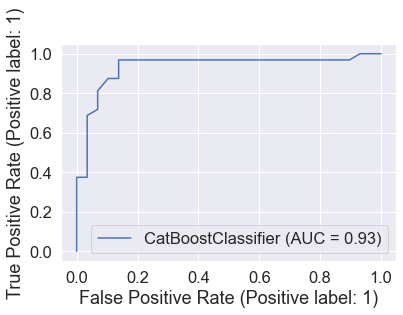

In [308]:
plot_roc_curve(cat_clf,X_test,y_test);

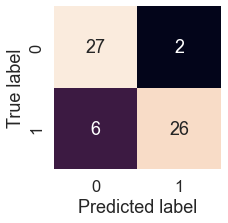

In [309]:
plot_conf_mat(y_test, y_preds)

In [310]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [311]:
#Check the best hyperparmeter
cat_clf.get_params()

{'iterations': 1000,
 'loss_function': 'Logloss',
 'depth': 4,
 'l2_leaf_reg': 1,
 'learning_rate': 0.5}

In [312]:
#create a new classifier with the best parameter
new_cat=CatBoostClassifier(iterations= 1000,
                           loss_function='Logloss',
                           depth= 4,
                           l2_leaf_reg= 1,
                           learning_rate= 0.5)

In [313]:
cv_acc_cat=cross_val_score(new_cat,X,y,cv=5,scoring='accuracy')
cv_acc_cat=np.mean(cv_acc_cat)
cv_acc_cat

0:	learn: 0.4768091	total: 631us	remaining: 631ms
1:	learn: 0.3763074	total: 1.37ms	remaining: 684ms
2:	learn: 0.3354179	total: 1.94ms	remaining: 645ms
3:	learn: 0.2956003	total: 2.54ms	remaining: 632ms
4:	learn: 0.2714011	total: 3.2ms	remaining: 636ms
5:	learn: 0.2583938	total: 3.86ms	remaining: 640ms
6:	learn: 0.2313945	total: 4.51ms	remaining: 640ms
7:	learn: 0.2223730	total: 5.08ms	remaining: 630ms
8:	learn: 0.2139415	total: 5.72ms	remaining: 630ms
9:	learn: 0.2096275	total: 6.33ms	remaining: 627ms
10:	learn: 0.1926713	total: 6.88ms	remaining: 618ms
11:	learn: 0.1848490	total: 7.42ms	remaining: 611ms
12:	learn: 0.1623972	total: 8.01ms	remaining: 608ms
13:	learn: 0.1481646	total: 8.56ms	remaining: 603ms
14:	learn: 0.1311208	total: 9.13ms	remaining: 599ms
15:	learn: 0.1169607	total: 9.68ms	remaining: 596ms
16:	learn: 0.1142570	total: 10.2ms	remaining: 591ms
17:	learn: 0.1086858	total: 10.8ms	remaining: 590ms
18:	learn: 0.1013699	total: 11.4ms	remaining: 587ms
19:	learn: 0.0971037	tot

356:	learn: 0.0024609	total: 178ms	remaining: 320ms
357:	learn: 0.0024609	total: 178ms	remaining: 320ms
358:	learn: 0.0024607	total: 179ms	remaining: 319ms
359:	learn: 0.0024596	total: 179ms	remaining: 318ms
360:	learn: 0.0024596	total: 180ms	remaining: 318ms
361:	learn: 0.0024595	total: 180ms	remaining: 317ms
362:	learn: 0.0024594	total: 181ms	remaining: 317ms
363:	learn: 0.0024593	total: 181ms	remaining: 316ms
364:	learn: 0.0024590	total: 182ms	remaining: 316ms
365:	learn: 0.0024589	total: 182ms	remaining: 315ms
366:	learn: 0.0024589	total: 182ms	remaining: 315ms
367:	learn: 0.0024589	total: 183ms	remaining: 314ms
368:	learn: 0.0024589	total: 183ms	remaining: 314ms
369:	learn: 0.0024588	total: 184ms	remaining: 313ms
370:	learn: 0.0024588	total: 184ms	remaining: 313ms
371:	learn: 0.0024587	total: 185ms	remaining: 312ms
372:	learn: 0.0024587	total: 185ms	remaining: 311ms
373:	learn: 0.0024587	total: 186ms	remaining: 311ms
374:	learn: 0.0024586	total: 186ms	remaining: 310ms
375:	learn: 

697:	learn: 0.0022689	total: 339ms	remaining: 147ms
698:	learn: 0.0022689	total: 340ms	remaining: 146ms
699:	learn: 0.0022689	total: 340ms	remaining: 146ms
700:	learn: 0.0022687	total: 341ms	remaining: 145ms
701:	learn: 0.0022687	total: 341ms	remaining: 145ms
702:	learn: 0.0022687	total: 342ms	remaining: 144ms
703:	learn: 0.0022687	total: 342ms	remaining: 144ms
704:	learn: 0.0022684	total: 343ms	remaining: 143ms
705:	learn: 0.0022683	total: 343ms	remaining: 143ms
706:	learn: 0.0022683	total: 344ms	remaining: 142ms
707:	learn: 0.0022683	total: 344ms	remaining: 142ms
708:	learn: 0.0022682	total: 345ms	remaining: 141ms
709:	learn: 0.0022681	total: 345ms	remaining: 141ms
710:	learn: 0.0022681	total: 346ms	remaining: 140ms
711:	learn: 0.0022680	total: 346ms	remaining: 140ms
712:	learn: 0.0022679	total: 347ms	remaining: 140ms
713:	learn: 0.0022666	total: 347ms	remaining: 139ms
714:	learn: 0.0022666	total: 348ms	remaining: 139ms
715:	learn: 0.0022666	total: 348ms	remaining: 138ms
716:	learn: 

9:	learn: 0.2123673	total: 5.64ms	remaining: 558ms
10:	learn: 0.1950475	total: 6.2ms	remaining: 557ms
11:	learn: 0.1791137	total: 6.73ms	remaining: 554ms
12:	learn: 0.1681799	total: 7.33ms	remaining: 556ms
13:	learn: 0.1548200	total: 7.87ms	remaining: 554ms
14:	learn: 0.1472851	total: 8.41ms	remaining: 553ms
15:	learn: 0.1371000	total: 8.93ms	remaining: 549ms
16:	learn: 0.1232860	total: 9.46ms	remaining: 547ms
17:	learn: 0.1140411	total: 9.98ms	remaining: 545ms
18:	learn: 0.1066926	total: 10.6ms	remaining: 545ms
19:	learn: 0.0983757	total: 11.2ms	remaining: 547ms
20:	learn: 0.0898148	total: 11.7ms	remaining: 546ms
21:	learn: 0.0825587	total: 12.2ms	remaining: 544ms
22:	learn: 0.0769262	total: 12.8ms	remaining: 544ms
23:	learn: 0.0691878	total: 13.3ms	remaining: 542ms
24:	learn: 0.0627229	total: 13.9ms	remaining: 542ms
25:	learn: 0.0572891	total: 14.5ms	remaining: 543ms
26:	learn: 0.0527435	total: 15.1ms	remaining: 543ms
27:	learn: 0.0496031	total: 15.6ms	remaining: 542ms
28:	learn: 0.0

382:	learn: 0.0031112	total: 180ms	remaining: 290ms
383:	learn: 0.0031112	total: 180ms	remaining: 289ms
384:	learn: 0.0031112	total: 181ms	remaining: 289ms
385:	learn: 0.0031109	total: 181ms	remaining: 289ms
386:	learn: 0.0031107	total: 182ms	remaining: 288ms
387:	learn: 0.0031102	total: 182ms	remaining: 288ms
388:	learn: 0.0031102	total: 183ms	remaining: 287ms
389:	learn: 0.0031101	total: 183ms	remaining: 287ms
390:	learn: 0.0031099	total: 184ms	remaining: 286ms
391:	learn: 0.0031098	total: 184ms	remaining: 286ms
392:	learn: 0.0031097	total: 185ms	remaining: 285ms
393:	learn: 0.0031097	total: 185ms	remaining: 285ms
394:	learn: 0.0031096	total: 186ms	remaining: 284ms
395:	learn: 0.0031096	total: 186ms	remaining: 284ms
396:	learn: 0.0031095	total: 186ms	remaining: 283ms
397:	learn: 0.0031095	total: 187ms	remaining: 283ms
398:	learn: 0.0031094	total: 187ms	remaining: 282ms
399:	learn: 0.0031093	total: 188ms	remaining: 282ms
400:	learn: 0.0031092	total: 188ms	remaining: 281ms
401:	learn: 

749:	learn: 0.0030699	total: 346ms	remaining: 115ms
750:	learn: 0.0030699	total: 347ms	remaining: 115ms
751:	learn: 0.0030698	total: 347ms	remaining: 114ms
752:	learn: 0.0030698	total: 348ms	remaining: 114ms
753:	learn: 0.0030698	total: 348ms	remaining: 114ms
754:	learn: 0.0030698	total: 349ms	remaining: 113ms
755:	learn: 0.0030697	total: 349ms	remaining: 113ms
756:	learn: 0.0030696	total: 349ms	remaining: 112ms
757:	learn: 0.0030695	total: 350ms	remaining: 112ms
758:	learn: 0.0030695	total: 350ms	remaining: 111ms
759:	learn: 0.0030695	total: 351ms	remaining: 111ms
760:	learn: 0.0030695	total: 351ms	remaining: 110ms
761:	learn: 0.0030695	total: 352ms	remaining: 110ms
762:	learn: 0.0030695	total: 352ms	remaining: 109ms
763:	learn: 0.0030694	total: 353ms	remaining: 109ms
764:	learn: 0.0030693	total: 353ms	remaining: 108ms
765:	learn: 0.0030693	total: 354ms	remaining: 108ms
766:	learn: 0.0030692	total: 354ms	remaining: 108ms
767:	learn: 0.0030692	total: 355ms	remaining: 107ms
768:	learn: 

40:	learn: 0.0229679	total: 22.3ms	remaining: 521ms
41:	learn: 0.0208096	total: 22.9ms	remaining: 522ms
42:	learn: 0.0187469	total: 23.4ms	remaining: 521ms
43:	learn: 0.0185469	total: 24ms	remaining: 521ms
44:	learn: 0.0174764	total: 24.5ms	remaining: 520ms
45:	learn: 0.0171519	total: 25.1ms	remaining: 520ms
46:	learn: 0.0169396	total: 25.5ms	remaining: 518ms
47:	learn: 0.0162854	total: 26.1ms	remaining: 517ms
48:	learn: 0.0154438	total: 26.6ms	remaining: 516ms
49:	learn: 0.0148042	total: 27.1ms	remaining: 515ms
50:	learn: 0.0141314	total: 27.6ms	remaining: 514ms
51:	learn: 0.0137376	total: 28.1ms	remaining: 513ms
52:	learn: 0.0132963	total: 28.7ms	remaining: 512ms
53:	learn: 0.0128728	total: 29.2ms	remaining: 511ms
54:	learn: 0.0127414	total: 29.7ms	remaining: 510ms
55:	learn: 0.0123855	total: 30.2ms	remaining: 509ms
56:	learn: 0.0121207	total: 30.7ms	remaining: 507ms
57:	learn: 0.0114389	total: 31.2ms	remaining: 506ms
58:	learn: 0.0110350	total: 31.8ms	remaining: 507ms
59:	learn: 0.0

417:	learn: 0.0023470	total: 200ms	remaining: 278ms
418:	learn: 0.0023470	total: 200ms	remaining: 278ms
419:	learn: 0.0023469	total: 201ms	remaining: 277ms
420:	learn: 0.0023468	total: 201ms	remaining: 277ms
421:	learn: 0.0023468	total: 202ms	remaining: 277ms
422:	learn: 0.0023468	total: 202ms	remaining: 276ms
423:	learn: 0.0023371	total: 203ms	remaining: 276ms
424:	learn: 0.0023370	total: 203ms	remaining: 275ms
425:	learn: 0.0023370	total: 204ms	remaining: 275ms
426:	learn: 0.0023370	total: 204ms	remaining: 274ms
427:	learn: 0.0023369	total: 205ms	remaining: 274ms
428:	learn: 0.0023363	total: 205ms	remaining: 273ms
429:	learn: 0.0023363	total: 206ms	remaining: 273ms
430:	learn: 0.0023361	total: 206ms	remaining: 272ms
431:	learn: 0.0023359	total: 207ms	remaining: 272ms
432:	learn: 0.0023359	total: 207ms	remaining: 271ms
433:	learn: 0.0023358	total: 208ms	remaining: 271ms
434:	learn: 0.0023357	total: 208ms	remaining: 270ms
435:	learn: 0.0023356	total: 208ms	remaining: 270ms
436:	learn: 

750:	learn: 0.0022438	total: 355ms	remaining: 118ms
751:	learn: 0.0022437	total: 356ms	remaining: 117ms
752:	learn: 0.0022437	total: 356ms	remaining: 117ms
753:	learn: 0.0022437	total: 357ms	remaining: 116ms
754:	learn: 0.0022435	total: 357ms	remaining: 116ms
755:	learn: 0.0022435	total: 358ms	remaining: 115ms
756:	learn: 0.0022435	total: 358ms	remaining: 115ms
757:	learn: 0.0022434	total: 358ms	remaining: 114ms
758:	learn: 0.0022434	total: 359ms	remaining: 114ms
759:	learn: 0.0022433	total: 359ms	remaining: 113ms
760:	learn: 0.0022433	total: 360ms	remaining: 113ms
761:	learn: 0.0022433	total: 360ms	remaining: 113ms
762:	learn: 0.0022432	total: 361ms	remaining: 112ms
763:	learn: 0.0022432	total: 361ms	remaining: 112ms
764:	learn: 0.0022431	total: 362ms	remaining: 111ms
765:	learn: 0.0022431	total: 362ms	remaining: 111ms
766:	learn: 0.0022431	total: 363ms	remaining: 110ms
767:	learn: 0.0022431	total: 363ms	remaining: 110ms
768:	learn: 0.0022431	total: 364ms	remaining: 109ms
769:	learn: 

62:	learn: 0.0079015	total: 32ms	remaining: 475ms
63:	learn: 0.0078214	total: 32.5ms	remaining: 476ms
64:	learn: 0.0072523	total: 33.1ms	remaining: 476ms
65:	learn: 0.0071246	total: 33.6ms	remaining: 475ms
66:	learn: 0.0068735	total: 34.1ms	remaining: 475ms
67:	learn: 0.0068040	total: 34.6ms	remaining: 474ms
68:	learn: 0.0067808	total: 35.1ms	remaining: 473ms
69:	learn: 0.0066432	total: 35.6ms	remaining: 472ms
70:	learn: 0.0065578	total: 36ms	remaining: 472ms
71:	learn: 0.0063437	total: 36.5ms	remaining: 471ms
72:	learn: 0.0060703	total: 37.1ms	remaining: 471ms
73:	learn: 0.0058302	total: 37.6ms	remaining: 470ms
74:	learn: 0.0056081	total: 38.1ms	remaining: 469ms
75:	learn: 0.0054367	total: 38.6ms	remaining: 469ms
76:	learn: 0.0053922	total: 39.1ms	remaining: 468ms
77:	learn: 0.0052368	total: 39.6ms	remaining: 468ms
78:	learn: 0.0051368	total: 40.1ms	remaining: 467ms
79:	learn: 0.0049744	total: 40.6ms	remaining: 466ms
80:	learn: 0.0048581	total: 41.1ms	remaining: 466ms
81:	learn: 0.004

414:	learn: 0.0026449	total: 194ms	remaining: 274ms
415:	learn: 0.0026448	total: 195ms	remaining: 273ms
416:	learn: 0.0026448	total: 195ms	remaining: 273ms
417:	learn: 0.0026448	total: 196ms	remaining: 273ms
418:	learn: 0.0026446	total: 196ms	remaining: 272ms
419:	learn: 0.0026445	total: 197ms	remaining: 272ms
420:	learn: 0.0026444	total: 197ms	remaining: 271ms
421:	learn: 0.0026444	total: 198ms	remaining: 271ms
422:	learn: 0.0026444	total: 198ms	remaining: 270ms
423:	learn: 0.0026443	total: 199ms	remaining: 270ms
424:	learn: 0.0026443	total: 199ms	remaining: 269ms
425:	learn: 0.0026443	total: 199ms	remaining: 269ms
426:	learn: 0.0026442	total: 200ms	remaining: 268ms
427:	learn: 0.0026442	total: 200ms	remaining: 268ms
428:	learn: 0.0026441	total: 201ms	remaining: 267ms
429:	learn: 0.0026441	total: 201ms	remaining: 267ms
430:	learn: 0.0026440	total: 202ms	remaining: 267ms
431:	learn: 0.0026438	total: 202ms	remaining: 266ms
432:	learn: 0.0026436	total: 203ms	remaining: 266ms
433:	learn: 

774:	learn: 0.0024063	total: 361ms	remaining: 105ms
775:	learn: 0.0024060	total: 361ms	remaining: 104ms
776:	learn: 0.0023987	total: 362ms	remaining: 104ms
777:	learn: 0.0023986	total: 363ms	remaining: 103ms
778:	learn: 0.0023986	total: 363ms	remaining: 103ms
779:	learn: 0.0023986	total: 363ms	remaining: 103ms
780:	learn: 0.0023986	total: 364ms	remaining: 102ms
781:	learn: 0.0023986	total: 364ms	remaining: 102ms
782:	learn: 0.0023986	total: 365ms	remaining: 101ms
783:	learn: 0.0023985	total: 365ms	remaining: 101ms
784:	learn: 0.0023985	total: 366ms	remaining: 100ms
785:	learn: 0.0023985	total: 366ms	remaining: 99.7ms
786:	learn: 0.0023983	total: 367ms	remaining: 99.2ms
787:	learn: 0.0023982	total: 367ms	remaining: 98.8ms
788:	learn: 0.0023980	total: 368ms	remaining: 98.3ms
789:	learn: 0.0023980	total: 368ms	remaining: 97.9ms
790:	learn: 0.0023979	total: 369ms	remaining: 97.4ms
791:	learn: 0.0023978	total: 369ms	remaining: 97ms
792:	learn: 0.0023978	total: 370ms	remaining: 96.5ms
793:	l

75:	learn: 0.0054965	total: 39.5ms	remaining: 480ms
76:	learn: 0.0053107	total: 40ms	remaining: 480ms
77:	learn: 0.0050266	total: 40.5ms	remaining: 479ms
78:	learn: 0.0049093	total: 41.1ms	remaining: 479ms
79:	learn: 0.0048266	total: 41.6ms	remaining: 478ms
80:	learn: 0.0046924	total: 42.1ms	remaining: 478ms
81:	learn: 0.0045713	total: 42.6ms	remaining: 477ms
82:	learn: 0.0044693	total: 43.1ms	remaining: 476ms
83:	learn: 0.0043495	total: 43.6ms	remaining: 475ms
84:	learn: 0.0041508	total: 44.1ms	remaining: 475ms
85:	learn: 0.0040642	total: 44.6ms	remaining: 474ms
86:	learn: 0.0039806	total: 45.1ms	remaining: 473ms
87:	learn: 0.0038765	total: 45.6ms	remaining: 472ms
88:	learn: 0.0038676	total: 46.1ms	remaining: 472ms
89:	learn: 0.0038657	total: 46.6ms	remaining: 471ms
90:	learn: 0.0037232	total: 47.1ms	remaining: 470ms
91:	learn: 0.0036653	total: 47.7ms	remaining: 471ms
92:	learn: 0.0036648	total: 48.2ms	remaining: 470ms
93:	learn: 0.0035468	total: 48.7ms	remaining: 469ms
94:	learn: 0.0

434:	learn: 0.0023637	total: 204ms	remaining: 265ms
435:	learn: 0.0023637	total: 204ms	remaining: 264ms
436:	learn: 0.0023636	total: 205ms	remaining: 264ms
437:	learn: 0.0023635	total: 205ms	remaining: 264ms
438:	learn: 0.0023632	total: 206ms	remaining: 263ms
439:	learn: 0.0023631	total: 206ms	remaining: 263ms
440:	learn: 0.0023631	total: 207ms	remaining: 262ms
441:	learn: 0.0023630	total: 207ms	remaining: 262ms
442:	learn: 0.0023630	total: 208ms	remaining: 261ms
443:	learn: 0.0023620	total: 208ms	remaining: 261ms
444:	learn: 0.0023619	total: 209ms	remaining: 260ms
445:	learn: 0.0023619	total: 209ms	remaining: 260ms
446:	learn: 0.0023617	total: 210ms	remaining: 259ms
447:	learn: 0.0023616	total: 210ms	remaining: 259ms
448:	learn: 0.0023616	total: 211ms	remaining: 258ms
449:	learn: 0.0023616	total: 211ms	remaining: 258ms
450:	learn: 0.0023616	total: 211ms	remaining: 257ms
451:	learn: 0.0023611	total: 212ms	remaining: 257ms
452:	learn: 0.0023611	total: 212ms	remaining: 256ms
453:	learn: 

798:	learn: 0.0021861	total: 370ms	remaining: 93.1ms
799:	learn: 0.0021859	total: 370ms	remaining: 92.6ms
800:	learn: 0.0021858	total: 371ms	remaining: 92.1ms
801:	learn: 0.0021856	total: 371ms	remaining: 91.7ms
802:	learn: 0.0021856	total: 372ms	remaining: 91.2ms
803:	learn: 0.0021856	total: 372ms	remaining: 90.8ms
804:	learn: 0.0021855	total: 373ms	remaining: 90.3ms
805:	learn: 0.0021853	total: 373ms	remaining: 89.8ms
806:	learn: 0.0021853	total: 374ms	remaining: 89.4ms
807:	learn: 0.0021853	total: 374ms	remaining: 88.9ms
808:	learn: 0.0021853	total: 375ms	remaining: 88.5ms
809:	learn: 0.0021851	total: 375ms	remaining: 88ms
810:	learn: 0.0021851	total: 376ms	remaining: 87.5ms
811:	learn: 0.0021849	total: 376ms	remaining: 87.1ms
812:	learn: 0.0021847	total: 377ms	remaining: 86.6ms
813:	learn: 0.0021846	total: 377ms	remaining: 86.1ms
814:	learn: 0.0021845	total: 377ms	remaining: 85.7ms
815:	learn: 0.0021842	total: 378ms	remaining: 85.2ms
816:	learn: 0.0021841	total: 378ms	remaining: 84

0.8083060109289617

In [315]:
cv_precision_cat=cross_val_score(new_cat,X,y,cv=5,scoring='precision')
cv_precision_cat=np.mean(cv_precision_cat)
cv_precision_cat

0:	learn: 0.4768091	total: 592us	remaining: 592ms
1:	learn: 0.3763074	total: 1.2ms	remaining: 601ms
2:	learn: 0.3354179	total: 1.7ms	remaining: 564ms
3:	learn: 0.2956003	total: 2.27ms	remaining: 566ms
4:	learn: 0.2714011	total: 2.86ms	remaining: 569ms
5:	learn: 0.2583938	total: 3.42ms	remaining: 567ms
6:	learn: 0.2313945	total: 4.04ms	remaining: 573ms
7:	learn: 0.2223730	total: 4.62ms	remaining: 573ms
8:	learn: 0.2139415	total: 5.17ms	remaining: 569ms
9:	learn: 0.2096275	total: 5.75ms	remaining: 569ms
10:	learn: 0.1926713	total: 6.3ms	remaining: 567ms
11:	learn: 0.1848490	total: 6.84ms	remaining: 563ms
12:	learn: 0.1623972	total: 7.59ms	remaining: 576ms
13:	learn: 0.1481646	total: 8.14ms	remaining: 573ms
14:	learn: 0.1311208	total: 8.69ms	remaining: 571ms
15:	learn: 0.1169607	total: 9.21ms	remaining: 567ms
16:	learn: 0.1142570	total: 9.78ms	remaining: 566ms
17:	learn: 0.1086858	total: 10.3ms	remaining: 564ms
18:	learn: 0.1013699	total: 11ms	remaining: 566ms
19:	learn: 0.0971037	total: 

324:	learn: 0.0024640	total: 164ms	remaining: 340ms
325:	learn: 0.0024640	total: 164ms	remaining: 340ms
326:	learn: 0.0024639	total: 165ms	remaining: 339ms
327:	learn: 0.0024638	total: 165ms	remaining: 339ms
328:	learn: 0.0024637	total: 166ms	remaining: 338ms
329:	learn: 0.0024637	total: 166ms	remaining: 337ms
330:	learn: 0.0024637	total: 167ms	remaining: 337ms
331:	learn: 0.0024636	total: 167ms	remaining: 336ms
332:	learn: 0.0024634	total: 168ms	remaining: 336ms
333:	learn: 0.0024634	total: 168ms	remaining: 335ms
334:	learn: 0.0024632	total: 169ms	remaining: 335ms
335:	learn: 0.0024632	total: 169ms	remaining: 334ms
336:	learn: 0.0024631	total: 170ms	remaining: 334ms
337:	learn: 0.0024631	total: 170ms	remaining: 333ms
338:	learn: 0.0024631	total: 171ms	remaining: 333ms
339:	learn: 0.0024631	total: 171ms	remaining: 332ms
340:	learn: 0.0024631	total: 171ms	remaining: 331ms
341:	learn: 0.0024631	total: 172ms	remaining: 331ms
342:	learn: 0.0024630	total: 172ms	remaining: 330ms
343:	learn: 

669:	learn: 0.0022707	total: 329ms	remaining: 162ms
670:	learn: 0.0022707	total: 330ms	remaining: 162ms
671:	learn: 0.0022705	total: 330ms	remaining: 161ms
672:	learn: 0.0022705	total: 331ms	remaining: 161ms
673:	learn: 0.0022705	total: 331ms	remaining: 160ms
674:	learn: 0.0022704	total: 332ms	remaining: 160ms
675:	learn: 0.0022704	total: 332ms	remaining: 159ms
676:	learn: 0.0022703	total: 333ms	remaining: 159ms
677:	learn: 0.0022703	total: 333ms	remaining: 158ms
678:	learn: 0.0022702	total: 334ms	remaining: 158ms
679:	learn: 0.0022702	total: 334ms	remaining: 157ms
680:	learn: 0.0022700	total: 335ms	remaining: 157ms
681:	learn: 0.0022700	total: 335ms	remaining: 156ms
682:	learn: 0.0022700	total: 336ms	remaining: 156ms
683:	learn: 0.0022700	total: 336ms	remaining: 155ms
684:	learn: 0.0022699	total: 337ms	remaining: 155ms
685:	learn: 0.0022699	total: 337ms	remaining: 154ms
686:	learn: 0.0022699	total: 338ms	remaining: 154ms
687:	learn: 0.0022698	total: 338ms	remaining: 153ms
688:	learn: 

1:	learn: 0.3922866	total: 1.59ms	remaining: 795ms
2:	learn: 0.3593952	total: 2.16ms	remaining: 719ms
3:	learn: 0.3301968	total: 2.72ms	remaining: 677ms
4:	learn: 0.3034697	total: 3.36ms	remaining: 670ms
5:	learn: 0.2779714	total: 4.08ms	remaining: 676ms
6:	learn: 0.2679253	total: 4.65ms	remaining: 659ms
7:	learn: 0.2537248	total: 5.17ms	remaining: 641ms
8:	learn: 0.2386008	total: 5.73ms	remaining: 631ms
9:	learn: 0.2123673	total: 6.29ms	remaining: 623ms
10:	learn: 0.1950475	total: 6.91ms	remaining: 621ms
11:	learn: 0.1791137	total: 7.43ms	remaining: 612ms
12:	learn: 0.1681799	total: 7.94ms	remaining: 603ms
13:	learn: 0.1548200	total: 8.44ms	remaining: 594ms
14:	learn: 0.1472851	total: 8.96ms	remaining: 588ms
15:	learn: 0.1371000	total: 9.49ms	remaining: 583ms
16:	learn: 0.1232860	total: 10ms	remaining: 581ms
17:	learn: 0.1140411	total: 10.6ms	remaining: 579ms
18:	learn: 0.1066926	total: 11.2ms	remaining: 577ms
19:	learn: 0.0983757	total: 11.7ms	remaining: 574ms
20:	learn: 0.0898148	to

338:	learn: 0.0033405	total: 162ms	remaining: 317ms
339:	learn: 0.0033405	total: 163ms	remaining: 316ms
340:	learn: 0.0033389	total: 163ms	remaining: 316ms
341:	learn: 0.0033389	total: 164ms	remaining: 315ms
342:	learn: 0.0033389	total: 164ms	remaining: 315ms
343:	learn: 0.0033387	total: 165ms	remaining: 314ms
344:	learn: 0.0033381	total: 165ms	remaining: 314ms
345:	learn: 0.0033380	total: 166ms	remaining: 313ms
346:	learn: 0.0033380	total: 166ms	remaining: 313ms
347:	learn: 0.0033378	total: 167ms	remaining: 312ms
348:	learn: 0.0033378	total: 167ms	remaining: 312ms
349:	learn: 0.0033378	total: 168ms	remaining: 311ms
350:	learn: 0.0033376	total: 168ms	remaining: 311ms
351:	learn: 0.0033376	total: 169ms	remaining: 310ms
352:	learn: 0.0033373	total: 169ms	remaining: 310ms
353:	learn: 0.0033356	total: 169ms	remaining: 309ms
354:	learn: 0.0033354	total: 170ms	remaining: 309ms
355:	learn: 0.0033354	total: 170ms	remaining: 308ms
356:	learn: 0.0033354	total: 171ms	remaining: 308ms
357:	learn: 

714:	learn: 0.0030730	total: 335ms	remaining: 133ms
715:	learn: 0.0030729	total: 335ms	remaining: 133ms
716:	learn: 0.0030729	total: 336ms	remaining: 132ms
717:	learn: 0.0030729	total: 336ms	remaining: 132ms
718:	learn: 0.0030728	total: 336ms	remaining: 132ms
719:	learn: 0.0030726	total: 337ms	remaining: 131ms
720:	learn: 0.0030723	total: 337ms	remaining: 131ms
721:	learn: 0.0030722	total: 338ms	remaining: 130ms
722:	learn: 0.0030722	total: 338ms	remaining: 130ms
723:	learn: 0.0030722	total: 339ms	remaining: 129ms
724:	learn: 0.0030720	total: 339ms	remaining: 129ms
725:	learn: 0.0030719	total: 340ms	remaining: 128ms
726:	learn: 0.0030719	total: 340ms	remaining: 128ms
727:	learn: 0.0030718	total: 341ms	remaining: 127ms
728:	learn: 0.0030718	total: 341ms	remaining: 127ms
729:	learn: 0.0030716	total: 342ms	remaining: 126ms
730:	learn: 0.0030715	total: 342ms	remaining: 126ms
731:	learn: 0.0030714	total: 343ms	remaining: 125ms
732:	learn: 0.0030714	total: 343ms	remaining: 125ms
733:	learn: 

10:	learn: 0.1595771	total: 7.3ms	remaining: 656ms
11:	learn: 0.1461222	total: 7.92ms	remaining: 652ms
12:	learn: 0.1321898	total: 8.51ms	remaining: 646ms
13:	learn: 0.1230082	total: 9.08ms	remaining: 640ms
14:	learn: 0.1178143	total: 9.68ms	remaining: 636ms
15:	learn: 0.1066893	total: 10.2ms	remaining: 629ms
16:	learn: 0.0993735	total: 10.8ms	remaining: 622ms
17:	learn: 0.0850723	total: 11.4ms	remaining: 623ms
18:	learn: 0.0761044	total: 12ms	remaining: 618ms
19:	learn: 0.0719710	total: 12.5ms	remaining: 612ms
20:	learn: 0.0665504	total: 13.1ms	remaining: 609ms
21:	learn: 0.0608450	total: 13.7ms	remaining: 611ms
22:	learn: 0.0589292	total: 14.3ms	remaining: 607ms
23:	learn: 0.0556580	total: 14.8ms	remaining: 603ms
24:	learn: 0.0514664	total: 15.4ms	remaining: 599ms
25:	learn: 0.0491352	total: 15.9ms	remaining: 595ms
26:	learn: 0.0444149	total: 16.4ms	remaining: 591ms
27:	learn: 0.0421018	total: 17ms	remaining: 591ms
28:	learn: 0.0378683	total: 17.6ms	remaining: 588ms
29:	learn: 0.0352

344:	learn: 0.0024319	total: 174ms	remaining: 330ms
345:	learn: 0.0024318	total: 174ms	remaining: 330ms
346:	learn: 0.0024317	total: 175ms	remaining: 329ms
347:	learn: 0.0024317	total: 175ms	remaining: 329ms
348:	learn: 0.0024317	total: 176ms	remaining: 328ms
349:	learn: 0.0024177	total: 176ms	remaining: 328ms
350:	learn: 0.0024177	total: 177ms	remaining: 327ms
351:	learn: 0.0024177	total: 177ms	remaining: 327ms
352:	learn: 0.0024047	total: 178ms	remaining: 326ms
353:	learn: 0.0024044	total: 178ms	remaining: 325ms
354:	learn: 0.0024043	total: 179ms	remaining: 325ms
355:	learn: 0.0024043	total: 179ms	remaining: 324ms
356:	learn: 0.0023842	total: 180ms	remaining: 324ms
357:	learn: 0.0023841	total: 180ms	remaining: 323ms
358:	learn: 0.0023839	total: 181ms	remaining: 323ms
359:	learn: 0.0023839	total: 181ms	remaining: 322ms
360:	learn: 0.0023838	total: 182ms	remaining: 322ms
361:	learn: 0.0023837	total: 182ms	remaining: 321ms
362:	learn: 0.0023837	total: 183ms	remaining: 321ms
363:	learn: 

726:	learn: 0.0022452	total: 352ms	remaining: 132ms
727:	learn: 0.0022452	total: 352ms	remaining: 132ms
728:	learn: 0.0022451	total: 353ms	remaining: 131ms
729:	learn: 0.0022451	total: 353ms	remaining: 131ms
730:	learn: 0.0022450	total: 354ms	remaining: 130ms
731:	learn: 0.0022450	total: 354ms	remaining: 130ms
732:	learn: 0.0022450	total: 355ms	remaining: 129ms
733:	learn: 0.0022450	total: 355ms	remaining: 129ms
734:	learn: 0.0022450	total: 356ms	remaining: 128ms
735:	learn: 0.0022450	total: 356ms	remaining: 128ms
736:	learn: 0.0022449	total: 357ms	remaining: 127ms
737:	learn: 0.0022449	total: 357ms	remaining: 127ms
738:	learn: 0.0022448	total: 358ms	remaining: 126ms
739:	learn: 0.0022448	total: 358ms	remaining: 126ms
740:	learn: 0.0022448	total: 358ms	remaining: 125ms
741:	learn: 0.0022448	total: 359ms	remaining: 125ms
742:	learn: 0.0022446	total: 359ms	remaining: 124ms
743:	learn: 0.0022441	total: 360ms	remaining: 124ms
744:	learn: 0.0022440	total: 360ms	remaining: 123ms
745:	learn: 

23:	learn: 0.0558530	total: 13.8ms	remaining: 561ms
24:	learn: 0.0481308	total: 14.4ms	remaining: 561ms
25:	learn: 0.0450326	total: 14.9ms	remaining: 558ms
26:	learn: 0.0432160	total: 15.5ms	remaining: 558ms
27:	learn: 0.0411466	total: 16ms	remaining: 556ms
28:	learn: 0.0391469	total: 16.6ms	remaining: 554ms
29:	learn: 0.0376298	total: 17.1ms	remaining: 553ms
30:	learn: 0.0359504	total: 17.6ms	remaining: 551ms
31:	learn: 0.0336849	total: 18.2ms	remaining: 549ms
32:	learn: 0.0309697	total: 18.7ms	remaining: 547ms
33:	learn: 0.0274542	total: 19.3ms	remaining: 547ms
34:	learn: 0.0252235	total: 19.8ms	remaining: 545ms
35:	learn: 0.0243680	total: 20.3ms	remaining: 544ms
36:	learn: 0.0236810	total: 20.8ms	remaining: 542ms
37:	learn: 0.0229682	total: 21.4ms	remaining: 542ms
38:	learn: 0.0211213	total: 22ms	remaining: 541ms
39:	learn: 0.0199255	total: 22.5ms	remaining: 540ms
40:	learn: 0.0192743	total: 23ms	remaining: 538ms
41:	learn: 0.0178882	total: 23.5ms	remaining: 537ms
42:	learn: 0.01726

365:	learn: 0.0027226	total: 177ms	remaining: 307ms
366:	learn: 0.0026961	total: 178ms	remaining: 307ms
367:	learn: 0.0026481	total: 178ms	remaining: 306ms
368:	learn: 0.0026480	total: 179ms	remaining: 306ms
369:	learn: 0.0026480	total: 179ms	remaining: 305ms
370:	learn: 0.0026480	total: 180ms	remaining: 305ms
371:	learn: 0.0026480	total: 180ms	remaining: 304ms
372:	learn: 0.0026479	total: 181ms	remaining: 304ms
373:	learn: 0.0026479	total: 181ms	remaining: 303ms
374:	learn: 0.0026479	total: 182ms	remaining: 303ms
375:	learn: 0.0026476	total: 182ms	remaining: 302ms
376:	learn: 0.0026476	total: 182ms	remaining: 302ms
377:	learn: 0.0026475	total: 183ms	remaining: 301ms
378:	learn: 0.0026472	total: 183ms	remaining: 301ms
379:	learn: 0.0026472	total: 184ms	remaining: 300ms
380:	learn: 0.0026471	total: 185ms	remaining: 300ms
381:	learn: 0.0026470	total: 185ms	remaining: 299ms
382:	learn: 0.0026470	total: 186ms	remaining: 299ms
383:	learn: 0.0026468	total: 186ms	remaining: 298ms
384:	learn: 

683:	learn: 0.0024245	total: 338ms	remaining: 156ms
684:	learn: 0.0024243	total: 339ms	remaining: 156ms
685:	learn: 0.0024242	total: 339ms	remaining: 155ms
686:	learn: 0.0024241	total: 340ms	remaining: 155ms
687:	learn: 0.0024241	total: 340ms	remaining: 154ms
688:	learn: 0.0024238	total: 341ms	remaining: 154ms
689:	learn: 0.0024236	total: 341ms	remaining: 153ms
690:	learn: 0.0024236	total: 341ms	remaining: 153ms
691:	learn: 0.0024235	total: 342ms	remaining: 152ms
692:	learn: 0.0024232	total: 343ms	remaining: 152ms
693:	learn: 0.0024231	total: 343ms	remaining: 151ms
694:	learn: 0.0024230	total: 344ms	remaining: 151ms
695:	learn: 0.0024228	total: 345ms	remaining: 151ms
696:	learn: 0.0024228	total: 345ms	remaining: 150ms
697:	learn: 0.0024224	total: 346ms	remaining: 150ms
698:	learn: 0.0024223	total: 346ms	remaining: 149ms
699:	learn: 0.0024223	total: 347ms	remaining: 149ms
700:	learn: 0.0024222	total: 347ms	remaining: 148ms
701:	learn: 0.0024221	total: 348ms	remaining: 148ms
702:	learn: 

989:	learn: 0.0023539	total: 502ms	remaining: 5.07ms
990:	learn: 0.0023538	total: 502ms	remaining: 4.56ms
991:	learn: 0.0023538	total: 503ms	remaining: 4.05ms
992:	learn: 0.0023537	total: 504ms	remaining: 3.55ms
993:	learn: 0.0023536	total: 504ms	remaining: 3.04ms
994:	learn: 0.0023536	total: 505ms	remaining: 2.54ms
995:	learn: 0.0023536	total: 505ms	remaining: 2.03ms
996:	learn: 0.0023445	total: 506ms	remaining: 1.52ms
997:	learn: 0.0023442	total: 506ms	remaining: 1.01ms
998:	learn: 0.0023442	total: 507ms	remaining: 507us
999:	learn: 0.0023441	total: 507ms	remaining: 0us
0:	learn: 0.4700953	total: 674us	remaining: 674ms
1:	learn: 0.3537493	total: 1.51ms	remaining: 753ms
2:	learn: 0.3201320	total: 2.12ms	remaining: 704ms
3:	learn: 0.2884374	total: 2.93ms	remaining: 729ms
4:	learn: 0.2639691	total: 3.69ms	remaining: 735ms
5:	learn: 0.2442025	total: 4.4ms	remaining: 730ms
6:	learn: 0.2329454	total: 5.04ms	remaining: 715ms
7:	learn: 0.2049625	total: 5.65ms	remaining: 701ms
8:	learn: 0.192

219:	learn: 0.0024855	total: 129ms	remaining: 457ms
220:	learn: 0.0024853	total: 129ms	remaining: 456ms
221:	learn: 0.0024853	total: 130ms	remaining: 456ms
222:	learn: 0.0024850	total: 130ms	remaining: 455ms
223:	learn: 0.0024850	total: 131ms	remaining: 454ms
224:	learn: 0.0024850	total: 132ms	remaining: 455ms
225:	learn: 0.0024850	total: 133ms	remaining: 455ms
226:	learn: 0.0024850	total: 133ms	remaining: 454ms
227:	learn: 0.0024849	total: 134ms	remaining: 453ms
228:	learn: 0.0024848	total: 134ms	remaining: 452ms
229:	learn: 0.0024846	total: 135ms	remaining: 451ms
230:	learn: 0.0024844	total: 135ms	remaining: 450ms
231:	learn: 0.0024844	total: 136ms	remaining: 449ms
232:	learn: 0.0024844	total: 136ms	remaining: 449ms
233:	learn: 0.0024843	total: 137ms	remaining: 448ms
234:	learn: 0.0024843	total: 137ms	remaining: 447ms
235:	learn: 0.0024843	total: 138ms	remaining: 446ms
236:	learn: 0.0024843	total: 138ms	remaining: 445ms
237:	learn: 0.0024843	total: 139ms	remaining: 444ms
238:	learn: 

514:	learn: 0.0023431	total: 292ms	remaining: 275ms
515:	learn: 0.0023430	total: 293ms	remaining: 275ms
516:	learn: 0.0023430	total: 293ms	remaining: 274ms
517:	learn: 0.0023430	total: 294ms	remaining: 273ms
518:	learn: 0.0023430	total: 294ms	remaining: 273ms
519:	learn: 0.0023429	total: 295ms	remaining: 272ms
520:	learn: 0.0023429	total: 295ms	remaining: 271ms
521:	learn: 0.0023428	total: 296ms	remaining: 271ms
522:	learn: 0.0023428	total: 296ms	remaining: 270ms
523:	learn: 0.0023427	total: 297ms	remaining: 270ms
524:	learn: 0.0023425	total: 297ms	remaining: 269ms
525:	learn: 0.0023424	total: 298ms	remaining: 269ms
526:	learn: 0.0023287	total: 298ms	remaining: 268ms
527:	learn: 0.0023284	total: 299ms	remaining: 267ms
528:	learn: 0.0023283	total: 299ms	remaining: 267ms
529:	learn: 0.0023283	total: 300ms	remaining: 266ms
530:	learn: 0.0023283	total: 300ms	remaining: 265ms
531:	learn: 0.0023283	total: 301ms	remaining: 265ms
532:	learn: 0.0023283	total: 302ms	remaining: 264ms
533:	learn: 

827:	learn: 0.0021825	total: 458ms	remaining: 95.2ms
828:	learn: 0.0021824	total: 459ms	remaining: 94.7ms
829:	learn: 0.0021823	total: 460ms	remaining: 94.2ms
830:	learn: 0.0021823	total: 460ms	remaining: 93.6ms
831:	learn: 0.0021822	total: 461ms	remaining: 93ms
832:	learn: 0.0021822	total: 461ms	remaining: 92.5ms
833:	learn: 0.0021822	total: 462ms	remaining: 91.9ms
834:	learn: 0.0021821	total: 462ms	remaining: 91.3ms
835:	learn: 0.0021821	total: 463ms	remaining: 90.8ms
836:	learn: 0.0021820	total: 463ms	remaining: 90.2ms
837:	learn: 0.0021820	total: 464ms	remaining: 89.7ms
838:	learn: 0.0021820	total: 464ms	remaining: 89.1ms
839:	learn: 0.0021819	total: 465ms	remaining: 88.5ms
840:	learn: 0.0021818	total: 465ms	remaining: 88ms
841:	learn: 0.0021816	total: 466ms	remaining: 87.4ms
842:	learn: 0.0021815	total: 466ms	remaining: 86.9ms
843:	learn: 0.0021815	total: 467ms	remaining: 86.3ms
844:	learn: 0.0021814	total: 467ms	remaining: 85.7ms
845:	learn: 0.0021814	total: 468ms	remaining: 85.2

0.8185501518093288

In [316]:
cv_recall_cat=cross_val_score(new_cat,X,y,cv=5,scoring='recall')
cv_recall_cat=np.mean(cv_recall_cat)
cv_recall_cat

0:	learn: 0.4768091	total: 562us	remaining: 562ms
1:	learn: 0.3763074	total: 1.26ms	remaining: 631ms
2:	learn: 0.3354179	total: 1.7ms	remaining: 566ms
3:	learn: 0.2956003	total: 2.25ms	remaining: 561ms
4:	learn: 0.2714011	total: 2.8ms	remaining: 557ms
5:	learn: 0.2583938	total: 3.32ms	remaining: 550ms
6:	learn: 0.2313945	total: 3.84ms	remaining: 545ms
7:	learn: 0.2223730	total: 4.36ms	remaining: 540ms
8:	learn: 0.2139415	total: 4.91ms	remaining: 540ms
9:	learn: 0.2096275	total: 5.47ms	remaining: 541ms
10:	learn: 0.1926713	total: 6.03ms	remaining: 542ms
11:	learn: 0.1848490	total: 6.56ms	remaining: 540ms
12:	learn: 0.1623972	total: 7.07ms	remaining: 536ms
13:	learn: 0.1481646	total: 7.57ms	remaining: 533ms
14:	learn: 0.1311208	total: 8.08ms	remaining: 530ms
15:	learn: 0.1169607	total: 8.58ms	remaining: 528ms
16:	learn: 0.1142570	total: 9.15ms	remaining: 529ms
17:	learn: 0.1086858	total: 9.66ms	remaining: 527ms
18:	learn: 0.1013699	total: 10.2ms	remaining: 527ms
19:	learn: 0.0971037	tota

311:	learn: 0.0025373	total: 161ms	remaining: 355ms
312:	learn: 0.0025108	total: 161ms	remaining: 354ms
313:	learn: 0.0024648	total: 162ms	remaining: 354ms
314:	learn: 0.0024647	total: 162ms	remaining: 353ms
315:	learn: 0.0024646	total: 163ms	remaining: 353ms
316:	learn: 0.0024646	total: 163ms	remaining: 352ms
317:	learn: 0.0024646	total: 164ms	remaining: 352ms
318:	learn: 0.0024646	total: 164ms	remaining: 351ms
319:	learn: 0.0024645	total: 165ms	remaining: 351ms
320:	learn: 0.0024644	total: 165ms	remaining: 350ms
321:	learn: 0.0024644	total: 166ms	remaining: 349ms
322:	learn: 0.0024643	total: 167ms	remaining: 349ms
323:	learn: 0.0024642	total: 167ms	remaining: 349ms
324:	learn: 0.0024640	total: 168ms	remaining: 348ms
325:	learn: 0.0024640	total: 168ms	remaining: 348ms
326:	learn: 0.0024639	total: 169ms	remaining: 347ms
327:	learn: 0.0024638	total: 169ms	remaining: 347ms
328:	learn: 0.0024637	total: 170ms	remaining: 346ms
329:	learn: 0.0024637	total: 170ms	remaining: 345ms
330:	learn: 

666:	learn: 0.0022709	total: 332ms	remaining: 166ms
667:	learn: 0.0022709	total: 332ms	remaining: 165ms
668:	learn: 0.0022709	total: 333ms	remaining: 165ms
669:	learn: 0.0022707	total: 333ms	remaining: 164ms
670:	learn: 0.0022707	total: 334ms	remaining: 164ms
671:	learn: 0.0022705	total: 334ms	remaining: 163ms
672:	learn: 0.0022705	total: 335ms	remaining: 163ms
673:	learn: 0.0022705	total: 335ms	remaining: 162ms
674:	learn: 0.0022704	total: 335ms	remaining: 162ms
675:	learn: 0.0022704	total: 336ms	remaining: 161ms
676:	learn: 0.0022703	total: 336ms	remaining: 160ms
677:	learn: 0.0022703	total: 337ms	remaining: 160ms
678:	learn: 0.0022702	total: 337ms	remaining: 159ms
679:	learn: 0.0022702	total: 338ms	remaining: 159ms
680:	learn: 0.0022700	total: 338ms	remaining: 159ms
681:	learn: 0.0022700	total: 339ms	remaining: 158ms
682:	learn: 0.0022700	total: 339ms	remaining: 158ms
683:	learn: 0.0022700	total: 340ms	remaining: 157ms
684:	learn: 0.0022699	total: 340ms	remaining: 157ms
685:	learn: 

1:	learn: 0.3922866	total: 1.58ms	remaining: 791ms
2:	learn: 0.3593952	total: 2.1ms	remaining: 697ms
3:	learn: 0.3301968	total: 2.64ms	remaining: 656ms
4:	learn: 0.3034697	total: 3.36ms	remaining: 668ms
5:	learn: 0.2779714	total: 3.94ms	remaining: 652ms
6:	learn: 0.2679253	total: 4.48ms	remaining: 635ms
7:	learn: 0.2537248	total: 5.03ms	remaining: 624ms
8:	learn: 0.2386008	total: 5.57ms	remaining: 613ms
9:	learn: 0.2123673	total: 6.1ms	remaining: 604ms
10:	learn: 0.1950475	total: 6.65ms	remaining: 598ms
11:	learn: 0.1791137	total: 7.16ms	remaining: 590ms
12:	learn: 0.1681799	total: 7.67ms	remaining: 582ms
13:	learn: 0.1548200	total: 8.14ms	remaining: 574ms
14:	learn: 0.1472851	total: 8.75ms	remaining: 575ms
15:	learn: 0.1371000	total: 9.27ms	remaining: 570ms
16:	learn: 0.1232860	total: 9.84ms	remaining: 569ms
17:	learn: 0.1140411	total: 10.4ms	remaining: 568ms
18:	learn: 0.1066926	total: 10.9ms	remaining: 564ms
19:	learn: 0.0983757	total: 11.5ms	remaining: 562ms
20:	learn: 0.0898148	to

330:	learn: 0.0035350	total: 157ms	remaining: 318ms
331:	learn: 0.0035348	total: 158ms	remaining: 317ms
332:	learn: 0.0035348	total: 158ms	remaining: 317ms
333:	learn: 0.0035032	total: 159ms	remaining: 317ms
334:	learn: 0.0034399	total: 159ms	remaining: 316ms
335:	learn: 0.0033420	total: 160ms	remaining: 316ms
336:	learn: 0.0033418	total: 160ms	remaining: 315ms
337:	learn: 0.0033417	total: 161ms	remaining: 315ms
338:	learn: 0.0033405	total: 161ms	remaining: 315ms
339:	learn: 0.0033405	total: 162ms	remaining: 314ms
340:	learn: 0.0033389	total: 162ms	remaining: 314ms
341:	learn: 0.0033389	total: 163ms	remaining: 313ms
342:	learn: 0.0033389	total: 163ms	remaining: 313ms
343:	learn: 0.0033387	total: 164ms	remaining: 312ms
344:	learn: 0.0033381	total: 164ms	remaining: 312ms
345:	learn: 0.0033380	total: 165ms	remaining: 311ms
346:	learn: 0.0033380	total: 165ms	remaining: 311ms
347:	learn: 0.0033378	total: 166ms	remaining: 310ms
348:	learn: 0.0033378	total: 166ms	remaining: 310ms
349:	learn: 

705:	learn: 0.0030733	total: 330ms	remaining: 138ms
706:	learn: 0.0030733	total: 331ms	remaining: 137ms
707:	learn: 0.0030732	total: 331ms	remaining: 137ms
708:	learn: 0.0030732	total: 332ms	remaining: 136ms
709:	learn: 0.0030731	total: 332ms	remaining: 136ms
710:	learn: 0.0030731	total: 333ms	remaining: 135ms
711:	learn: 0.0030731	total: 333ms	remaining: 135ms
712:	learn: 0.0030730	total: 334ms	remaining: 134ms
713:	learn: 0.0030730	total: 334ms	remaining: 134ms
714:	learn: 0.0030730	total: 334ms	remaining: 133ms
715:	learn: 0.0030729	total: 335ms	remaining: 133ms
716:	learn: 0.0030729	total: 335ms	remaining: 132ms
717:	learn: 0.0030729	total: 336ms	remaining: 132ms
718:	learn: 0.0030728	total: 336ms	remaining: 131ms
719:	learn: 0.0030726	total: 337ms	remaining: 131ms
720:	learn: 0.0030723	total: 337ms	remaining: 131ms
721:	learn: 0.0030722	total: 338ms	remaining: 130ms
722:	learn: 0.0030722	total: 338ms	remaining: 130ms
723:	learn: 0.0030722	total: 339ms	remaining: 129ms
724:	learn: 

1:	learn: 0.3690089	total: 1.41ms	remaining: 701ms
2:	learn: 0.3136828	total: 2.02ms	remaining: 673ms
3:	learn: 0.2867712	total: 2.59ms	remaining: 646ms
4:	learn: 0.2656808	total: 3.13ms	remaining: 623ms
5:	learn: 0.2501481	total: 3.68ms	remaining: 610ms
6:	learn: 0.2230679	total: 4.19ms	remaining: 595ms
7:	learn: 0.2186568	total: 4.72ms	remaining: 585ms
8:	learn: 0.1983305	total: 5.24ms	remaining: 577ms
9:	learn: 0.1764643	total: 5.75ms	remaining: 569ms
10:	learn: 0.1595771	total: 6.26ms	remaining: 563ms
11:	learn: 0.1461222	total: 6.75ms	remaining: 556ms
12:	learn: 0.1321898	total: 7.26ms	remaining: 551ms
13:	learn: 0.1230082	total: 7.78ms	remaining: 548ms
14:	learn: 0.1178143	total: 8.43ms	remaining: 554ms
15:	learn: 0.1066893	total: 8.99ms	remaining: 553ms
16:	learn: 0.0993735	total: 9.52ms	remaining: 551ms
17:	learn: 0.0850723	total: 10.1ms	remaining: 548ms
18:	learn: 0.0761044	total: 10.6ms	remaining: 546ms
19:	learn: 0.0719710	total: 11.1ms	remaining: 545ms
20:	learn: 0.0665504	

300:	learn: 0.0024593	total: 160ms	remaining: 373ms
301:	learn: 0.0024592	total: 161ms	remaining: 372ms
302:	learn: 0.0024590	total: 162ms	remaining: 372ms
303:	learn: 0.0024590	total: 162ms	remaining: 371ms
304:	learn: 0.0024590	total: 163ms	remaining: 371ms
305:	learn: 0.0024487	total: 163ms	remaining: 370ms
306:	learn: 0.0024486	total: 164ms	remaining: 369ms
307:	learn: 0.0024486	total: 164ms	remaining: 369ms
308:	learn: 0.0024483	total: 165ms	remaining: 368ms
309:	learn: 0.0024483	total: 165ms	remaining: 368ms
310:	learn: 0.0024483	total: 166ms	remaining: 367ms
311:	learn: 0.0024482	total: 166ms	remaining: 367ms
312:	learn: 0.0024481	total: 167ms	remaining: 366ms
313:	learn: 0.0024481	total: 167ms	remaining: 365ms
314:	learn: 0.0024481	total: 168ms	remaining: 365ms
315:	learn: 0.0024480	total: 168ms	remaining: 364ms
316:	learn: 0.0024480	total: 169ms	remaining: 364ms
317:	learn: 0.0024479	total: 169ms	remaining: 363ms
318:	learn: 0.0024479	total: 170ms	remaining: 362ms
319:	learn: 

644:	learn: 0.0022515	total: 327ms	remaining: 180ms
645:	learn: 0.0022513	total: 327ms	remaining: 179ms
646:	learn: 0.0022512	total: 328ms	remaining: 179ms
647:	learn: 0.0022512	total: 328ms	remaining: 178ms
648:	learn: 0.0022511	total: 329ms	remaining: 178ms
649:	learn: 0.0022511	total: 329ms	remaining: 177ms
650:	learn: 0.0022509	total: 329ms	remaining: 177ms
651:	learn: 0.0022509	total: 330ms	remaining: 176ms
652:	learn: 0.0022509	total: 330ms	remaining: 176ms
653:	learn: 0.0022508	total: 331ms	remaining: 175ms
654:	learn: 0.0022508	total: 331ms	remaining: 175ms
655:	learn: 0.0022508	total: 332ms	remaining: 174ms
656:	learn: 0.0022507	total: 332ms	remaining: 174ms
657:	learn: 0.0022506	total: 333ms	remaining: 173ms
658:	learn: 0.0022506	total: 333ms	remaining: 172ms
659:	learn: 0.0022505	total: 334ms	remaining: 172ms
660:	learn: 0.0022505	total: 334ms	remaining: 171ms
661:	learn: 0.0022505	total: 335ms	remaining: 171ms
662:	learn: 0.0022504	total: 335ms	remaining: 170ms
663:	learn: 

996:	learn: 0.0021242	total: 492ms	remaining: 1.48ms
997:	learn: 0.0021241	total: 493ms	remaining: 987us
998:	learn: 0.0021241	total: 493ms	remaining: 493us
999:	learn: 0.0021241	total: 494ms	remaining: 0us
0:	learn: 0.4322348	total: 688us	remaining: 688ms
1:	learn: 0.3704588	total: 1.28ms	remaining: 641ms
2:	learn: 0.3296149	total: 1.82ms	remaining: 605ms
3:	learn: 0.3014769	total: 2.39ms	remaining: 595ms
4:	learn: 0.2770666	total: 2.91ms	remaining: 580ms
5:	learn: 0.2453983	total: 3.44ms	remaining: 571ms
6:	learn: 0.2298881	total: 3.99ms	remaining: 567ms
7:	learn: 0.2143224	total: 4.58ms	remaining: 568ms
8:	learn: 0.2006915	total: 5.08ms	remaining: 560ms
9:	learn: 0.1902399	total: 5.66ms	remaining: 560ms
10:	learn: 0.1697635	total: 6.16ms	remaining: 554ms
11:	learn: 0.1551804	total: 6.71ms	remaining: 552ms
12:	learn: 0.1428055	total: 7.23ms	remaining: 549ms
13:	learn: 0.1308668	total: 7.78ms	remaining: 548ms
14:	learn: 0.1190880	total: 8.28ms	remaining: 544ms
15:	learn: 0.1143192	tot

309:	learn: 0.0027638	total: 146ms	remaining: 325ms
310:	learn: 0.0027638	total: 147ms	remaining: 325ms
311:	learn: 0.0027638	total: 147ms	remaining: 325ms
312:	learn: 0.0027638	total: 148ms	remaining: 324ms
313:	learn: 0.0027637	total: 148ms	remaining: 324ms
314:	learn: 0.0027631	total: 149ms	remaining: 323ms
315:	learn: 0.0027630	total: 149ms	remaining: 323ms
316:	learn: 0.0027627	total: 150ms	remaining: 322ms
317:	learn: 0.0027622	total: 150ms	remaining: 322ms
318:	learn: 0.0027622	total: 150ms	remaining: 321ms
319:	learn: 0.0027622	total: 151ms	remaining: 321ms
320:	learn: 0.0027622	total: 151ms	remaining: 320ms
321:	learn: 0.0027621	total: 152ms	remaining: 320ms
322:	learn: 0.0027620	total: 152ms	remaining: 319ms
323:	learn: 0.0027620	total: 153ms	remaining: 319ms
324:	learn: 0.0027619	total: 153ms	remaining: 318ms
325:	learn: 0.0027619	total: 154ms	remaining: 318ms
326:	learn: 0.0027615	total: 154ms	remaining: 318ms
327:	learn: 0.0027614	total: 155ms	remaining: 317ms
328:	learn: 

626:	learn: 0.0024464	total: 306ms	remaining: 182ms
627:	learn: 0.0024463	total: 307ms	remaining: 182ms
628:	learn: 0.0024463	total: 308ms	remaining: 181ms
629:	learn: 0.0024462	total: 308ms	remaining: 181ms
630:	learn: 0.0024462	total: 309ms	remaining: 181ms
631:	learn: 0.0024461	total: 309ms	remaining: 180ms
632:	learn: 0.0024461	total: 310ms	remaining: 180ms
633:	learn: 0.0024460	total: 310ms	remaining: 179ms
634:	learn: 0.0024460	total: 311ms	remaining: 179ms
635:	learn: 0.0024459	total: 311ms	remaining: 178ms
636:	learn: 0.0024458	total: 312ms	remaining: 178ms
637:	learn: 0.0024457	total: 312ms	remaining: 177ms
638:	learn: 0.0024456	total: 313ms	remaining: 177ms
639:	learn: 0.0024455	total: 313ms	remaining: 176ms
640:	learn: 0.0024454	total: 314ms	remaining: 176ms
641:	learn: 0.0024452	total: 314ms	remaining: 175ms
642:	learn: 0.0024452	total: 315ms	remaining: 175ms
643:	learn: 0.0024451	total: 315ms	remaining: 174ms
644:	learn: 0.0024450	total: 316ms	remaining: 174ms
645:	learn: 

944:	learn: 0.0023589	total: 471ms	remaining: 27.4ms
945:	learn: 0.0023583	total: 472ms	remaining: 26.9ms
946:	learn: 0.0023583	total: 472ms	remaining: 26.4ms
947:	learn: 0.0023583	total: 473ms	remaining: 25.9ms
948:	learn: 0.0023582	total: 474ms	remaining: 25.4ms
949:	learn: 0.0023581	total: 474ms	remaining: 25ms
950:	learn: 0.0023581	total: 475ms	remaining: 24.5ms
951:	learn: 0.0023580	total: 475ms	remaining: 24ms
952:	learn: 0.0023580	total: 476ms	remaining: 23.5ms
953:	learn: 0.0023580	total: 476ms	remaining: 23ms
954:	learn: 0.0023580	total: 477ms	remaining: 22.5ms
955:	learn: 0.0023579	total: 477ms	remaining: 22ms
956:	learn: 0.0023577	total: 478ms	remaining: 21.5ms
957:	learn: 0.0023576	total: 478ms	remaining: 21ms
958:	learn: 0.0023566	total: 479ms	remaining: 20.5ms
959:	learn: 0.0023566	total: 479ms	remaining: 20ms
960:	learn: 0.0023566	total: 480ms	remaining: 19.5ms
961:	learn: 0.0023565	total: 480ms	remaining: 19ms
962:	learn: 0.0023564	total: 481ms	remaining: 18.5ms
963:	le

170:	learn: 0.0025031	total: 111ms	remaining: 536ms
171:	learn: 0.0025029	total: 111ms	remaining: 535ms
172:	learn: 0.0025027	total: 112ms	remaining: 534ms
173:	learn: 0.0025016	total: 112ms	remaining: 533ms
174:	learn: 0.0025016	total: 113ms	remaining: 532ms
175:	learn: 0.0025015	total: 113ms	remaining: 530ms
176:	learn: 0.0025014	total: 114ms	remaining: 529ms
177:	learn: 0.0025014	total: 114ms	remaining: 528ms
178:	learn: 0.0025014	total: 115ms	remaining: 527ms
179:	learn: 0.0025011	total: 115ms	remaining: 525ms
180:	learn: 0.0025011	total: 116ms	remaining: 524ms
181:	learn: 0.0024979	total: 116ms	remaining: 523ms
182:	learn: 0.0024979	total: 117ms	remaining: 522ms
183:	learn: 0.0024977	total: 118ms	remaining: 522ms
184:	learn: 0.0024977	total: 118ms	remaining: 521ms
185:	learn: 0.0024976	total: 119ms	remaining: 519ms
186:	learn: 0.0024975	total: 119ms	remaining: 518ms
187:	learn: 0.0024975	total: 120ms	remaining: 517ms
188:	learn: 0.0024973	total: 120ms	remaining: 515ms
189:	learn: 

476:	learn: 0.0023583	total: 274ms	remaining: 301ms
477:	learn: 0.0023583	total: 275ms	remaining: 300ms
478:	learn: 0.0023581	total: 276ms	remaining: 300ms
479:	learn: 0.0023581	total: 276ms	remaining: 299ms
480:	learn: 0.0023581	total: 277ms	remaining: 299ms
481:	learn: 0.0023580	total: 277ms	remaining: 298ms
482:	learn: 0.0023580	total: 278ms	remaining: 297ms
483:	learn: 0.0023579	total: 278ms	remaining: 297ms
484:	learn: 0.0023577	total: 279ms	remaining: 296ms
485:	learn: 0.0023576	total: 279ms	remaining: 295ms
486:	learn: 0.0023576	total: 280ms	remaining: 295ms
487:	learn: 0.0023464	total: 281ms	remaining: 294ms
488:	learn: 0.0023463	total: 281ms	remaining: 294ms
489:	learn: 0.0023463	total: 282ms	remaining: 293ms
490:	learn: 0.0023463	total: 282ms	remaining: 293ms
491:	learn: 0.0023463	total: 283ms	remaining: 292ms
492:	learn: 0.0023463	total: 283ms	remaining: 291ms
493:	learn: 0.0023462	total: 284ms	remaining: 291ms
494:	learn: 0.0023462	total: 284ms	remaining: 290ms
495:	learn: 

786:	learn: 0.0021867	total: 439ms	remaining: 119ms
787:	learn: 0.0021864	total: 439ms	remaining: 118ms
788:	learn: 0.0021864	total: 440ms	remaining: 118ms
789:	learn: 0.0021863	total: 440ms	remaining: 117ms
790:	learn: 0.0021862	total: 441ms	remaining: 117ms
791:	learn: 0.0021862	total: 442ms	remaining: 116ms
792:	learn: 0.0021862	total: 442ms	remaining: 115ms
793:	learn: 0.0021862	total: 443ms	remaining: 115ms
794:	learn: 0.0021862	total: 443ms	remaining: 114ms
795:	learn: 0.0021862	total: 444ms	remaining: 114ms
796:	learn: 0.0021862	total: 444ms	remaining: 113ms
797:	learn: 0.0021861	total: 445ms	remaining: 113ms
798:	learn: 0.0021861	total: 445ms	remaining: 112ms
799:	learn: 0.0021859	total: 446ms	remaining: 111ms
800:	learn: 0.0021858	total: 446ms	remaining: 111ms
801:	learn: 0.0021856	total: 447ms	remaining: 110ms
802:	learn: 0.0021856	total: 447ms	remaining: 110ms
803:	learn: 0.0021856	total: 447ms	remaining: 109ms
804:	learn: 0.0021855	total: 448ms	remaining: 109ms
805:	learn: 

0.8424242424242424

In [317]:
cv_f1_cat=cross_val_score(new_cat,X,y,cv=5,scoring='f1')
cv_f1_cat=np.mean(cv_f1_cat)
cv_f1_cat

0:	learn: 0.4768091	total: 609us	remaining: 609ms
1:	learn: 0.3763074	total: 1.35ms	remaining: 675ms
2:	learn: 0.3354179	total: 1.87ms	remaining: 621ms
3:	learn: 0.2956003	total: 2.69ms	remaining: 669ms
4:	learn: 0.2714011	total: 3.37ms	remaining: 670ms
5:	learn: 0.2583938	total: 3.9ms	remaining: 646ms
6:	learn: 0.2313945	total: 4.54ms	remaining: 645ms
7:	learn: 0.2223730	total: 5.26ms	remaining: 653ms
8:	learn: 0.2139415	total: 5.79ms	remaining: 638ms
9:	learn: 0.2096275	total: 6.31ms	remaining: 625ms
10:	learn: 0.1926713	total: 6.8ms	remaining: 611ms
11:	learn: 0.1848490	total: 7.29ms	remaining: 601ms
12:	learn: 0.1623972	total: 7.81ms	remaining: 593ms
13:	learn: 0.1481646	total: 8.33ms	remaining: 587ms
14:	learn: 0.1311208	total: 8.82ms	remaining: 579ms
15:	learn: 0.1169607	total: 9.3ms	remaining: 572ms
16:	learn: 0.1142570	total: 9.83ms	remaining: 568ms
17:	learn: 0.1086858	total: 10.3ms	remaining: 563ms
18:	learn: 0.1013699	total: 10.8ms	remaining: 559ms
19:	learn: 0.0971037	total

364:	learn: 0.0024590	total: 174ms	remaining: 302ms
365:	learn: 0.0024589	total: 174ms	remaining: 302ms
366:	learn: 0.0024589	total: 175ms	remaining: 302ms
367:	learn: 0.0024589	total: 175ms	remaining: 301ms
368:	learn: 0.0024589	total: 176ms	remaining: 301ms
369:	learn: 0.0024588	total: 176ms	remaining: 300ms
370:	learn: 0.0024588	total: 177ms	remaining: 300ms
371:	learn: 0.0024587	total: 177ms	remaining: 299ms
372:	learn: 0.0024587	total: 178ms	remaining: 299ms
373:	learn: 0.0024587	total: 178ms	remaining: 298ms
374:	learn: 0.0024586	total: 179ms	remaining: 298ms
375:	learn: 0.0024569	total: 179ms	remaining: 297ms
376:	learn: 0.0024566	total: 180ms	remaining: 297ms
377:	learn: 0.0024566	total: 180ms	remaining: 296ms
378:	learn: 0.0024565	total: 181ms	remaining: 296ms
379:	learn: 0.0024564	total: 181ms	remaining: 295ms
380:	learn: 0.0024564	total: 182ms	remaining: 295ms
381:	learn: 0.0024564	total: 182ms	remaining: 295ms
382:	learn: 0.0024563	total: 183ms	remaining: 294ms
383:	learn: 

711:	learn: 0.0022680	total: 334ms	remaining: 135ms
712:	learn: 0.0022679	total: 335ms	remaining: 135ms
713:	learn: 0.0022666	total: 335ms	remaining: 134ms
714:	learn: 0.0022666	total: 336ms	remaining: 134ms
715:	learn: 0.0022666	total: 336ms	remaining: 133ms
716:	learn: 0.0022665	total: 337ms	remaining: 133ms
717:	learn: 0.0022665	total: 337ms	remaining: 132ms
718:	learn: 0.0022664	total: 338ms	remaining: 132ms
719:	learn: 0.0022662	total: 338ms	remaining: 132ms
720:	learn: 0.0022661	total: 339ms	remaining: 131ms
721:	learn: 0.0022660	total: 339ms	remaining: 131ms
722:	learn: 0.0022659	total: 340ms	remaining: 130ms
723:	learn: 0.0022659	total: 340ms	remaining: 130ms
724:	learn: 0.0022658	total: 341ms	remaining: 129ms
725:	learn: 0.0022658	total: 341ms	remaining: 129ms
726:	learn: 0.0022658	total: 342ms	remaining: 128ms
727:	learn: 0.0022658	total: 342ms	remaining: 128ms
728:	learn: 0.0022657	total: 342ms	remaining: 127ms
729:	learn: 0.0022656	total: 343ms	remaining: 127ms
730:	learn: 

48:	learn: 0.0168146	total: 26ms	remaining: 504ms
49:	learn: 0.0163480	total: 26.5ms	remaining: 503ms
50:	learn: 0.0159458	total: 27ms	remaining: 503ms
51:	learn: 0.0156149	total: 27.5ms	remaining: 502ms
52:	learn: 0.0153618	total: 28.1ms	remaining: 501ms
53:	learn: 0.0148423	total: 28.6ms	remaining: 501ms
54:	learn: 0.0143817	total: 29.1ms	remaining: 500ms
55:	learn: 0.0140126	total: 29.6ms	remaining: 499ms
56:	learn: 0.0139292	total: 30.1ms	remaining: 498ms
57:	learn: 0.0132723	total: 30.6ms	remaining: 497ms
58:	learn: 0.0126210	total: 31.1ms	remaining: 496ms
59:	learn: 0.0121476	total: 31.6ms	remaining: 495ms
60:	learn: 0.0113772	total: 32.2ms	remaining: 495ms
61:	learn: 0.0112356	total: 32.7ms	remaining: 495ms
62:	learn: 0.0110331	total: 33.2ms	remaining: 494ms
63:	learn: 0.0107692	total: 33.8ms	remaining: 494ms
64:	learn: 0.0106440	total: 34.3ms	remaining: 494ms
65:	learn: 0.0103509	total: 34.9ms	remaining: 493ms
66:	learn: 0.0096170	total: 35.5ms	remaining: 494ms
67:	learn: 0.009

398:	learn: 0.0031094	total: 190ms	remaining: 286ms
399:	learn: 0.0031093	total: 190ms	remaining: 286ms
400:	learn: 0.0031092	total: 191ms	remaining: 285ms
401:	learn: 0.0031092	total: 191ms	remaining: 285ms
402:	learn: 0.0031092	total: 192ms	remaining: 284ms
403:	learn: 0.0031087	total: 192ms	remaining: 284ms
404:	learn: 0.0031087	total: 193ms	remaining: 283ms
405:	learn: 0.0031086	total: 193ms	remaining: 283ms
406:	learn: 0.0031085	total: 194ms	remaining: 282ms
407:	learn: 0.0031085	total: 194ms	remaining: 282ms
408:	learn: 0.0031085	total: 195ms	remaining: 281ms
409:	learn: 0.0031083	total: 195ms	remaining: 281ms
410:	learn: 0.0031083	total: 196ms	remaining: 280ms
411:	learn: 0.0031082	total: 196ms	remaining: 280ms
412:	learn: 0.0031082	total: 197ms	remaining: 279ms
413:	learn: 0.0031081	total: 197ms	remaining: 279ms
414:	learn: 0.0031080	total: 198ms	remaining: 279ms
415:	learn: 0.0031080	total: 198ms	remaining: 278ms
416:	learn: 0.0031079	total: 199ms	remaining: 278ms
417:	learn: 

756:	learn: 0.0030696	total: 352ms	remaining: 113ms
757:	learn: 0.0030695	total: 353ms	remaining: 113ms
758:	learn: 0.0030695	total: 353ms	remaining: 112ms
759:	learn: 0.0030695	total: 354ms	remaining: 112ms
760:	learn: 0.0030695	total: 354ms	remaining: 111ms
761:	learn: 0.0030695	total: 355ms	remaining: 111ms
762:	learn: 0.0030695	total: 355ms	remaining: 110ms
763:	learn: 0.0030694	total: 356ms	remaining: 110ms
764:	learn: 0.0030693	total: 356ms	remaining: 109ms
765:	learn: 0.0030693	total: 357ms	remaining: 109ms
766:	learn: 0.0030692	total: 357ms	remaining: 108ms
767:	learn: 0.0030692	total: 357ms	remaining: 108ms
768:	learn: 0.0030692	total: 358ms	remaining: 108ms
769:	learn: 0.0030691	total: 358ms	remaining: 107ms
770:	learn: 0.0030690	total: 359ms	remaining: 107ms
771:	learn: 0.0030690	total: 359ms	remaining: 106ms
772:	learn: 0.0030689	total: 360ms	remaining: 106ms
773:	learn: 0.0030689	total: 360ms	remaining: 105ms
774:	learn: 0.0030688	total: 361ms	remaining: 105ms
775:	learn: 

73:	learn: 0.0076138	total: 38.6ms	remaining: 483ms
74:	learn: 0.0073979	total: 39.2ms	remaining: 484ms
75:	learn: 0.0069106	total: 39.8ms	remaining: 484ms
76:	learn: 0.0067324	total: 40.4ms	remaining: 484ms
77:	learn: 0.0065386	total: 41ms	remaining: 484ms
78:	learn: 0.0063603	total: 41.5ms	remaining: 484ms
79:	learn: 0.0060529	total: 42.1ms	remaining: 484ms
80:	learn: 0.0057754	total: 42.7ms	remaining: 484ms
81:	learn: 0.0055375	total: 43.3ms	remaining: 484ms
82:	learn: 0.0054675	total: 43.8ms	remaining: 484ms
83:	learn: 0.0053814	total: 44.3ms	remaining: 483ms
84:	learn: 0.0053399	total: 44.8ms	remaining: 483ms
85:	learn: 0.0053397	total: 45.4ms	remaining: 483ms
86:	learn: 0.0051933	total: 46ms	remaining: 483ms
87:	learn: 0.0050847	total: 46.6ms	remaining: 483ms
88:	learn: 0.0049555	total: 47.2ms	remaining: 483ms
89:	learn: 0.0048661	total: 47.7ms	remaining: 482ms
90:	learn: 0.0048660	total: 48.2ms	remaining: 482ms
91:	learn: 0.0047806	total: 48.8ms	remaining: 481ms
92:	learn: 0.004

416:	learn: 0.0023471	total: 199ms	remaining: 278ms
417:	learn: 0.0023470	total: 199ms	remaining: 278ms
418:	learn: 0.0023470	total: 200ms	remaining: 277ms
419:	learn: 0.0023469	total: 201ms	remaining: 277ms
420:	learn: 0.0023468	total: 201ms	remaining: 276ms
421:	learn: 0.0023468	total: 201ms	remaining: 276ms
422:	learn: 0.0023468	total: 202ms	remaining: 276ms
423:	learn: 0.0023371	total: 203ms	remaining: 275ms
424:	learn: 0.0023370	total: 203ms	remaining: 275ms
425:	learn: 0.0023370	total: 204ms	remaining: 274ms
426:	learn: 0.0023370	total: 204ms	remaining: 274ms
427:	learn: 0.0023369	total: 205ms	remaining: 273ms
428:	learn: 0.0023363	total: 205ms	remaining: 273ms
429:	learn: 0.0023363	total: 206ms	remaining: 273ms
430:	learn: 0.0023361	total: 206ms	remaining: 272ms
431:	learn: 0.0023359	total: 207ms	remaining: 272ms
432:	learn: 0.0023359	total: 207ms	remaining: 271ms
433:	learn: 0.0023358	total: 208ms	remaining: 271ms
434:	learn: 0.0023357	total: 208ms	remaining: 270ms
435:	learn: 

770:	learn: 0.0022430	total: 362ms	remaining: 107ms
771:	learn: 0.0022430	total: 362ms	remaining: 107ms
772:	learn: 0.0022429	total: 363ms	remaining: 106ms
773:	learn: 0.0022428	total: 363ms	remaining: 106ms
774:	learn: 0.0022428	total: 364ms	remaining: 106ms
775:	learn: 0.0022428	total: 364ms	remaining: 105ms
776:	learn: 0.0022427	total: 364ms	remaining: 105ms
777:	learn: 0.0022427	total: 365ms	remaining: 104ms
778:	learn: 0.0022426	total: 366ms	remaining: 104ms
779:	learn: 0.0022426	total: 366ms	remaining: 103ms
780:	learn: 0.0022420	total: 366ms	remaining: 103ms
781:	learn: 0.0022419	total: 367ms	remaining: 102ms
782:	learn: 0.0022418	total: 367ms	remaining: 102ms
783:	learn: 0.0022408	total: 368ms	remaining: 101ms
784:	learn: 0.0022408	total: 368ms	remaining: 101ms
785:	learn: 0.0022405	total: 369ms	remaining: 100ms
786:	learn: 0.0022404	total: 369ms	remaining: 100ms
787:	learn: 0.0022403	total: 370ms	remaining: 99.5ms
788:	learn: 0.0022402	total: 370ms	remaining: 99.1ms
789:	learn

60:	learn: 0.0082666	total: 32.7ms	remaining: 503ms
61:	learn: 0.0080612	total: 33.2ms	remaining: 503ms
62:	learn: 0.0079015	total: 33.7ms	remaining: 502ms
63:	learn: 0.0078214	total: 34.3ms	remaining: 501ms
64:	learn: 0.0072523	total: 34.8ms	remaining: 500ms
65:	learn: 0.0071246	total: 35.3ms	remaining: 500ms
66:	learn: 0.0068735	total: 35.8ms	remaining: 499ms
67:	learn: 0.0068040	total: 36.4ms	remaining: 499ms
68:	learn: 0.0067808	total: 36.9ms	remaining: 499ms
69:	learn: 0.0066432	total: 37.5ms	remaining: 498ms
70:	learn: 0.0065578	total: 38ms	remaining: 497ms
71:	learn: 0.0063437	total: 38.5ms	remaining: 497ms
72:	learn: 0.0060703	total: 39.1ms	remaining: 497ms
73:	learn: 0.0058302	total: 39.7ms	remaining: 496ms
74:	learn: 0.0056081	total: 40.2ms	remaining: 496ms
75:	learn: 0.0054367	total: 40.7ms	remaining: 495ms
76:	learn: 0.0053922	total: 41.2ms	remaining: 494ms
77:	learn: 0.0052368	total: 41.7ms	remaining: 493ms
78:	learn: 0.0051368	total: 42.3ms	remaining: 493ms
79:	learn: 0.0

397:	learn: 0.0026458	total: 200ms	remaining: 302ms
398:	learn: 0.0026458	total: 200ms	remaining: 301ms
399:	learn: 0.0026458	total: 201ms	remaining: 301ms
400:	learn: 0.0026458	total: 201ms	remaining: 300ms
401:	learn: 0.0026455	total: 202ms	remaining: 300ms
402:	learn: 0.0026455	total: 202ms	remaining: 299ms
403:	learn: 0.0026454	total: 202ms	remaining: 299ms
404:	learn: 0.0026453	total: 203ms	remaining: 298ms
405:	learn: 0.0026453	total: 203ms	remaining: 298ms
406:	learn: 0.0026453	total: 204ms	remaining: 297ms
407:	learn: 0.0026452	total: 204ms	remaining: 296ms
408:	learn: 0.0026452	total: 205ms	remaining: 296ms
409:	learn: 0.0026451	total: 205ms	remaining: 295ms
410:	learn: 0.0026451	total: 206ms	remaining: 295ms
411:	learn: 0.0026451	total: 206ms	remaining: 294ms
412:	learn: 0.0026450	total: 207ms	remaining: 294ms
413:	learn: 0.0026449	total: 207ms	remaining: 293ms
414:	learn: 0.0026449	total: 208ms	remaining: 293ms
415:	learn: 0.0026448	total: 208ms	remaining: 292ms
416:	learn: 

764:	learn: 0.0024070	total: 375ms	remaining: 115ms
765:	learn: 0.0024068	total: 375ms	remaining: 115ms
766:	learn: 0.0024068	total: 376ms	remaining: 114ms
767:	learn: 0.0024067	total: 376ms	remaining: 114ms
768:	learn: 0.0024066	total: 377ms	remaining: 113ms
769:	learn: 0.0024066	total: 377ms	remaining: 113ms
770:	learn: 0.0024065	total: 378ms	remaining: 112ms
771:	learn: 0.0024065	total: 378ms	remaining: 112ms
772:	learn: 0.0024065	total: 379ms	remaining: 111ms
773:	learn: 0.0024064	total: 379ms	remaining: 111ms
774:	learn: 0.0024063	total: 380ms	remaining: 110ms
775:	learn: 0.0024060	total: 380ms	remaining: 110ms
776:	learn: 0.0023987	total: 381ms	remaining: 109ms
777:	learn: 0.0023986	total: 381ms	remaining: 109ms
778:	learn: 0.0023986	total: 382ms	remaining: 108ms
779:	learn: 0.0023986	total: 382ms	remaining: 108ms
780:	learn: 0.0023986	total: 383ms	remaining: 107ms
781:	learn: 0.0023986	total: 383ms	remaining: 107ms
782:	learn: 0.0023986	total: 383ms	remaining: 106ms
783:	learn: 

68:	learn: 0.0058645	total: 35.7ms	remaining: 481ms
69:	learn: 0.0056713	total: 36.2ms	remaining: 481ms
70:	learn: 0.0055708	total: 36.7ms	remaining: 480ms
71:	learn: 0.0054975	total: 37.2ms	remaining: 480ms
72:	learn: 0.0054974	total: 37.7ms	remaining: 479ms
73:	learn: 0.0054974	total: 38.2ms	remaining: 478ms
74:	learn: 0.0054972	total: 38.6ms	remaining: 476ms
75:	learn: 0.0054965	total: 39.1ms	remaining: 475ms
76:	learn: 0.0053107	total: 39.6ms	remaining: 475ms
77:	learn: 0.0050266	total: 40.1ms	remaining: 474ms
78:	learn: 0.0049093	total: 40.6ms	remaining: 473ms
79:	learn: 0.0048266	total: 41.1ms	remaining: 473ms
80:	learn: 0.0046924	total: 41.6ms	remaining: 472ms
81:	learn: 0.0045713	total: 42.1ms	remaining: 472ms
82:	learn: 0.0044693	total: 42.7ms	remaining: 471ms
83:	learn: 0.0043495	total: 43.3ms	remaining: 473ms
84:	learn: 0.0041508	total: 43.9ms	remaining: 473ms
85:	learn: 0.0040642	total: 44.5ms	remaining: 473ms
86:	learn: 0.0039806	total: 45ms	remaining: 472ms
87:	learn: 0.0

427:	learn: 0.0023647	total: 201ms	remaining: 269ms
428:	learn: 0.0023645	total: 202ms	remaining: 268ms
429:	learn: 0.0023644	total: 202ms	remaining: 268ms
430:	learn: 0.0023642	total: 203ms	remaining: 268ms
431:	learn: 0.0023642	total: 203ms	remaining: 267ms
432:	learn: 0.0023642	total: 204ms	remaining: 267ms
433:	learn: 0.0023641	total: 204ms	remaining: 266ms
434:	learn: 0.0023637	total: 205ms	remaining: 266ms
435:	learn: 0.0023637	total: 205ms	remaining: 265ms
436:	learn: 0.0023636	total: 205ms	remaining: 265ms
437:	learn: 0.0023635	total: 206ms	remaining: 264ms
438:	learn: 0.0023632	total: 206ms	remaining: 264ms
439:	learn: 0.0023631	total: 207ms	remaining: 263ms
440:	learn: 0.0023631	total: 207ms	remaining: 263ms
441:	learn: 0.0023630	total: 208ms	remaining: 263ms
442:	learn: 0.0023630	total: 208ms	remaining: 262ms
443:	learn: 0.0023620	total: 209ms	remaining: 262ms
444:	learn: 0.0023619	total: 209ms	remaining: 261ms
445:	learn: 0.0023619	total: 210ms	remaining: 261ms
446:	learn: 

768:	learn: 0.0021879	total: 359ms	remaining: 108ms
769:	learn: 0.0021878	total: 360ms	remaining: 107ms
770:	learn: 0.0021877	total: 360ms	remaining: 107ms
771:	learn: 0.0021877	total: 360ms	remaining: 106ms
772:	learn: 0.0021877	total: 361ms	remaining: 106ms
773:	learn: 0.0021875	total: 361ms	remaining: 106ms
774:	learn: 0.0021874	total: 362ms	remaining: 105ms
775:	learn: 0.0021874	total: 362ms	remaining: 105ms
776:	learn: 0.0021874	total: 363ms	remaining: 104ms
777:	learn: 0.0021873	total: 363ms	remaining: 104ms
778:	learn: 0.0021872	total: 364ms	remaining: 103ms
779:	learn: 0.0021871	total: 364ms	remaining: 103ms
780:	learn: 0.0021871	total: 365ms	remaining: 102ms
781:	learn: 0.0021871	total: 365ms	remaining: 102ms
782:	learn: 0.0021871	total: 366ms	remaining: 101ms
783:	learn: 0.0021870	total: 366ms	remaining: 101ms
784:	learn: 0.0021870	total: 367ms	remaining: 100ms
785:	learn: 0.0021869	total: 367ms	remaining: 99.9ms
786:	learn: 0.0021867	total: 368ms	remaining: 99.5ms
787:	learn

0.8278236348302762

<AxesSubplot:title={'center':'Cross -validated classification metrics'}>

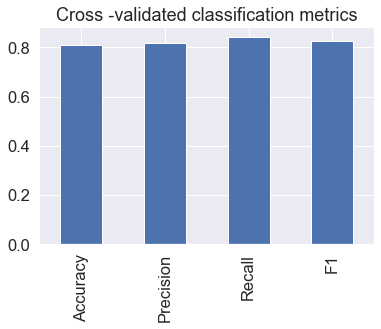

In [319]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc_cat,
                           "Precision":cv_precision_cat,
                           "Recall":cv_recall_cat,
                           "F1":cv_f1_cat},
                            index=[0])
cv_metrics.T.plot.bar(title='Cross -validated classification metrics',
                     legend=False)

In [324]:
#Feature importance
new_cat=CatBoostClassifier(iterations= 1000,
                           loss_function='Logloss',
                           depth= 4,
                           l2_leaf_reg= 1,
                           learning_rate= 0.5)
new_cat.fit(X_train,y_train)

0:	learn: 0.4925650	total: 691us	remaining: 691ms
1:	learn: 0.3984826	total: 1.44ms	remaining: 718ms
2:	learn: 0.3483725	total: 2.02ms	remaining: 670ms
3:	learn: 0.3007451	total: 2.67ms	remaining: 665ms
4:	learn: 0.2584685	total: 3.29ms	remaining: 655ms
5:	learn: 0.2439798	total: 3.81ms	remaining: 632ms
6:	learn: 0.2274619	total: 4.32ms	remaining: 614ms
7:	learn: 0.2165303	total: 4.83ms	remaining: 600ms
8:	learn: 0.2000220	total: 5.36ms	remaining: 590ms
9:	learn: 0.1913771	total: 5.93ms	remaining: 587ms
10:	learn: 0.1706229	total: 6.45ms	remaining: 580ms
11:	learn: 0.1517208	total: 7.02ms	remaining: 578ms
12:	learn: 0.1439396	total: 7.57ms	remaining: 575ms
13:	learn: 0.1375028	total: 8.08ms	remaining: 569ms
14:	learn: 0.1183276	total: 8.58ms	remaining: 564ms
15:	learn: 0.1108969	total: 9.12ms	remaining: 561ms
16:	learn: 0.1006055	total: 9.76ms	remaining: 565ms
17:	learn: 0.0941236	total: 10.3ms	remaining: 561ms
18:	learn: 0.0780227	total: 10.8ms	remaining: 557ms
19:	learn: 0.0713908	to

357:	learn: 0.0025498	total: 172ms	remaining: 309ms
358:	learn: 0.0025495	total: 173ms	remaining: 309ms
359:	learn: 0.0025495	total: 173ms	remaining: 308ms
360:	learn: 0.0025494	total: 174ms	remaining: 308ms
361:	learn: 0.0025494	total: 174ms	remaining: 307ms
362:	learn: 0.0025491	total: 175ms	remaining: 307ms
363:	learn: 0.0025490	total: 175ms	remaining: 306ms
364:	learn: 0.0025490	total: 176ms	remaining: 306ms
365:	learn: 0.0025487	total: 176ms	remaining: 305ms
366:	learn: 0.0025487	total: 177ms	remaining: 305ms
367:	learn: 0.0025482	total: 177ms	remaining: 304ms
368:	learn: 0.0025480	total: 178ms	remaining: 304ms
369:	learn: 0.0025480	total: 178ms	remaining: 303ms
370:	learn: 0.0025479	total: 179ms	remaining: 303ms
371:	learn: 0.0025479	total: 179ms	remaining: 303ms
372:	learn: 0.0025479	total: 180ms	remaining: 302ms
373:	learn: 0.0025477	total: 180ms	remaining: 302ms
374:	learn: 0.0025475	total: 181ms	remaining: 301ms
375:	learn: 0.0025473	total: 181ms	remaining: 301ms
376:	learn: 

710:	learn: 0.0022807	total: 336ms	remaining: 137ms
711:	learn: 0.0022807	total: 337ms	remaining: 136ms
712:	learn: 0.0022807	total: 337ms	remaining: 136ms
713:	learn: 0.0022805	total: 338ms	remaining: 135ms
714:	learn: 0.0022797	total: 338ms	remaining: 135ms
715:	learn: 0.0022794	total: 339ms	remaining: 134ms
716:	learn: 0.0022787	total: 339ms	remaining: 134ms
717:	learn: 0.0022521	total: 340ms	remaining: 133ms
718:	learn: 0.0022519	total: 340ms	remaining: 133ms
719:	learn: 0.0022518	total: 341ms	remaining: 132ms
720:	learn: 0.0022518	total: 341ms	remaining: 132ms
721:	learn: 0.0022518	total: 341ms	remaining: 131ms
722:	learn: 0.0022517	total: 342ms	remaining: 131ms
723:	learn: 0.0022517	total: 342ms	remaining: 131ms
724:	learn: 0.0022517	total: 343ms	remaining: 130ms
725:	learn: 0.0022517	total: 343ms	remaining: 130ms
726:	learn: 0.0022517	total: 344ms	remaining: 129ms
727:	learn: 0.0022517	total: 344ms	remaining: 129ms
728:	learn: 0.0022516	total: 345ms	remaining: 128ms
729:	learn: 

In [334]:
feature_importance_cat=new_cat.get_feature_importance()
feature_importance_cat

array([11.89790704,  6.63744106,  9.44926627,  6.65856506, 11.6763461 ,
        1.90116909,  2.5740707 ,  7.88672062,  5.97366597, 11.04888593,
        5.71273372, 11.18116649,  7.40206196])

In [339]:
feature_dict_cat=dict(zip(df.columns,(feature_importance_cat)))
feature_dict_cat

{'age': 11.897907040443695,
 'sex': 6.637441061257283,
 'cp': 9.449266274082044,
 'trestbps': 6.658565059050182,
 'chol': 11.676346095244098,
 'fbs': 1.9011690864238602,
 'restecg': 2.574070695953528,
 'thalach': 7.886720615392895,
 'exang': 5.97366597025021,
 'oldpeak': 11.04888593281182,
 'slope': 5.712733716466612,
 'ca': 11.181166494797584,
 'thal': 7.4020619578261915}

<AxesSubplot:title={'center':'Feature Importance'}>

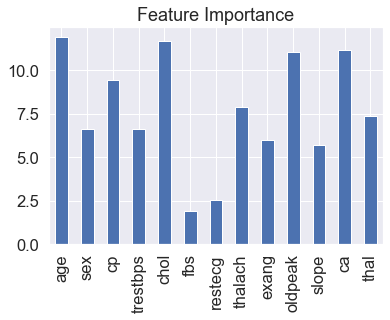

In [341]:
#Visualize feature importaance
cat_fea_imp=pd.DataFrame(feature_dict_cat,index=[0])
cat_fea_imp.T.plot.bar(title='Feature Importance',
                       legend=False)

In [347]:
gs_models = {"GS_scikit": LogisticRegression(),
             "GS_XGBoost": XGBClassifier(),
             "GS_CatBoost": CatBoostClassifier()}


In [352]:
gs_model_scores = fit_and_score(models=gs_models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
gs_model_scores

D:\UDEMY\ML\classification-projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\UDEMY\ML\classification-projects\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:

[17:20:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.005621
0:	learn: 0.6884219	total: 1ms	remaining: 1s
1:	learn: 0.6846992	total: 1.9ms	remaining: 949ms
2:	learn: 0.6804482	total: 2.82ms	remaining: 938ms
3:	learn: 0.6762280	total: 3.68ms	remaining: 918ms
4:	learn: 0.6716854	total: 4.56ms	remaining: 908ms
5:	learn: 0.6672902	total: 5.5ms	remaining: 911ms
6:	learn: 0.6640072	total: 6.32ms	remaining: 896ms
7:	learn: 0.6602127	total: 7.19ms	remaining: 892ms
8:	learn: 0.6563948	total: 8.04ms	remaining: 886ms
9:	learn: 0.6525316	total: 8.93ms	remaining: 884ms
10:	learn: 0.6483925	total: 9.64ms	remaining: 867ms
11:	learn: 0.6449119	total: 10.5ms	remaining: 867ms
12:	learn: 0.6413090	total: 11.5ms	remaining: 869ms
13:	learn: 0.6374641	total: 12.3ms	remaining: 869ms
14:	lear

376:	learn: 0.2305797	total: 293ms	remaining: 484ms
377:	learn: 0.2302671	total: 294ms	remaining: 483ms
378:	learn: 0.2298799	total: 294ms	remaining: 482ms
379:	learn: 0.2295009	total: 295ms	remaining: 482ms
380:	learn: 0.2289493	total: 296ms	remaining: 481ms
381:	learn: 0.2285010	total: 297ms	remaining: 480ms
382:	learn: 0.2283052	total: 297ms	remaining: 479ms
383:	learn: 0.2280532	total: 298ms	remaining: 478ms
384:	learn: 0.2278749	total: 299ms	remaining: 478ms
385:	learn: 0.2276692	total: 300ms	remaining: 477ms
386:	learn: 0.2273141	total: 301ms	remaining: 476ms
387:	learn: 0.2269729	total: 301ms	remaining: 475ms
388:	learn: 0.2265096	total: 302ms	remaining: 475ms
389:	learn: 0.2261179	total: 303ms	remaining: 474ms
390:	learn: 0.2257620	total: 304ms	remaining: 473ms
391:	learn: 0.2254125	total: 304ms	remaining: 472ms
392:	learn: 0.2250504	total: 305ms	remaining: 471ms
393:	learn: 0.2248149	total: 306ms	remaining: 471ms
394:	learn: 0.2245912	total: 307ms	remaining: 470ms
395:	learn: 

611:	learn: 0.1670068	total: 465ms	remaining: 295ms
612:	learn: 0.1668815	total: 465ms	remaining: 294ms
613:	learn: 0.1666197	total: 466ms	remaining: 293ms
614:	learn: 0.1663885	total: 467ms	remaining: 292ms
615:	learn: 0.1661393	total: 468ms	remaining: 292ms
616:	learn: 0.1659556	total: 469ms	remaining: 291ms
617:	learn: 0.1658758	total: 469ms	remaining: 290ms
618:	learn: 0.1657383	total: 470ms	remaining: 289ms
619:	learn: 0.1655088	total: 471ms	remaining: 289ms
620:	learn: 0.1653468	total: 472ms	remaining: 288ms
621:	learn: 0.1650355	total: 472ms	remaining: 287ms
622:	learn: 0.1648361	total: 473ms	remaining: 286ms
623:	learn: 0.1646566	total: 474ms	remaining: 286ms
624:	learn: 0.1643818	total: 475ms	remaining: 285ms
625:	learn: 0.1640929	total: 476ms	remaining: 284ms
626:	learn: 0.1638657	total: 476ms	remaining: 283ms
627:	learn: 0.1636531	total: 477ms	remaining: 283ms
628:	learn: 0.1634055	total: 478ms	remaining: 282ms
629:	learn: 0.1631022	total: 479ms	remaining: 281ms
630:	learn: 

838:	learn: 0.1269880	total: 633ms	remaining: 122ms
839:	learn: 0.1268490	total: 634ms	remaining: 121ms
840:	learn: 0.1267795	total: 635ms	remaining: 120ms
841:	learn: 0.1266015	total: 636ms	remaining: 119ms
842:	learn: 0.1263748	total: 637ms	remaining: 119ms
843:	learn: 0.1262461	total: 637ms	remaining: 118ms
844:	learn: 0.1260461	total: 638ms	remaining: 117ms
845:	learn: 0.1258716	total: 639ms	remaining: 116ms
846:	learn: 0.1257180	total: 640ms	remaining: 116ms
847:	learn: 0.1254682	total: 640ms	remaining: 115ms
848:	learn: 0.1253213	total: 641ms	remaining: 114ms
849:	learn: 0.1251052	total: 642ms	remaining: 113ms
850:	learn: 0.1249508	total: 643ms	remaining: 113ms
851:	learn: 0.1247602	total: 643ms	remaining: 112ms
852:	learn: 0.1246495	total: 644ms	remaining: 111ms
853:	learn: 0.1245380	total: 645ms	remaining: 110ms
854:	learn: 0.1242942	total: 646ms	remaining: 109ms
855:	learn: 0.1242096	total: 646ms	remaining: 109ms
856:	learn: 0.1240640	total: 647ms	remaining: 108ms
857:	learn: 

{'GS_scikit': 0.8852459016393442,
 'GS_XGBoost': 0.819672131147541,
 'GS_CatBoost': 0.8360655737704918}

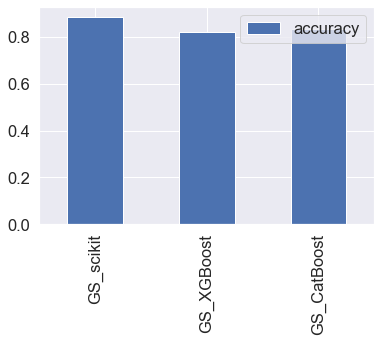

In [353]:
gs_model_compare = pd.DataFrame(gs_model_scores,index=['accuracy'])
gs_model_compare.T.plot.bar();